In [1]:
# PROJET2_DATA_SCIENTIST_OCR
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_SCIENTIST//PROJETS_DS_OCR//OC-DS-P2-Analysez_donnees_systemes_educatifs-main')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# 1-Chargement des Librairies Utilisées.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import sys
import geopandas as gpd
import P2_02_outils
import matplotlib.gridspec as gridspec
import statsmodels as stat
from P2_class import P2
import sklearn
from sklearn.preprocessing import MinMaxScaler
from math import pi
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
# Versions 
print('Version des librairies utilisées :')
print('Python        : ' + sys.version)
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('Sklearn       : ' + sklearn.__version__)
print('Geopandas     : ' + sns.__version__)
print('statsmodels   : ' + stat.__version__)
print('Outils        : ' + P2_02_outils.__version__)

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
Python        : 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
NumPy         : 1.20.1
Pandas        : 1.2.4
Matplotlib    : 3.3.4
Seaborn       : 0.11.1
Sklearn       : 0.24.1
Geopandas     : 0.11.1
statsmodels   : 0.12.2
Outils        : 0.0.3
Lancé le           : 2023-01-25T08:33:51.105996


In [4]:
#instantiation
p = P2()

In [5]:
# Afficher le maximum de lignes et de colonnes avec précision.
pd.set_option('display.max_row',200)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

In [6]:
# 2 IMPORTATION DES DONNEES. 
# 2.1 Chargement du Fichier de Données EdStatsCountry.csv
country = pd.read_csv('DONNEES/EdStatsCountry.csv', delimiter=',')
# 2.2 Chargement du Fichier de données EdStatsCountry-Series.csv
country_series = pd.read_csv('DONNEES/EdStatsCountry-Series.csv', delimiter=',')
# 2.3 Chargement du Fichier de Données EdStatsFootNote.csv
foot_note = pd.read_csv('DONNEES/EdStatsFootNote.csv', delimiter=',')
# 2.4 Chargement du Fichier de Données EdStatsSeries.csv
series = pd.read_csv('DONNEES/EdStatsSeries.csv', delimiter=',')
# 2.5 Chargement du Fichier de Données EdStatsData.csv
data = pd.read_csv('DONNEES/EdStatsData.csv', delimiter=',')

In [7]:
# 3-Définition des Fonctions Nécessaires Pour Le Travail.
# 3-1-Servira à la récupération du nom de la DataFrame :
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# 3-2-Calcul du nombre de lignes : 
def nb_lignes(data):
    nb_lignes = len(data)
    return nb_lignes

# 3-3-Calcul du nombre de colones : 
def nb_colonnes(data):
    nb_colonnes = len(data.columns)
    return nb_colonnes
    
# 3-4-Calcul du nombre de cellules vides : 
def nb_cell_vides(data):
    nb_cell_vides = data.isna().sum().sum()
    return nb_cell_vides

# 3-5-% de cellules vides par colonne : 
def pourcent_cell_vides(data):
    pd.set_option('display.max_column',70)
    pourcent_cell_vides = (data.isna().sum()/data.shape[0]).sort_values(ascending=True)
    return pourcent_cell_vides

# 3-6-Calcul du nombre de lignes en double: 
def Nbr_lignes_double(data):
    Nbr_lignes_double = len(data)-len(data.drop_duplicates())
    return Nbr_lignes_double

# 3-7-Synthèse globale des DataFrames : 
def synthese_DataFrames(data):
        print(f'--------Synthèse dataframe : {namestr(data, globals())}-------------\n')
        print(f'Nombre de colonnes : {nb_colonnes(data)}')        
        print(f'Nombre de lignes : {nb_lignes(data)}')
        print(f'Nombre de cellules vides : {nb_cell_vides(data)}')
        print(f'Nombre de lignes en doublons : {Nbr_lignes_double(data)}\n')
        print(f'Types de colonnes : {data.dtypes.value_counts()}\n')
        print(f'Pourcentage de cellules vides : {pourcent_cell_vides(data)}\n\n')
        return None
    
# 3-8-Liste des colonnes de la DataFrame    
def colonne_DataFrame(data):
    print(f'--------Liste des colonnes du dataframe : {namestr(data, globals())}-------------\n')
    print('Columns : {}'.format(data.columns.values))
    
# 3-9-Taux de remplissage
def Taux_de_remplissage_colonnes(data):
    print(f'--------Taux de remplissage : {namestr(data, globals())}-------------\n')
    taux_de_remplissage = sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
    taux_de_remplissage

# 3-10-Infos DataFrames
def info_DataFrame(data):
    data.info()
    print(f'---------------------------------------------------------------------------------\n')
    print("")

# 3-11-Suppression des petits pays ou faux pays avec la colonne "Country Code" : 
def supp_code_pays(data,list_pays):
    for i in list_pays:
        data.drop(data[data['Country Code'] == i].index, inplace=True) 

In [8]:
# I-EXPLORATION DES DATASETS. 
# I-1 Synthèse de Toutes les Datasets.
synthese_DataFrames(country)
synthese_DataFrames(country_series)
synthese_DataFrames(foot_note) 
synthese_DataFrames(series)
synthese_DataFrames(data)

--------Synthèse dataframe : ['country']-------------

Nombre de colonnes : 32
Nombre de lignes : 241
Nombre de cellules vides : 2354
Nombre de lignes en doublons : 0

Types de colonnes : object     28
float64     4
dtype: int64

Pourcentage de cellules vides : Country Code                                         0.00000
Short Name                                           0.00000
Table Name                                           0.00000
Long Name                                            0.00000
WB-2 code                                            0.00415
2-alpha code                                         0.01245
System of National Accounts                          0.10788
Currency Unit                                        0.10788
Region                                               0.11203
Income Group                                         0.11203
Latest population census                             0.11618
National accounts base year                          0.14938
System

In [9]:
# I-2 Liste des colonnes de chaque Dataset.
colonne_DataFrame(country)
colonne_DataFrame(country_series)
colonne_DataFrame(foot_note)
colonne_DataFrame(series)
colonne_DataFrame(data)

--------Liste des colonnes du dataframe : ['country']-------------

Columns : ['Country Code' 'Short Name' 'Table Name' 'Long Name' '2-alpha code'
 'Currency Unit' 'Special Notes' 'Region' 'Income Group' 'WB-2 code'
 'National accounts base year' 'National accounts reference year'
 'SNA price valuation' 'Lending category' 'Other groups'
 'System of National Accounts' 'Alternative conversion factor'
 'PPP survey year' 'Balance of Payments Manual in use'
 'External debt Reporting status' 'System of trade'
 'Government Accounting concept' 'IMF data dissemination standard'
 'Latest population census' 'Latest household survey'
 'Source of most recent Income and expenditure data'
 'Vital registration complete' 'Latest agricultural census'
 'Latest industrial data' 'Latest trade data'
 'Latest water withdrawal data' 'Unnamed: 31']
--------Liste des colonnes du dataframe : ['country_series']-------------

Columns : ['CountryCode' 'SeriesCode' 'DESCRIPTION' 'Unnamed: 3']
--------Liste des colon

In [10]:
# I-3 Information Sur les Colonnes de chaque Dataset.
info_DataFrame(country)
info_DataFrame(country_series)
info_DataFrame(foot_note) 
info_DataFrame(series)
info_DataFrame(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [11]:
# I-4 Visualisation des premières lignes de chaque Dataset.
# I-4-1 Visualisation des premières lignes du Dataset EdStatsCountry.csv.
country.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are resca...,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accou...,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [12]:
# I-4-2 Visualisation des premières lignes du Dataset EdStatsCountry-Series.csv.
country_series.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [13]:
# I-4-3 Visualisation des premières lignes du Dataset EdStatsFootNote.csv .
foot_note.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [14]:
# I-4-4 Visualisation des premières lignes du Dataset EdStatsSeries.csv.
series.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# I-4-5 Visualisation des premières lignes du Dataset EdStatsData.csv.
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.82212,54.89414,56.20944,57.26711,57.99114,59.36554,60.99996,61.92268,62.69342,64.38319,65.61777,66.08515,66.60814,67.29045,68.51009,69.03321,69.94491,71.04187,71.69378,71.6991,71.99582,72.60284,70.03272,70.46482,72.64568,71.81176,73.90351,74.4252,75.11082,76.25432,77.24568,78.80052,80.0514,80.80539,81.60706,82.48949,82.68551,83.28034,84.01187,84.19596,85.212,85.24514,86.10167,85.51194,85.32015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# I-5 Visualisation des dernières lignes de chaque Dataset.
# I-5-1 Visualisation des dernières lignes du Dataset EdStatsCountry.csv.
country.tail()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,2008,NaN,Value added at basic prices (VAB),IDA,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,NaN,NaN,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,2007,NaN,Value added at producer prices (VAP),IDA,NaN,Country uses the 1993 System of National Accou...,1990–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,2005,NaN,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accou...,NaN,2005,"IMF Balance of Payments Manual, 6th edition.",Preliminary,General trade system,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,1994,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1968 System of National Accou...,1990–92,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN
240,ZWE,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW,2009,NaN,Value added at basic prices (VAB),Blend,NaN,Country uses the 1993 System of National Accou...,"1991, 1998",2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2010/11","Integrated household survey (IHS), 2011/12",NaN,NaN,NaN,2012.0,2002,NaN


In [17]:
# I-5-2 Visualisation des dernières lignes du Dataset EdStatsCountry_Series.csv.
country_series.tail()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
608,ZAF,SP.POP.GROW,"Data sources : Statistics South Africa, United...",NaN
609,ZMB,SP.POP.GROW,Data sources: United Nations World Population ...,NaN
610,ZMB,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
611,ZWE,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
612,ZWE,SP.POP.GROW,Data sources: United Nations World Population ...,NaN


In [18]:
# I-5-3 Visualisation des dernières lignes du Dataset EdStatsFootNote.csv.
foot_note.tail()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3,NaN
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76,NaN
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3,NaN
643636,ZWE,SH.DYN.MORT,YR2017,5-year average value between 0s and 5s,NaN
643637,ZWE,SP.POP.GROW,YR2017,5-year average value between 0s and 5s,NaN


In [19]:
# I-5-4 Visualisation des dernières lignes du Dataset EdStatsSeries.csv.
series.tail()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
3660,UIS.XUNIT.USCONST.3.FSGOV,Expenditures,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3661,UIS.XUNIT.USCONST.4.FSGOV,Expenditures,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,UIS.XUNIT.USCONST.56.FSGOV,Expenditures,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Secondary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,XGDP.56.FSGOV.FDINSTADM.FFD,Expenditures,Government expenditure in tertiary institution...,"Total general (local, regional and central) go...","Total general (local, regional and central) go...",NaN,NaN,NaN,Tertiary,NaN,NaN,NaN,NaN,UNESCO Institute for Statistics,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# I-5-5 Visualisation des dernières lignes du Dataset EdStatsData.csv.
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47631.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38800.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166679.00000,NaN,NaN,199464.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.02185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.41136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.93070,NaN,NaN,90.42812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.81224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.35344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.12456,NaN,NaN,93.18835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.90392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.97734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.02828,NaN,NaN,1.06389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886929,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, m...",SE.ADT.1524.LT.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.82696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.54062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.59058,NaN,NaN,87.59186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# I-6 Résumé des Variables Qualitatives de Chaque Dataset.
# I-6-1 Résumé des Variables Qualitatives du Dataset EdStatsCountry.csv.
country.describe(exclude=[np.number])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,43,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,20
top,PSE,Benin,Benin,Republic of Turkey,XO,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,XO,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accou...,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2005
freq,1,1,1,1,1,23,6,57,55,1,34,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,40


In [22]:
# I-6-2 Résumé des Variables Qualitatives du Dataset EdStatsCountry_Series.csv.
country_series.describe(exclude=[np.number])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,GEO,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


In [23]:
# I-6-3 Résumé des Variables Qualitatives du Dataset EdStatsFootNote.csv.
foot_note.describe(exclude=[np.number])

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


In [24]:
# I-6-4 Résumé des Variables Qualitatives du Dataset EdStatsSeries.csv.
series.describe(exclude=[np.number])

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,LO.PASEC.FRE5.HIG.FE,Learning Outcomes,Barro-Lee: Percentage of population age 65-69 ...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,Data up to 2016 are estimates while data from ...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [25]:
# I-6-5 Résumé des Variables Qualitatives du Dataset EdStatsData.csv.
data.describe(exclude=[np.number])

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Uganda,WLD,Barro-Lee: Percentage of population age 65-69 ...,BAR.NOED.5559.FE.ZS
freq,3665,3665,242,242


In [26]:
# I-7 Résumé des Variables Quantitatives de Chaque Dataset EdStatsCountry.csv.
# I-7-1 Résumé des Variables Quantitatives du Dataset EdStatsCountry.csv.
country.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.00000,185.00000,0.0
mean,2001.53125,2008.10280,2010.99459,NaN
std,5.24856,2.61683,2.56968,NaN
min,1987.00000,2000.00000,1995.00000,NaN
25%,1996.75000,2007.50000,2011.00000,NaN
50%,2002.00000,2009.00000,2012.00000,NaN
75%,2005.00000,2010.00000,2012.00000,NaN
max,2012.00000,2010.00000,2012.00000,NaN


In [27]:
# I-7-2 Résumé des Variables Quantitatives du Dataset EdStatsCountry_Series.csv.
country_series.describe()

,Unnamed: 3
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [28]:
# I-7-3 Résumé des Variables Quantitatives du Dataset EdStatsFootNote.csv.
foot_note.describe()

,Unnamed: 4
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [29]:
# I-7-4 Résumé des Variables Quantitatives du Dataset EdStatsSeries.csv.
series.describe()

,Unit of measure,Notes from original source,Other web links,Related indicators,License Type,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# I-7-5 Résumé des Variables Quantitatives du Dataset EdStatsData.csv.
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.22880e+04,3.55370e+04,3.56190e+04,3.55450e+04,3.57300e+04,8.73060e+04,3.74830e+04,3.75740e+04,3.75760e+04,3.68090e+04,8.91220e+04,3.87770e+04,3.75110e+04,3.84600e+04,3.86060e+04,9.02960e+04,3.93720e+04,3.86410e+04,3.85520e+04,3.75400e+04,1.24405e+05,7.44370e+04,7.55430e+04,7.57930e+04,7.74620e+04,1.31361e+05,7.68070e+04,7.34530e+04,8.49140e+04,1.18839e+05,1.76676e+05,1.23509e+05,1.24205e+05,1.30363e+05,1.28814e+05,1.84108e+05,1.40312e+05,1.37272e+05,1.34387e+05,1.42108e+05,2.42442e+05,1.46012e+05,1.47264e+05,1.37509e+05,1.13789e+05,1.31058e+05,1.64600e+04,143.00000,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,5.14360e+04,0.0
mean,1.97477e+09,4.25364e+09,4.59236e+09,5.10501e+09,5.40149e+09,2.31429e+09,5.73181e+09,6.12444e+09,6.67149e+09,7.43672e+09,3.28390e+09,7.66497e+09,7.91372e+09,7.85691e+09,8.11800e+09,3.62276e+09,9.15655e+09,1.01490e+10,1.10471e+10,1.19544e+10,9.08442e+09,1.57167e+10,1.60467e+10,1.64353e+10,1.68402e+10,1.05254e+10,1.87463e+10,2.02739e+10,1.79468e+10,1.33156e+10,9.42338e+09,1.38487e+10,1.42830e+10,1.44939e+10,1.58973e+10,1.18864e+10,1.68467e+10,1.87230e+10,2.02979e+10,1.89491e+10,1.18959e+10,2.11791e+10,2.17632e+10,2.42533e+10,2.67845e+10,2.35372e+10,1.93441e+11,2.16084,5.78070e+02,6.05477e+02,6.31592e+02,6.55652e+02,6.75152e+02,6.91129e+02,7.04064e+02,7.14579e+02,7.22487e+02,7.27129e+02,7.28378e+02,7.26648e+02,7.22833e+02,7.17690e+02,7.11307e+02,7.03427e+02,6.94030e+02,NaN
std,1.21169e+11,1.80481e+11,1.91408e+11,2.05917e+11,2.11215e+11,1.37506e+11,2.21555e+11,2.32549e+11,2.47399e+11,2.66096e+11,1.78077e+11,2.74414e+11,2.79055e+11,2.82381e+11,2.94063e+11,2.00293e+11,3.26467e+11,3.53535e+11,3.80426e+11,4.01487e+11,3.66567e+11,4.88136e+11,5.01206e+11,5.12196e+11,5.29298e+11,4.28522e+11,5.81259e+11,6.14236e+11,5.85915e+11,5.15347e+11,4.44237e+11,5.44924e+11,5.62289e+11,5.80361e+11,6.27834e+11,5.57618e+11,6.85148e+11,7.46569e+11,7.94413e+11,7.62365e+11,6.21871e+11,8.55585e+11,8.83395e+11,9.51302e+11,1.02318e+12,9.73246e+11,2.83919e+12,0.81058,1.47507e+04,1.57730e+04,1.67856e+04,1.77867e+04,1.87441e+04,1.96541e+04,2.05294e+04,2.13685e+04,2.21584e+04,2.28799e+04,2.35234e+04,2.40815e+04,2.45590e+04,2.49659e+04,2.53018e+04,2.55607e+04,2.57419e+04,NaN
min,-1.43556e+00,-1.59462e+00,-3.05652e+00,-4.03258e+00,-4.21356e+00,-3.65857e+00,-2.95094e+00,-3.17487e+00,-3.55875e+00,-2.97361e+00,-1.40424e+00,-1.47834e+00,-2.35876e+00,-2.86727e+00,-2.80055e+00,-2.21632e+00,-1.55672e+00,-1.41089e+00,-1.42520e+00,-1.56242e+00,-1.80375e+00,-5.81434e+00,-5.08933e+00,-6.18486e+00,-4.79269e+00,-2.69772e+00,-3.82017e+00,-2.51724e+00,-6.08620e+04,-6.52600e+04,-6.75930e+04,-6.97370e+04,-9.21430e+04,-1.11186e+05,-1.26260e+05,-1.34724e+05,-3.70894e+05,-3.88217e+05,-4.08854e+05,-4.56124e+05,-4.96905e+05,-5.70994e+05,-6.04993e+05,-6.15748e+05,-8.90000e+01,-2.46785e+00,-1.79754e+00,1.00000,-1.87000e+00,-2.00000e+00,-2.11000e+00,-2.15000e+00,-2.14000e+00,-2.09000e+00,-1.98000e+00,-1.83000e+00,-1.63000e+00,-1.44000e+00,-1.26000e+00,-1.09000e+00,-9.20000e-01,-7.80000e-01,-6.50000e-01,-5.50000e-01,-4.50000e-01,NaN
25%,8.90000e-01,8.85321e+00,9.24092e+00,9.59520e+00,9.86159e+00,1.40000e+00,9.31261e+00,9.51991e+00,1.00000e+01,1.00000e+01,1.77000e+00,9.46869e+00,9.98933e+00,9.58182e+00,9.06805e+00,2.15000e+00,9.33292e+00,9.59533e+00,9.71550e+00,9.67964e+00,4.83000e+00,5.13455e+01,4.93385e+01,4.94488e+01,4.78328e+01,5.20000e+00,4.83649e+01,5.51085e+01,3.34687e+01,1.74905e+01,5.69904e+00,1.59990e+01,1.58425e+01,1.55098e+01,1.41869e+01,5.72000e+00,1.27762e+01,1.26866e+

Valeurs manquantes :2354 NaN pour 7712 données (30.52 %)
-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


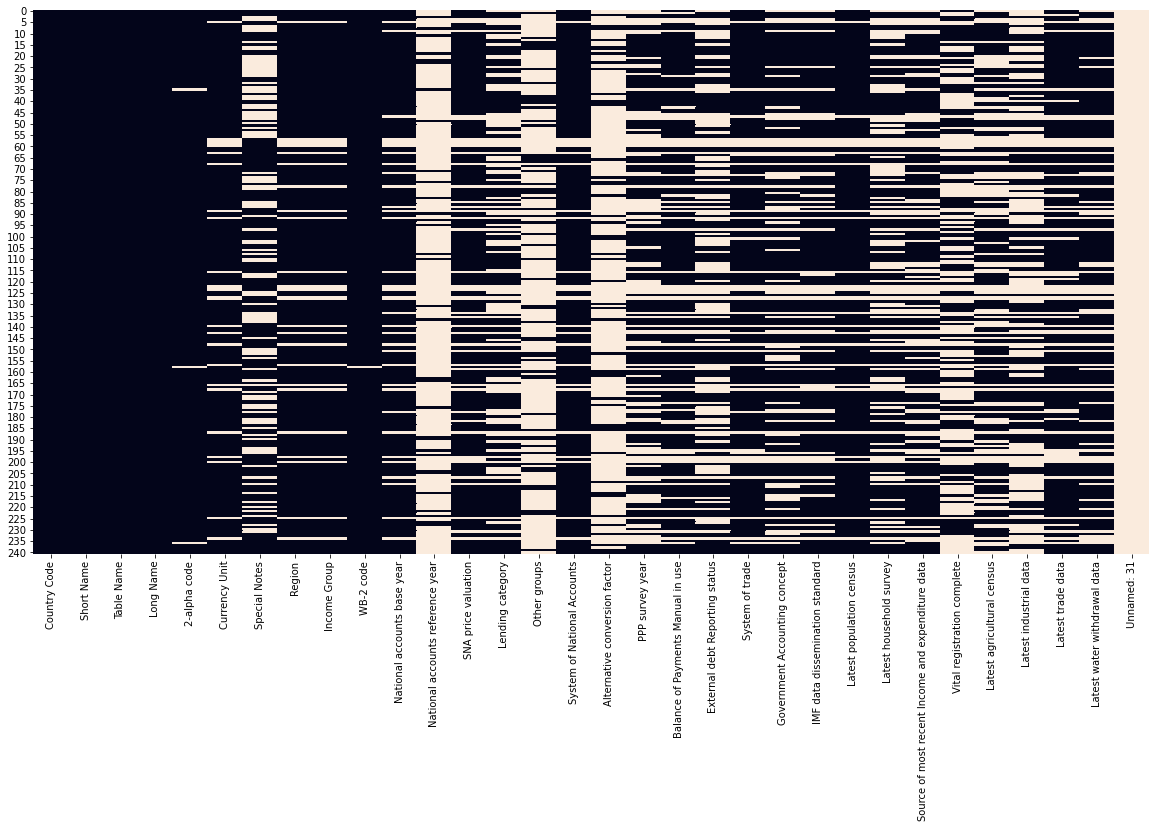

In [31]:
# 1-8 Valeurs Manquantes et Heatmap de Visualisation de Chaque Dataset.
# 1-8-1 Valeurs Manquantes et Heatmap de Visualisation du Dataset EdStatsCountry.csv
P2_02_outils.get_missing_values(country, False, True)

Valeurs manquantes :613 NaN pour 2452 données (25.0 %)
-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


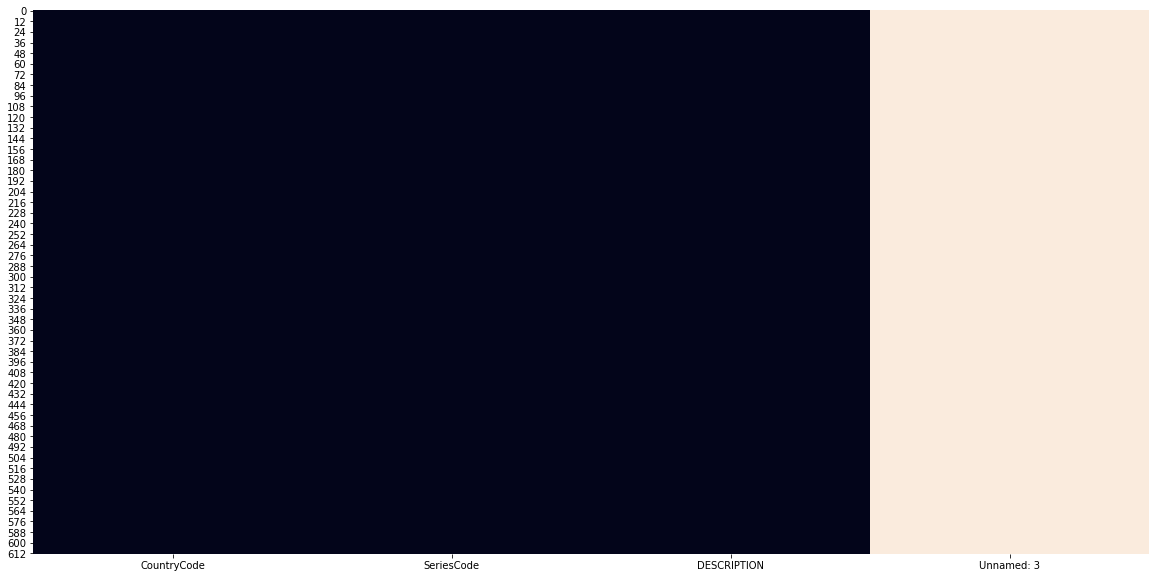

In [32]:
# 1-8-2 Valeurs Manquantes et Heatmap de Visualisation du Dataset EdStatsCountry-Series.csv.
P2_02_outils.get_missing_values(country_series, False, True)

Valeurs manquantes :643638 NaN pour 3218190 données (20.0 %)
-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


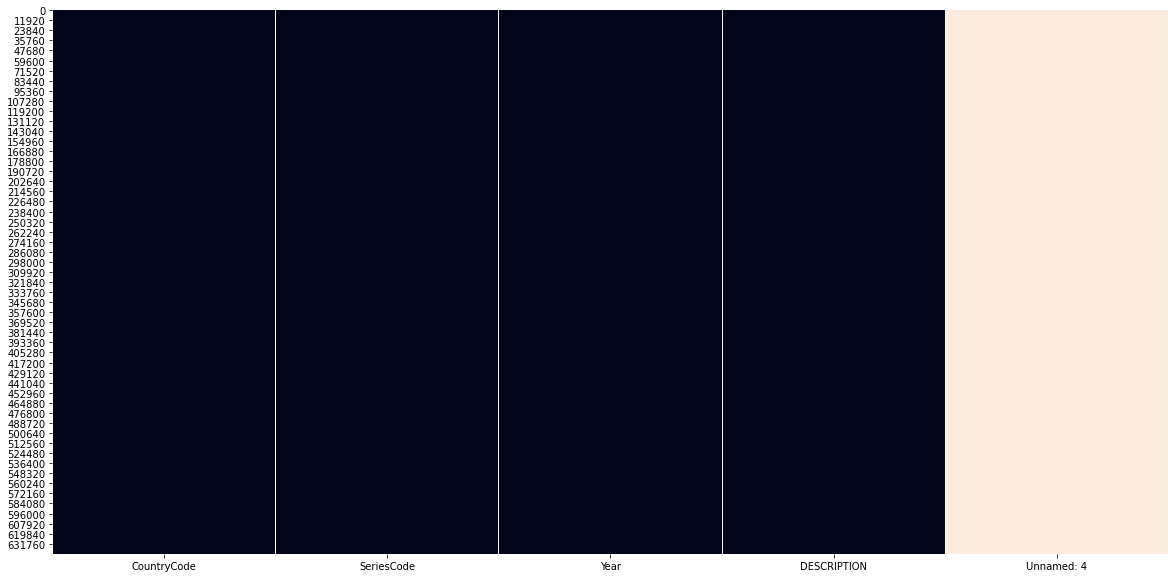

In [33]:
# 1-8-3 Valeurs Manquantes et Heatmap de Visualisation du Dataset EdStatsFootNote.csv.
P2_02_outils.get_missing_values(foot_note, False, True)

Valeurs manquantes :55203 NaN pour 76965 données (71.72 %)
-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


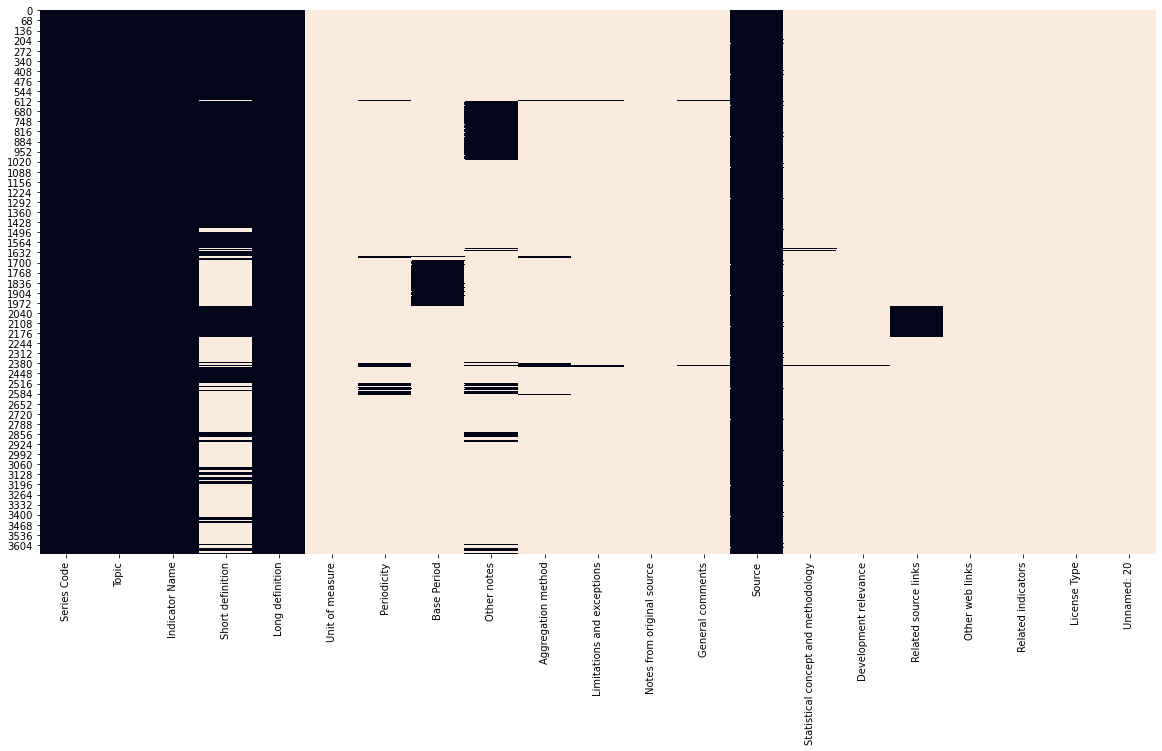

In [34]:
# 1-8-4 Valeurs Manquantes et Heatmap de Visualisation du Dataset EdStatsSeries.csv.
P2_02_outils.get_missing_values(series, False, True)

Valeurs manquantes :53455179 NaN pour 62085100 données (86.1 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
Unnamed: 69,886930,100.00000
2017,886787,99.98000
2016,870470,98.14000
1971,851393,95.99000
1973,851385,95.99000
1972,851311,95.98000
1974,851200,95.97000
1979,850121,95.85000
1982,849419,95.77000
1989,849390,95.77000


-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


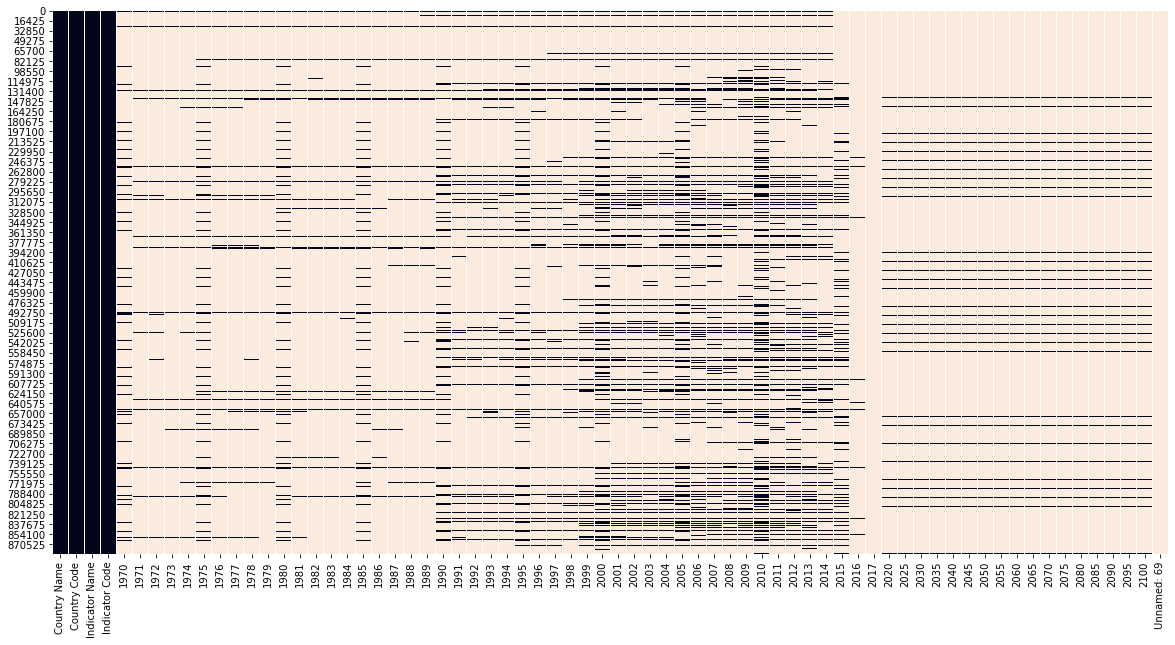

In [35]:
# 1-8-5 Valeurs Manquantes et Heatmap de Visualisation du Dataset EdStatsData.csv
P2_02_outils.get_missing_values(data, True, True)

In [36]:
# I-9 Résumé de L'Exploration des Datasets.

def percentage(value):
    return "{0:.0f}%".format(value * 100)

files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Taux valeurs manquantes"] ,
                                 
                                 index = ["country.csv", 
                                          'country_series.csv', 
                                          'foot_note.csv', 
                                          'series.csv', 
                                          'data.csv'])

files_description["Nb lignes"] = [
    len(country.index),
    len(country_series.index),
    len(foot_note.index),
    len(series.index),
    len(data.index)
]
                                            
files_description["Nb colonnes"] = [
    len(country.columns),
    len(country_series.columns),
    len(foot_note.columns),
    len(series.columns),
    len(data.columns)
]

files_description["Taux remplissage moyen"] = [
    percentage(country.notna().mean().mean()),
    percentage(country_series.notna().mean().mean()),
    percentage(foot_note.notna().mean().mean()),
    percentage(series.notna().mean().mean()),
    percentage(data.notna().mean().mean())
]

files_description["Taux valeurs manquantes"] = [
   p.nan_percent(country),
    p.nan_percent(country_series),
    p.nan_percent(foot_note),
    p.nan_percent(series),
    p.nan_percent(data)
]
    

files_description

,Nb lignes,Nb colonnes,Taux remplissage moyen,Taux valeurs manquantes
country.csv,241,32,69%,31.0%
country_series.csv,613,4,75%,25.0%
foot_note.csv,643638,5,80%,20.0%
series.csv,3665,21,28%,72.0%
data.csv,886930,70,14%,86.0%


In [37]:
# I-10 Suppression des colonnes "Unnamed: xx" de chaque Dataset.

country        = country.drop(['Unnamed: 31'], axis=1)
country_series = country_series.drop(['Unnamed: 3'], axis=1)
foot_note      = foot_note.drop(['Unnamed: 4'], axis=1)
series         = series.drop(['Unnamed: 20'], axis=1)
data           = data.drop(['Unnamed: 69'], axis=1)

In [38]:
# I-11 Conclusion et Synthèse de Toutes les Datasets.

synthese_DataFrames(country)
synthese_DataFrames(country_series)
synthese_DataFrames(foot_note) 
synthese_DataFrames(series)
synthese_DataFrames(data)

--------Synthèse dataframe : ['country']-------------

Nombre de colonnes : 31
Nombre de lignes : 241
Nombre de cellules vides : 2113
Nombre de lignes en doublons : 0

Types de colonnes : object     28
float64     3
dtype: int64

Pourcentage de cellules vides : Country Code                                         0.00000
Short Name                                           0.00000
Table Name                                           0.00000
Long Name                                            0.00000
WB-2 code                                            0.00415
2-alpha code                                         0.01245
System of National Accounts                          0.10788
Currency Unit                                        0.10788
Region                                               0.11203
Income Group                                         0.11203
Latest population census                             0.11618
National accounts base year                          0.14938
System

In [39]:
# II-PRE-ANALYSE DES DONNEES.
# II-1 DATASET: EdStatsCountry.csv.
# Remplacer la Région 'NaN' par 'Autres' dans le Fichier de Données EdStatsCountry.csv
country['Region'] = country['Region'].replace(np.nan, 'A Completer')
# Editer la Variable Région Ajustée.
print('Régions :\n',country['Region'].unique())
# Remplacer les Groupe de Revenus 'NaN' par 'Autres' dans le Fichier de Données EdStatsCountry.csv
country['Income Group'] = country['Income Group'].replace(np.nan, 'A Completer')
# Editer la Variable Groupes de Revenus Ajustée.
print('\nGroupes de revenus :\n',country['Income Group'].unique())

Régions :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'A Completer' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']

Groupes de revenus :
 ['High income: nonOECD' 'Low income' 'Upper middle income' 'A Completer'
 'Lower middle income' 'High income: OECD']


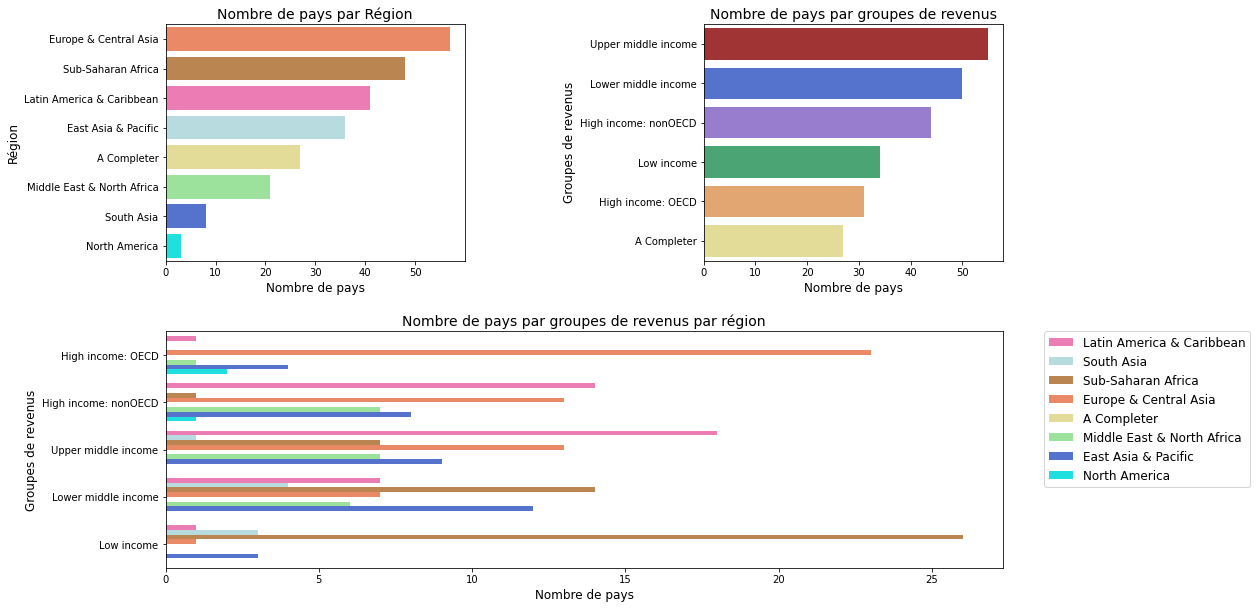

In [40]:
# II-2 Regroupement des pays/régions/groupes de revenus et Représentation Graphique.
fig=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)
# Graphique ligne 1, colonne 1 ------------------
plt.subplot(grid[0, 0])
# Regroupement des pays par régions
nb_pays_par_region=country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'], palette=colors,)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Nombre de pays par Région', fontsize=14)
# Graphique ligne 1, colonne 2 ------------------
plt.subplot(grid[0, 1])
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
colors = ['FireBrick','RoyalBlue','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'], palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupes de revenus', fontsize=12)
plt.title('Nombre de pays par groupes de revenus', fontsize=14)
# Graphique ligne 2, sur les 2 colonnes ------------------
plt.subplot(grid[1, :])
# Regroupement des pays par groupe de revenus
colors = ['HotPink','PowderBlue','Peru','Coral','Khaki','LightGreen','RoyalBlue','Cyan']
sns.countplot(y='Income Group', hue='Region', data=country, orient='h',
                   order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],
                   palette=colors)
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupes de revenus', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupes de revenus par région', fontsize=14)
plt.grid(False)
plt.savefig('GRAPHS/1- NBRE_PAYS_REGION_REVENUS')
plt.show()

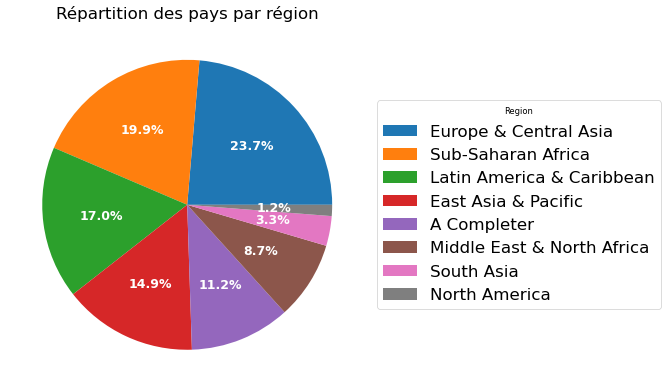

<Figure size 432x288 with 0 Axes>

In [41]:
# II-3 Graphique de la Répartition des Pays Par Région.
p.camembert(country, 'Region', 'Répartition des pays par région')
plt.savefig('GRAPHS/2- _Pays_par_Région.png')

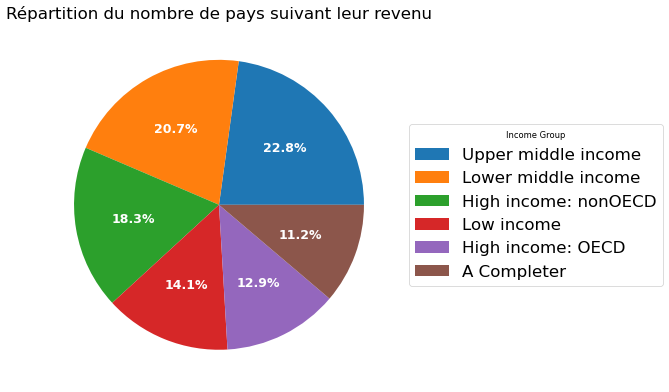

<Figure size 432x288 with 0 Axes>

In [42]:
# II-4 Graphique de la Répartition du nombre de pays par Groupe de Revenus.

p.camembert(country, "Income Group", "Répartition du nombre de pays suivant leur revenu")
plt.savefig('GRAPHS/3- PAYS_PAR_GRPE_REVENUS.png')

In [43]:
# II-2 DATASET: EdStatsCountry-Series.csv.
# II-2-1 Pays présents dans EdStatsCountry.csv sont-ils les mêmes que dans EdStatsCountry-Series.csv?
# Nombre de code ISO aplha3 de EdStatsCountry.csv correspond-t-il au Nombre de code ISO alpha3 de EdStatsCountry.csv?
country['Country Code'].nunique() == country_series['CountryCode'].nunique()

False

In [44]:
# II-2-2 Noms des pays dans EdStatsCountry.csv n'apparaissant pas dans EdStatsCountry-Series.csv

country[~country['Country Code'].isin(country_series['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


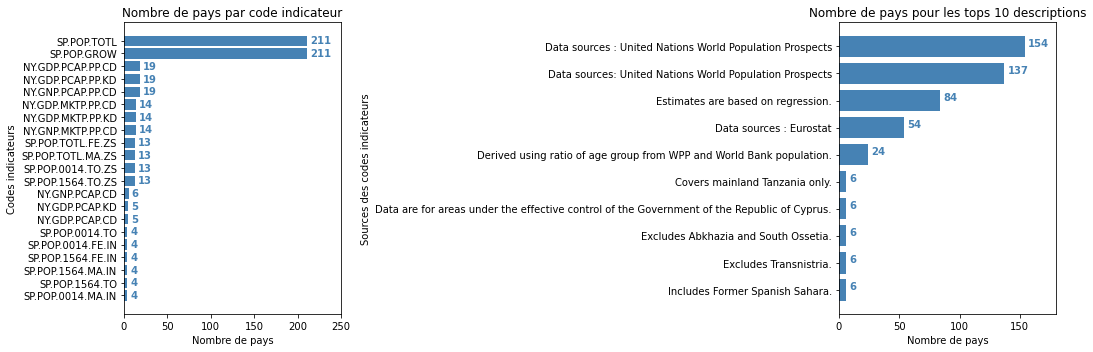

In [45]:
# II-2-3 Regroupement des Pays par Code Indicateur et Par Description (Pays/Code indicateur/Description).
fig, ax = plt.subplots(1, 2, figsize=(15, 5))  
# Graphique ligne 1, colonne 1 ------------------
# Regroupement des pays par code indicateur
serie_code = country_series.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode']
nb_pays_par_serie_code=country_series.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values()
ax1=ax[0]
ax1.barh(y = serie_code, width=nb_pays_par_serie_code, color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .22, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax1.set_title('Nombre de pays par code indicateur', fontsize=12)
ax1.set_xlabel('Nombre de pays', fontsize=10)
ax1.set_ylabel('Codes indicateurs', fontsize=10)
ax1.tick_params(labelsize=10)
ax1.set_xlim([0, 250])
ax1.grid(False)
# Graphique ligne 1, colonne 2 ------------------
# Regroupement des pays par les 10 descriptions des sources des indicateurs les plus fréquentes
description = country_series.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(10)
nb_pays_par_description=country_series.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(10)
ax2=ax[1]
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 3, i + .01, str(v), color='SteelBlue', fontsize=10, fontweight='bold')
ax2.set_title('Nombre de pays pour les tops 10 descriptions', fontsize=12)
ax2.set_xlabel('Nombre de pays', fontsize=10)
ax2.set_ylabel('Sources des codes indicateurs', fontsize=10)
ax2.tick_params(labelsize=10)
ax2.set_xlim([0, 180])
ax2.grid(False)
fig.tight_layout()
plt.savefig('GRAPHS/4- PAYS_PAR_INDICATEUR.png')
plt.show()

In [46]:
# II-3 DATASET: EdStatsFootNote.csv.
# II-3-1 Recherche des Doublons dans les colonnes CountryCode et SeriesCode.
doublons_deux = foot_note[foot_note.duplicated(['CountryCode', 'SeriesCode'], keep=False)]
# Edition du Nombre de Doublons Code Pays/Indicateur.
print(f'Nombre de doublons code pays/indicateur: {doublons_deux.shape[0]}.')
# Edition du fichier doublons_deux.
doublons_deux
# ==> Plusieurs années de référence pour un ou plusieurs code(s) indicateur(s) par code ISO-3166-alpha-3.

Nombre de doublons code pays/indicateur: 622238.


,CountryCode,SeriesCode,Year,DESCRIPTION
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.
...,...,...,...,...
643632,ZWE,SH.DYN.MORT,YR2004,Uncertainty bound is 90.7 - 107.8
643633,ZWE,SH.DYN.MORT,YR2007,Uncertainty bound is 91.6 - 109.3
643634,ZWE,SH.DYN.MORT,YR2014,Uncertainty bound is 54.3 - 76
643635,ZWE,SH.DYN.MORT,YR2015,Uncertainty bound is 48.3 - 73.3


In [47]:
# II-3-2 Doublons sur la colonne CountryCode du Fichier de Données EdStatsFootNote.csv.
doublons_un = foot_note[foot_note.duplicated(['DESCRIPTION'], keep=False)]
# Edition de doublons_un
print(doublons_un.shape)
foot_note['DESCRIPTION'].nunique()
# ==> Plusieurs description de l'incertitude, des exceptions, des modes de mise à jour des codes indicateurs par année par pays.

(635775, 4)


9102

In [48]:
# II-3-3 Nombre de code ISO aplha3 de EdStatsCountry.csv correspond-t-il au Nombre de code ISO alpha3 de EdStatsFootNote.csv?
country['Country Code'].nunique() == foot_note['CountryCode'].nunique()

False

In [49]:
# II-3-4 Noms des pays dans EdStatsFootNote.csv n'apparaissant pas dans EdStatsCountry.csv
country[~country['Country Code'].isin(foot_note['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')
# Surplus de pays dans EdStatsFootNote.csv sont ceux devenus autonomes:Groenland,Saint Martin,Sint Maarten).

,Short Name
85,Greenland
207,Sint Maarten (Dutch part)
134,St. Martin (French part)


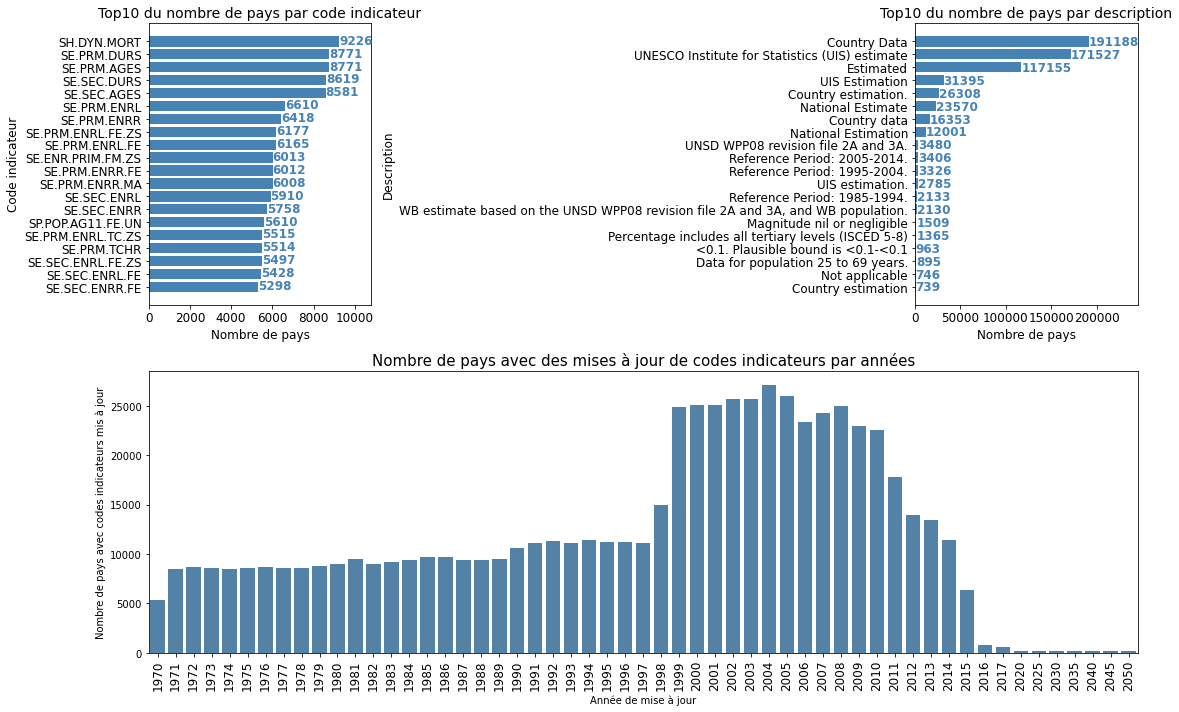

In [50]:
# II-3-5 Regroupement des Pays par Code Indicateur et par Description.
plt.figure(figsize=(16, 10))
G = gridspec.GridSpec(2, 2)
# Graphique ligne 1, colonne 1 ------------------
ax1 = plt.subplot(G[0, 0])
# Top10 du nombre de pays par code indicateur
serie_code = foot_note.groupby('SeriesCode')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['SeriesCode'].tail(20)
nb_pays_par_serie_code=foot_note.groupby('SeriesCode')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax1.barh(y = serie_code, width=nb_pays_par_serie_code,color='SteelBlue')
for i, v in enumerate(nb_pays_par_serie_code):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax1.set_title('Top10 du nombre de pays par code indicateur', fontsize=14)
ax1.set_xlabel('Nombre de pays', fontsize='12')
ax1.set_ylabel('Code indicateur', fontsize='12')
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 10800])
# Graphique ligne 1, colonne 2 ------------------
ax2 = plt.subplot(G[0, 1])
# Top10 du nombre de pays par description
description = foot_note.groupby('DESCRIPTION')[['CountryCode']].count().reset_index().sort_values(by='CountryCode')['DESCRIPTION'].tail(20)
nb_pays_par_description=foot_note.groupby('DESCRIPTION')[['CountryCode']].count()['CountryCode'].sort_values().tail(20)
ax2.barh(y = description, width=nb_pays_par_description, color='SteelBlue')
for i, v in enumerate(nb_pays_par_description):
    ax2.text(v + 10, i - .3, str(v), color='SteelBlue', fontweight='bold', fontsize='12')
ax2.set_title('Top10 du nombre de pays par description', fontsize='14')
ax2.set_xlabel('Nombre de pays', fontsize='12')
ax2.set_ylabel('Description', fontsize='12')
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 245000])
# Graphique ligne 2, sur les 2 colonnes ------------------
ax3 = plt.subplot(G[1, :])
# Pour plus de lisibilité, transformer par exemple 'YR2001' en '2001'
foot_note['Annee']=[row[-4:] for row in foot_note['Year']]
# Nombre de pays avec des mises à jour d'indicateur par années
ax3.set_title('Nombre de pays avec des mises à jour de codes indicateurs par années', size=15)
ax3 = sns.barplot(y = 'CountryCode', x='Annee', data = foot_note.groupby('Annee').count().reset_index(), color='SteelBlue')
ax3.set_xticklabels(labels = foot_note.groupby('Annee').count().reset_index()['Annee'], rotation=90, size=12)
ax3.set_xlabel('Année de mise à jour')
ax3.set_ylabel('Nombre de pays avec codes indicateurs mis à jour')
plt.tight_layout()
plt.savefig('GRAPHS/5- PAYS_MISES_A_JOUR_IND.png')
plt.show()

In [51]:
# II-4 DATASET: EdStatsSeries.csv.
# II-4-1VNombre de Thèmes du Fichier de Données EdStatsSeries.csv
unique=series['Topic'].nunique()
print(f'{unique} Thèmes Regroupant les Indicateurs')

37 Thèmes Regroupant les Indicateurs


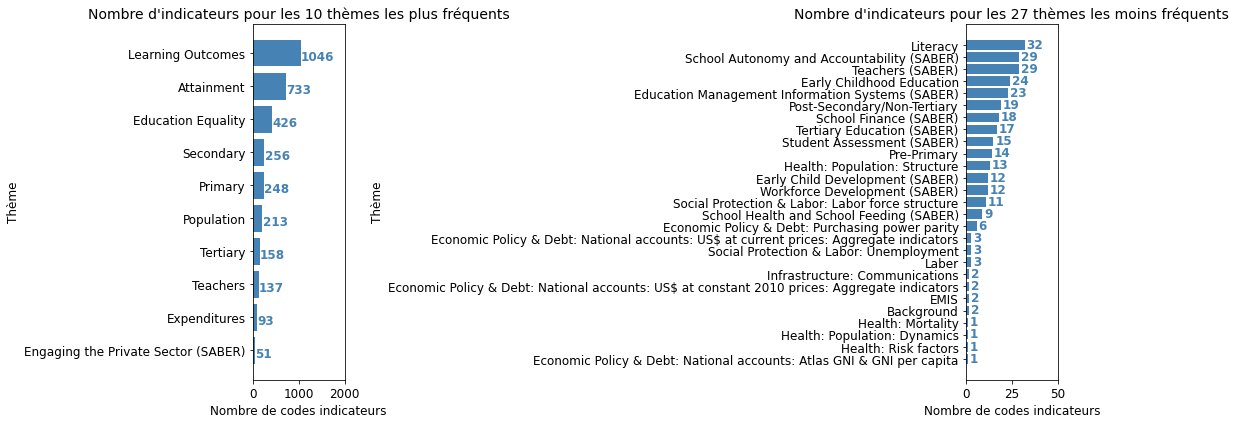

In [52]:
# II-4-2 Regroupement des Pays par Code Indicateur et par Description.
fig, ax = plt.subplots(1, 2, figsize=(15, 6))  
# Graphique ligne 1, colonne 1 ------------------
# Top10 des thèmes les plus fréquents 
theme = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].tail(10)
nb_code_par_theme=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().tail(10)
ax1=ax[0]
ax1.barh(y = theme, width=nb_code_par_theme, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme):
    ax1.text(v + 3, i - .2, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax1.set_title('Nombre d\'indicateurs pour les 10 thèmes les plus fréquents', fontsize=14)
ax1.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax1.set_ylabel('Thème', fontsize=12)
ax1.tick_params(labelsize=12)
ax1.grid(False)
ax1.set_xlim([0, 2000])
# Graphique ligne 1, colonne 2 ------------------
# last 27 thèmes les moins fréquents
theme_moins = series.groupby('Topic')[['Series Code']].count().reset_index().sort_values(by='Series Code')['Topic'].head(27)
nb_code_par_theme_moins=series.groupby('Topic')[['Series Code']].count()['Series Code'].sort_values().head(27)
ax2=ax[1]
ax2.barh(y = theme_moins, width=nb_code_par_theme_moins, color='SteelBlue')
for i, v in enumerate(nb_code_par_theme_moins):
    ax2.text(v + 1, i - .25, str(v), color='SteelBlue', fontweight='bold', fontsize=12)
ax2.set_title('Nombre d\'indicateurs pour les 27 thèmes les moins fréquents', fontsize=14)
ax2.set_xlabel('Nombre de codes indicateurs', fontsize=12)
ax2.set_ylabel('Thème', fontsize=12)
ax2.tick_params(labelsize=12)
ax2.grid(False)
ax2.set_xlim([0, 50])
fig.tight_layout()
plt.savefig('GRAPHS/6- THEMES_FREQUENTS.png')
plt.show()

In [53]:
# II-4-3 Extraction des Noms Courts et Longs des Indicateurs pour Analyser EdStatsData.csv
df_tmp = series[['Series Code','Indicator Name', 'Short definition', 'Long definition']]
#Visualisation du Fichier df_tmp
df_tmp

,Series Code,Indicator Name,Short definition,Long definition
0,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...
1,BAR.NOED.1519.ZS,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...
2,BAR.NOED.15UP.FE.ZS,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...
3,BAR.NOED.15UP.ZS,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...
4,BAR.NOED.2024.FE.ZS,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...
...,...,...,...,...
3660,UIS.XUNIT.USCONST.3.FSGOV,Government expenditure per upper secondary stu...,NaN,"Average total (current, capital and transfers)..."
3661,UIS.XUNIT.USCONST.4.FSGOV,Government expenditure per post-secondary non-...,NaN,"Average total (current, capital and transfers)..."
3662,UIS.XUNIT.USCONST.56.FSGOV,Government expenditure per tertiary student (c...,NaN,"Average total (current, capital and transfers)..."
3663,XGDP.23.FSGOV.FDINSTADM.FFD,Government expenditure in secondary institutio...,"Total general (local, regional and central) go...","Total general (local, regional and central) go..."


In [54]:
# II-4-4 Sauvegarde du fichier df_tmp pour l'Analyser du DataFrame EdStatsData.csv
df_tmp.to_csv('Indicateurs.txt', header=True, index=None, sep=',', mode='w')

,Nombre par type de variable,% des types de variable
float64,65,94.20000
object,4,5.80000


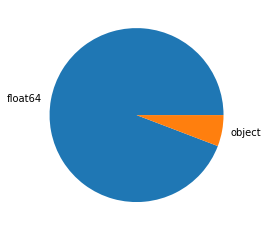

<Figure size 432x288 with 0 Axes>

In [55]:
# II-5 DATASET: EdStatsData.csv.
# II-5-1 Types de Variables du Fichier de Données EdStatsData.csv
P2_02_outils.get_types_variables(data, False, True, True)
plt.savefig('GRAPHS/7- Type_Variables.png')

In [56]:
# II-5-2 Comparons des pays présents dans EdStatsData.csv et EdStatsCountries.csv
# Nombre de code ISO aplha3 de EdStatsData.csv correspond-t-il au Nombre de code ISO alpha3 de EdStatsCountry.csv?
data['Country Code'].nunique() == country['Country Code'].nunique()

False

In [57]:
# II-5-3 Recherche du pays présent dansEdStatsData.csv mais pas dans EdStatsCountry.csv
df_pays_plus=data[~data['Country Code'].isin(country['Country Code'])][['Country Name']]
df_pays_plus.drop_duplicates(inplace=True)
df_pays_plus
# ==> Le pays en plus dans EdStatsData.csv est 'British Virgin Islands'.

,Country Name
190580,British Virgin Islands


In [58]:
#II-5-4 Comparons des pays présents dans EdStatsData.csv et EdStatsCountries-Series.csv
# Le nombre de code ISO alpha 3 de EdStatsData.csv correspond-t-il au Nombre de code ISO alpha 3 de EdStatsCountry-Series.csv.
data['Country Code'].nunique() == country_series['CountryCode'].nunique()

False

In [59]:
# II-5-5 Pays Présents dans EdStatsData.csv mais n'apparaissant pas dans EdStatsCountry-Series.csv
df_pays_plus2 = data[~data['Country Code'].isin(country_series['CountryCode'])][['Country Name']].sort_values(by = 'Country Name')
df_pays_plus2.drop_duplicates(inplace=True)
df_pays_plus2

,Country Name
0,Arab World
193025,British Virgin Islands
278539,Curacao
4884,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10996,Euro area
14661,Europe & Central Asia
21989,Europe & Central Asia (excluding high income)
23208,European Union
25656,Heavily indebted poor countries (HIPC)


In [60]:
# II-5-6 Total des Pays Présents dans EdStatsData.csv mais n'apparaissant pas dans EdStatsCountry-Series.csv
df_pays_plus2.count()
# ==> Surplus des pays dans EdStatsData.csv sont : des noms de région, ou des noms de regroupement de revenus 
# ou certains regroupement de pays (European Union, North America..) et certains pays devenus autonomes (Curaçao).

Country Name    31
dtype: int64

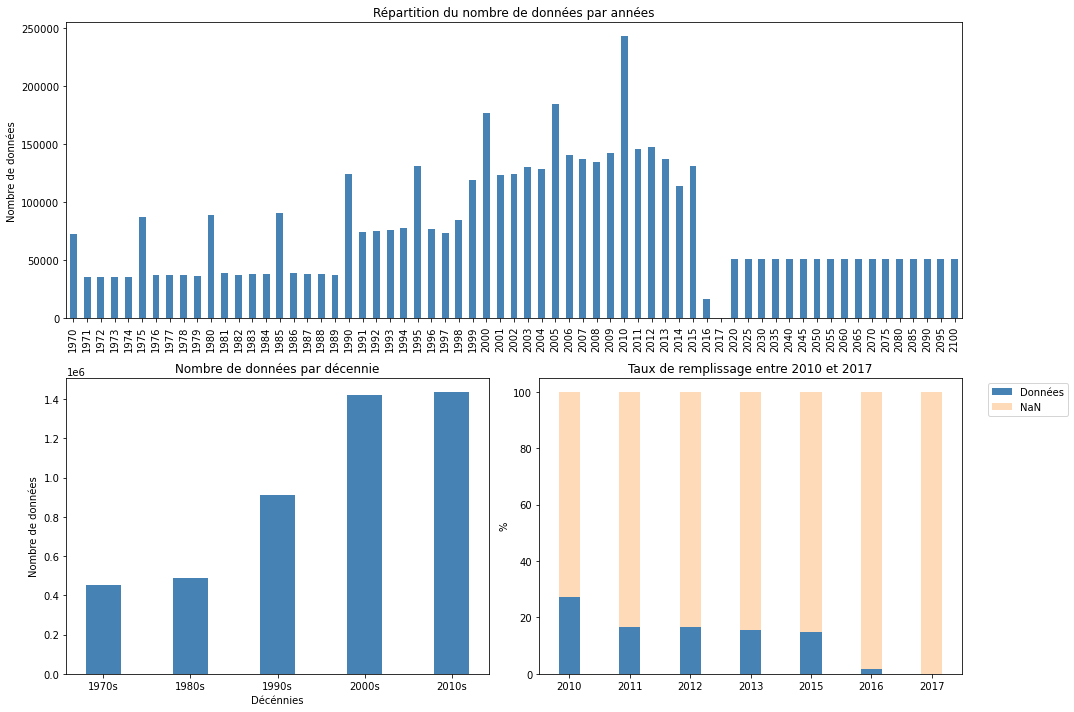

In [61]:
# II-5-7 Repartition des Données par Années & par Décénnies.
plt.figure(figsize=(15, 10))
G = gridspec.GridSpec(2, 2)
# Graphique ligne 1, sur les 2 colonnes ------------------
ax1 = plt.subplot(G[0, :])
# Répartition du nombre de données renseignées par années pour tous les indicateurs et tous les pays
present = data.loc[:,'1970':'2100'].notnull().sum()
ax1 = present.plot(kind='bar', color='SteelBlue')
ax1.set_title('Répartition du nombre de données par années')
ax1.set_ylabel('Nombre de données')
ax1.grid(False)
# Graphique ligne 2, colonne 1 ------------------
ax2 = plt.subplot(G[1, 0])
# Regroupement du nombre de données par décennie, les années 70, 80...
decade=data.loc[:,'1970':'2020'].copy().count()
ans=['1970s','1980s','1990s','2000s','2010s']
for i in range(5):
    j=i*10
    k=j+10
    decade[ans[i]]=decade[j:k,].sum()
# Affihage de la répartitions des données exploitables par décennie
width = 0.4   
ax2.bar(decade[ans].index, decade[ans].values, width, color='SteelBlue')
# ax2 = sns.barplot(y = decade[ans].values, x = decade[ans].index, color='SteelBlue')
ax2.set_xlabel('Décénnies')
ax2.set_ylabel('Nombre de données')
ax2.set_title('Nombre de données par décennie', size=12)
ax2.grid(False)
# Graphique ligne 2, colonne 2 ------------------
ax3 = plt.subplot(G[1, 1])
# Nombre de données totales
nb_tot=data.shape[0]
# Nombre de données non nulles par année de la décénnie 2010
annees=['2010','2011','2012','2013','2015','2016','2017']
nb_nonnul=data.copy()[annees].count()
df_2010s = pd.DataFrame({'annee':nb_nonnul.index, 'nb_nonnul':nb_nonnul.values})
# Taux de données non nulles par année de la décénnie 2010
df_2010s['%_nonnul']=round((df_2010s['nb_nonnul'])*100/nb_tot,2)
# Nombre de NaN par année de la décénnie 2010
df_2010s['%_nan']=round(100-df_2010s['%_nonnul'],2)
width = 0.35      
annes=df_2010s.index
taux_remplissage=df_2010s['%_nonnul']
taux_nan=df_2010s['%_nan']
ax3.bar(annees, taux_remplissage, width, label='Données', color='SteelBlue')
ax3.bar(annees, taux_nan, width, bottom=taux_remplissage, label='NaN', color='PeachPuff')
ax3.set_ylabel('%')
ax3.set_title('Taux de remplissage entre 2010 et 2017')
ax3.legend(bbox_to_anchor=(1.05, 1),loc = 2)
ax3.grid(False)
plt.tight_layout()
plt.savefig('GRAPHS/8- Données_par_Années.png')
plt.show()

In [62]:
# III-SELECTION DES INDICATEURS PERTINENTS.
# III.1 Réduction temporelle: Plage temporelle retenue : 2010-2015.
cols_annees  =  data.columns[44:-19].tolist()
cols_annees

['2010', '2011', '2012', '2013', '2014', '2015']

In [63]:
# III-2 Suppression des pays hors norme ISO-3166-alpha 3
# Recherchons des codes pays des regroupements de pays.
df_pays_en_trop=data[~data['Country Code'].isin(country_series['CountryCode'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
# Suppression des doublons.
df_pays_en_trop.drop_duplicates(inplace=True)
# Edition du Fichier df_pays_en_trop.
df_pays_en_trop
# Fichier des Variables en Trop à supprimer.
iso3_a_suppr=df_pays_en_trop['Country Code'].to_list()
# Suppression de la Variables VGB.
iso3_a_suppr.remove('VGB')
# Suppression de la Variables CUW.
iso3_a_suppr.remove('CUW')
# Suppression de la Variables NRU.
iso3_a_suppr.remove('NRU')
# Suppression de la Variables SXM.
iso3_a_suppr.remove('SXM')
# Suppression de la Variables SSD.
iso3_a_suppr.remove('SSD')
# Suppression de la Variables MAF.
iso3_a_suppr.remove('MAF')    
# Edition du Fichier Ajusté.
# df_pays=df_pays[~df_pays['Country Code'].isin(iso3_a_suppr)]
print(f'Pays hors norme ISO : {iso3_a_suppr}')

Pays hors norme ISO : ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']


,count,mean,std,min,25%,50%,75%,max
TOT,3665.0,238.21801,303.89417,0.0,15.00,135.0,332.00,1278.00
%,3665.0,16.40712,20.92881,0.0,1.03,9.3,22.87,88.02


Qantile 80% : %    26.804
Qantile 90% : %    48.828


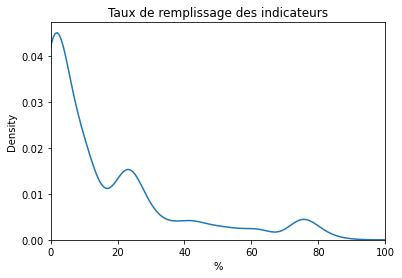

Indicateurs restants : 359


In [64]:
# III-3 Réduction par seuil du taux de remplissage des 3665 indicateurs possibles.
# -------------------------------------------------------------------------------------------------------------
# Répartition du nombre de données manquantes par années pour tous les indicateurs et tous les pays 
# -------------------------------------------------------------------------------------------------------------
# Datase de travail
df_taux_indicateurs = data.copy()
# Suppression des données non appropriées.
df_taux_indicateurs=df_taux_indicateurs[~df_taux_indicateurs['Country Code'].isin(iso3_a_suppr)]
# Compte le nombre de chaque indicateur par année.
df_taux_indicateurs = df_taux_indicateurs.groupby('Indicator Code')[cols_annees].count()
# Reinitialisation du Fichier df_taux_indicateurs.
df_taux_indicateurs=df_taux_indicateurs.reset_index()
# Ajouter la colonne Study_years.
df_taux_indicateurs['Study_years'] = df_taux_indicateurs[[str(year) for year in [2010,2015]]].mean(1)
# Convertir la Colonne Study_years de float64 en int64.
df_taux_indicateurs=df_taux_indicateurs.astype({'Study_years': 'int64'})
# La variable 'TOT' est le nombre de données par indicateur pour tous les pays pour toutes les années.
df_taux_indicateurs['TOT']=df_taux_indicateurs[cols_annees].sum(axis=1)
# La variable '%' est le taux de remplissage de chaque indicateur pour tous les pays pour toutes les années.
# Chaque indicateur peut être associé à 241 pays pour chaque année (6 années) : 242*6=1452.
df_taux_indicateurs['%']=round((df_taux_indicateurs['TOT'])*100/1452,2)
# Indicateurs statistiques.
display(df_taux_indicateurs[['TOT','%']].describe().T)
quantile_80=df_taux_indicateurs[['%']].quantile(0.8).to_string()
print(f'Qantile 80% : {quantile_80}')
quantile_90=df_taux_indicateurs[['%']].quantile(0.9).to_string()
print(f'Qantile 90% : {quantile_90}')
# Analyse du taux de remplissage des indicateurs pour toutes les années pour trouver le seuil
sns.kdeplot(df_taux_indicateurs['%'])
plt.grid(False)
plt.xlim([0,100])
plt.title('Taux de remplissage des indicateurs')
plt.savefig('GRAPHS/9- Tx_Rempl_Ind.png')
plt.show()
df_indic_reduit=df_taux_indicateurs[df_taux_indicateurs['%']>50]
print(f'Indicateurs restants : {df_indic_reduit.shape[0]}')

In [65]:
# III-4 Ajout du nom court de l'indicateur pour plus de compréhension.
df_work_indic=series[['Series Code', 'Indicator Name','Topic','Long definition']]
df_work_indic.drop_duplicates(inplace=True)
df_indic_reduit = pd.merge(df_indic_reduit, df_work_indic, how='left', left_on='Indicator Code', right_on='Series Code')
df_indic_reduit.drop(columns=['Series Code'],inplace=True)
df_indic_reduit

,Indicator Code,2010,2011,2012,2013,2014,2015,Study_years,TOT,%,Indicator Name,Topic,Long definition
0,IT.NET.USER.P2,202,204,202,201,201,201,201,1211,83.40,Internet users (per 100 people),Infrastructure: Communications,Internet users are individuals who have used t...
1,NY.GDP.MKTP.CD,203,203,199,200,197,196,199,1198,82.51,GDP (current US$),Economic Policy & Debt: National accounts: US$...,GDP at purchaser's prices is the sum of gross ...
2,NY.GDP.MKTP.KD,202,198,196,196,194,193,197,1179,81.20,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$...,GDP at purchaser's prices is the sum of gross ...
3,NY.GDP.MKTP.PP.CD,190,192,188,188,185,184,187,1127,77.62,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...
4,NY.GDP.MKTP.PP.KD,190,192,188,188,185,184,187,1127,77.62,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,UIS.THAGE.0,204,204,204,204,202,202,203,1220,84.02,NaN,NaN,NaN
355,UIS.THAGE.3.A.GPV,204,203,203,204,203,202,203,1219,83.95,NaN,NaN,NaN
356,UIS.THAGE.4.A.GPV,137,139,139,149,150,139,138,853,58.75,NaN,NaN,NaN
357,UIS.THDUR.0,205,205,205,205,205,205,205,1230,84.71,NaN,NaN,NaN


In [66]:
# III-5 Définition de la Fonction qui Détecte les mots clés des Indicateurs Recherchés.
def Findword(word, df):
    liste_mot_cle = [row for row in df['Indicator Code'] if (word) in row]
    df_new = df[df['Indicator Code'].isin(liste_mot_cle)][['Indicator Code','Indicator Name','Topic','Long definition']]
    return df_new

In [67]:
# III-6 Application de la Fonction qui Détectrice les mots clés des Indicateurs Recherchés.
# III-6-1 Cible : lycéens 15-19 ans.
df_new = Findword(word='15', df= df_indic_reduit)
df_new
# Indicateur démographique retenu : SP.POP.1524.TO.UN Population, ages 15-24, total is the total population age 15-24

,Indicator Code,Indicator Name,Topic,Long definition
140,SP.POP.1015.FE.UN,"Population, ages 10-15, female",Population,"Population, ages 10-15, female is the total nu..."
141,SP.POP.1015.MA.UN,"Population, ages 10-15, male",Population,"Population, ages 10-15, male is the total numb..."
142,SP.POP.1015.TO.UN,"Population, ages 10-15, total",Population,"Population, ages 10-15, total is the total pop..."
152,SP.POP.1115.FE.UN,"Population, ages 11-15, female",Population,"Population, ages 11-15, female is the total nu..."
153,SP.POP.1115.MA.UN,"Population, ages 11-15, male",Population,"Population, ages 11-15, male is the total numb..."
154,SP.POP.1115.TO.UN,"Population, ages 11-15, total",Population,"Population, ages 11-15, total is the total pop..."
164,SP.POP.1215.FE.UN,"Population, ages 12-15, female",Population,"Population, ages 12-15, female is the total nu..."
165,SP.POP.1215.MA.UN,"Population, ages 12-15, male",Population,"Population, ages 12-15, male is the total numb..."
166,SP.POP.1215.TO.UN,"Population, ages 12-15, total",Population,"Population, ages 12-15, total is the total pop..."
194,SP.POP.1524.FE.UN,"Population, ages 15-24, female",Population,"Population, ages 15-24, female is the total nu..."


In [68]:
# III-6-2 Cible : universitaires 20-24 ans.
df_new = Findword(word='20', df= df_indic_reduit)
df_new
# Aucun indicateur retenu.

,Indicator Code,Indicator Name,Topic,Long definition
261,SP.POP.AG20.FE.UN,"Age population, age 20, female, UNESCO",Population,"Age population, female refers to female popula..."
262,SP.POP.AG20.MA.UN,"Population, age 20, male",Population,"Population, age 20, male refers to the male po..."
263,SP.POP.AG20.TO.UN,"Age population, age 20, total, UNESCO",Population,"Age population, total refers to total populati..."


In [69]:
# III-6-3 Cible : éducation lycée.
df_new = Findword(word='SEC', df= df_indic_reduit)
df_new
# Indicateur retenu :  SE.SEC.ENRR Total des Inscrits au secondaires pour les deux sexes.

,Indicator Code,Indicator Name,Topic,Long definition
16,SE.ENR.SECO.FM.ZS,"Gross enrolment ratio, secondary, gender parit...",Secondary,Ratio of female gross enrolment ratio for seco...
50,SE.SEC.AGES,Official entrance age to lower secondary educa...,Secondary,Age at which students would enter lower second...
51,SE.SEC.CMPT.LO.FE.ZS,"Lower secondary completion rate, female (%)",Secondary,Total number of new female entrants in the las...
52,SE.SEC.CMPT.LO.MA.ZS,"Lower secondary completion rate, male (%)",Secondary,Total number of new male entrants in the last ...
53,SE.SEC.CMPT.LO.ZS,"Lower secondary completion rate, both sexes (%)",Secondary,Total number of new entrants in the last grade...
54,SE.SEC.DURS,Theoretical duration of secondary education (y...,Secondary,Number of grades (years) in secondary educatio...
55,SE.SEC.DURS.LO,NaN,NaN,NaN
56,SE.SEC.DURS.UP,Theoretical duration of upper secondary educat...,Secondary,Number of grades (years) in upper secondary ed...
57,SE.SEC.ENRL,"Enrolment in secondary education, both sexes (...",Secondary,Total number of students enrolled at public an...
58,SE.SEC.ENRL.FE,"Enrolment in secondary education, female (number)",Secondary,Total number of female students enrolled at pu...


In [70]:
# III-6-4 Cible : Education Enseignement Supérieur.
df_new = Findword(word='TER', df= df_indic_reduit)
df_new
# Indicateur retenu :  SE.TER.ENRR Total des Inscrits à l'université pour les deux sexes.

,Indicator Code,Indicator Name,Topic,Long definition
17,SE.ENR.TERT.FM.ZS,"Gross enrolment ratio, tertiary, gender parity...",Tertiary,Ratio of female gross enrolment ratio for tert...
78,SE.TER.ENRL,"Enrolment in tertiary education, all programme...",Tertiary,The total number of students enrolled at publi...
79,SE.TER.ENRL.FE,"Enrolment in tertiary education, all programme...",Tertiary,The total number of female students enrolled a...
80,SE.TER.ENRL.FE.ZS,Percentage of students in tertiary education w...,Tertiary,Number of female students at the tertiary educ...
81,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",Tertiary,Total enrollment in tertiary education (ISCED ...
82,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)",Tertiary,Total female enrollment in tertiary education ...
83,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)",Tertiary,Total male enrollment in tertiary education (I...
303,SP.TER.TOTL.FE.IN,Population of the official age for tertiary ed...,Population,Female population of the age-group theoretical...
304,SP.TER.TOTL.IN,Population of the official age for tertiary ed...,Population,Population of the age-group theoretically corr...
305,SP.TER.TOTL.MA.IN,Population of the official age for tertiary ed...,Population,Male population of the age-group theoretically...


In [71]:
# III-6-5 Cible : moyen de communication internet.
df_new = Findword(word='IT', df= df_indic_reduit)
df_new
# Indicateur retenu :   IT.NET.USER.P2 Utilisateurs d'Internet (pour 100 personnes).

,Indicator Code,Indicator Name,Topic,Long definition
0,IT.NET.USER.P2,Internet users (per 100 people),Infrastructure: Communications,Internet users are individuals who have used t...


In [72]:
# III-6-6 Cible : énergie, accès à l'éléctricité.
df_new = Findword(word='EG', df= df_indic_reduit)
df_new
# Aucun indicateur ne permet de connaître les informations sur l'accès à l'électricité.

,Indicator Code,Indicator Name,Topic,Long definition


In [73]:
# III-6-7 Cible : Economie.
df_new = Findword(word='NY', df= df_indic_reduit)
df_new
# Indicateur retenu : NY.GDP.PCAP.PP.CD RNB par habitant, PPA ($ international actuel).

,Indicator Code,Indicator Name,Topic,Long definition
1,NY.GDP.MKTP.CD,GDP (current US$),Economic Policy & Debt: National accounts: US$...,GDP at purchaser's prices is the sum of gross ...
2,NY.GDP.MKTP.KD,GDP (constant 2010 US$),Economic Policy & Debt: National accounts: US$...,GDP at purchaser's prices is the sum of gross ...
3,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...
4,NY.GDP.MKTP.PP.KD,"GDP, PPP (constant 2011 international $)",Economic Policy & Debt: Purchasing power parity,PPP GDP is gross domestic product converted to...
5,NY.GDP.PCAP.CD,GDP per capita (current US$),Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...
6,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),Economic Policy & Debt: National accounts: US$...,GDP per capita is gross domestic product divid...
7,NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,GDP per capita based on purchasing power parit...
8,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation...",Economic Policy & Debt: Purchasing power parity,GDP per capita based on purchasing power parit...
9,NY.GNP.MKTP.CD,GNI (current US$),Economic Policy & Debt: National accounts: US$...,GNI (formerly GNP) is the sum of value added b...
10,NY.GNP.MKTP.PP.CD,"GNI, PPP (current international $)",Economic Policy & Debt: Purchasing power parity,PPP GNI (formerly PPP GNP) is gross national i...


In [74]:
# III-7 Taux de Remplissage des Indicateurs Retenus sur la période 2010-2015.
indicateurs_retenus=['SP.POP.1524.TO.UN', 'SE.SEC.ENRR', 'SE.TER.ENRR', 'IT.NET.USER.P2', 'NY.GNP.PCAP.PP.CD']
mask=df_indic_reduit['Indicator Code'].isin(indicateurs_retenus)
# Ajout de la Colonne Taux de Remplissage des Indicateurs Retenus sur la période 2010-2015.
cols=['Indicator Code','Indicator Name','%']
# Edition du Taux de Remplissage des Indicateurs Retenus sur la période 2010-2015.
df_indic_reduit[mask][cols]

,Indicator Code,Indicator Name,%
0,IT.NET.USER.P2,Internet users (per 100 people),83.40
12,NY.GNP.PCAP.PP.CD,"GNI per capita, PPP (current international $)",76.58
68,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",57.02
81,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",51.72
196,SP.POP.1524.TO.UN,"Population, ages 15-24, total",74.79


In [75]:
# III-8 Ajout de la Colonne Study_years.
colss=['Indicator Code','Indicator Name','Study_years']
# III-8-1 Edition du Fichier df_indic_reduit Ajusté.
df = df_indic_reduit[mask][colss].reset_index().sort_values(by='Study_years',ascending=False)
# Affiner la selection du Fichier df.
df = df[['Indicator Code','Indicator Name','Study_years']]
# Edition du Fichier Affiné df.
df

,Indicator Code,Indicator Name,Study_years
0,IT.NET.USER.P2,Internet users (per 100 people),201
1,NY.GNP.PCAP.PP.CD,"GNI per capita, PPP (current international $)",184
4,SP.POP.1524.TO.UN,"Population, ages 15-24, total",181
2,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",132
3,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",116


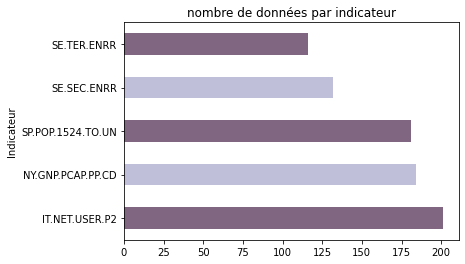

In [76]:
# III-8-2 Répresentation Graphique des indicateurs retenus.
# Définir la couleur du graphique.
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.85)]
# Répresentation Graphique des indicateurs retenus.
df.plot.barh(x='Indicator Code', y='Study_years', title="nombre de données par indicateur", xlabel='Indicateur', color=my_colors, legend=False)
plt.savefig('GRAPHS/10- Nbre_Données_par_Indicateur.png')
plt.show()

In [77]:
# III-9 REDUCTION DU FICHIER DES DONNEES.
# III-9-1 Suppression de la Variable INUTILE.
# Définition du Dataframe Nécessaire pour l'Analyse des Indicateurs par Pays sans Prédictions.
df_pays=data.copy()
# Déterminons la dimention du Dataframe df_pays.
df_pays.shape
# Edition du Nombre de lignes à l'origine du Dataframe df_pays.
print(f'Nombre de lignes à l\'origine : {df_pays.shape[0]}')

Nombre de lignes à l'origine : 886930


In [78]:
# III-9-2 Réduction Temporelle du Dataframe df_pays.
# D'après la description des données de EdStastsData.csv, la décénnie 2010 est la plus fournie en 
# données sur la période 2010-2015 (plus de 94% de NaN pour 2016-2017) : Plage temporelle retenue :
#  2010-2015.
# Suppression des colonnes non utilisées du fichier data.
cols_a_supr=data.columns[4:44].to_list()
# Extension de la Suppression des colonnes non utilisées du fichier data.
cols_a_supr.extend(data.columns[50:69].to_list())
# Suppression des Colonnes Inutiles du fichier df_pays.
df_pays.drop(columns=cols_a_supr,inplace=True)

In [79]:
# III-9-3 Filtre avec les Indicateurs Pertinents Retenus.
# Liste des Indicateurs Pertinents Retenus
indicateurs_a_garder=['SP.POP.1524.TO.UN','SE.SEC.ENRR','SE.TER.ENRR','IT.NET.USER.P2','NY.GNP.PCAP.PP.CD']
# Ne Choisir que les Lignes du Fichier df_pays Donnant des Informations sur les Indicateurs Retenus.
df_pays=df_pays[df_pays['Indicator Code'].isin(indicateurs_a_garder)]
# Edition du Nombre de lignes Restantes du Fichier df_pays.
print(f'Nombre de lignes restantes : {df_pays.shape[0]}')

Nombre de lignes restantes : 1210


In [80]:
# III-9-4 Suppression des Pays hors des Regroupement Pays et leurs Groupes de Revenus.
# Recherche des Codes Pays des Regroupements de Pays.
df_pays_en_trop=df_pays[~df_pays['Country Code'].isin(country_series['CountryCode'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
# Recherche des Doublons du Fichier df_pays_en_trop.
df_pays_en_trop.drop_duplicates(inplace=True)
# Définition de la Liste des Variables à Supprimer du df_pays_en_trop.
iso3_a_suppr=df_pays_en_trop['Country Code'].to_list()
# Suppression de la Variables VGB.
iso3_a_suppr.remove('VGB')
# Suppression de la Variables CUW.
iso3_a_suppr.remove('CUW')
# Suppression de la Variables NRU.
iso3_a_suppr.remove('NRU')
# Suppression de la Variables SXM.
iso3_a_suppr.remove('SXM')
# Suppression de la Variables SSD.
iso3_a_suppr.remove('SSD')
# Suppression de la Variables MAF.
iso3_a_suppr.remove('MAF')   
# Fichier df_pays Final après Suppression des variables hors groupement des pays.
df_pays=df_pays[~df_pays['Country Code'].isin(iso3_a_suppr)]
# Nombre de Lignes Restantes du Fichier final df_pays.
ng_lignes=df_pays.shape[0]
# Edition du Nombre de Lignes Restantes du Fichier final df_pays.
print(f'Nombre de lignes restantes : {ng_lignes}')

Nombre de lignes restantes : 1085


In [81]:
# III-9-5 Suppression des Indicateurs des Pays avec Aucune Donnée Pour Toutes Les Années.
# Les 4 premières variables sont 100% renseignées ==> thresh=4+1 pour conserver une des années avec 
# au moins un chiffre significatif.
# Suppression des données Manquantes Pour thresh = 5.
df_pays.dropna(thresh = 5, inplace=True)
# Définition du Pourcentage des Lignes Supprimées Sans Indicateurs.
pourc_rgpt_non_chiffre=round(((ng_lignes-df_pays.shape[0])*100)/ng_lignes,2)
# Edition du Pourcentage des Lignes Supprimées Sans Indicateurs du Fichier pourc_rgpt_non_chiffre.
print(f'% de lignes sans indicateurs chiffrés supprimées : {pourc_rgpt_non_chiffre}')
# Edition du Nombre de Lignes Restantes du Fichier df_pays.
print(f'Nombre de lignes restantes : {df_pays.shape[0]}')

% de lignes sans indicateurs chiffrés supprimées : 15.58
Nombre de lignes restantes : 916


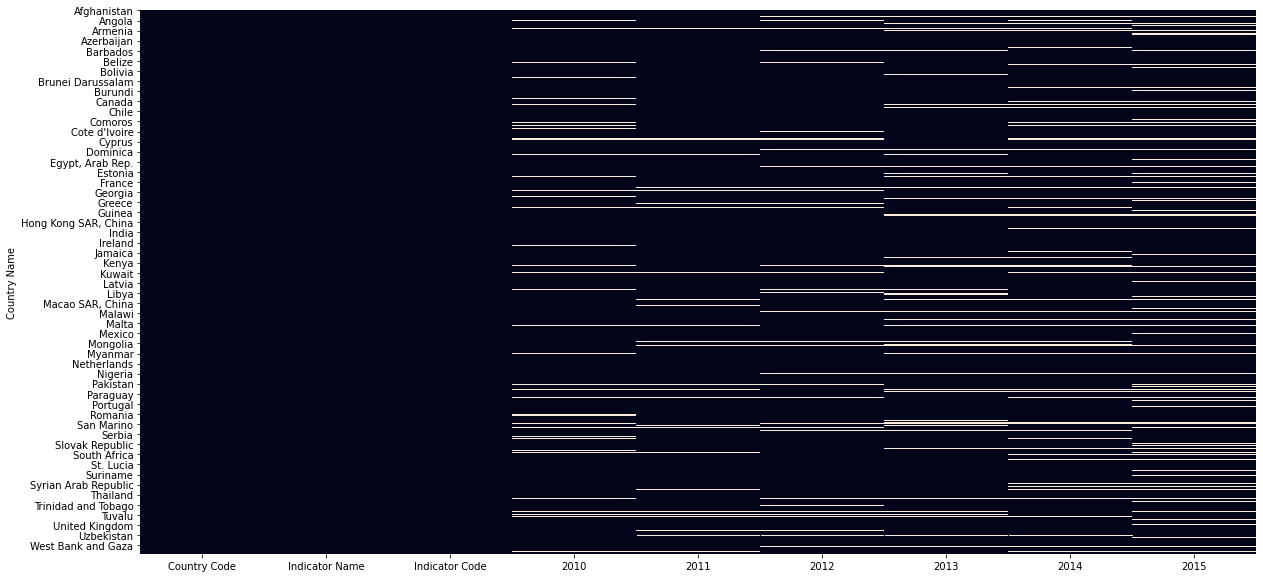

In [82]:
# III-9-6 Représentation Graphique du Fichier Final df_pays.
plt.figure(figsize=(20,10))
# Définition des Noms des Pays comme Index du Fichier df_pays.
df_tmp=df_pays.set_index('Country Name')
# Détermination du Heatmap du Fichier df_pays augmenté de l'Index Nom des Pays.
sns.heatmap(df_tmp.isna(), cbar=False)
plt.savefig('GRAPHS/11- Fichier_Final_des_Pays.png')
plt.show()

In [83]:
# III-10 FUSION DES DONNEES NECESSAIRES DES DIFFERENTS DATASETS.
# III-10-1 Ajout des Variables Région et Groupe de Revenus dans le Fichier df_pays. 
# Ces variables nous permettront d'effectuer des statistiques et des graphiques pour les différentes 
# régions ou les groupes de revenus.
# Variable 'Region' et 'Income Group' du Fichier EdStatsCountry.csv Sans Doublons.
countries_income = pd.DataFrame({'Country_Code' : country['Country Code'].unique(), 
                                 'Region' : country['Region'], 
                                 'Income Group' : country['Income Group']})
# Jointure des Fichiers df_pays et countries_income.
df_pays = pd.merge(df_pays,countries_income, left_on='Country Code', right_on='Country_Code', how='left')
# Suppression de la Colonne 'Country_Code' du Fichier Joint df_pays.
df_pays.drop(columns=['Country_Code'],inplace=True)
# Edition des Colonnes du Fichier joint Final df_pays.columns
df_pays.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group'],
      dtype='object')

In [84]:
# III-10-2 Région NaN
# Identifions les differentes Régions du Fichier df_pays.
df_pays['Region'].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'Sub-Saharan Africa',
       'Latin America & Caribbean', 'East Asia & Pacific',
       'North America', nan, 'A Completer'], dtype=object)

In [85]:
# III-10-3 Déterminons le Pays du Fichier df_pays pour Lequel la Région Correspond à NaN.
df_pays[df_pays['Region'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
117,British Virgin Islands,VGB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,NaN,NaN
118,British Virgin Islands,VGB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,41.64149,NaN,NaN


In [86]:
# Le pays British Virgin Islands appartient à la région 'Latin America & Caribbean'.
# III-10-4 Remplaçons Nan par 'Latin America & Caribbean'.
df_pays.loc[[117,118], 'Region'] = ['Latin America & Caribbean','Latin America & Caribbean']

In [87]:
# III-10-5 Groupes de revenus 'NaN'
# Identifions les differentes Groupe de Revenus du Fichier df_pays.
df_pays['Income Group'].unique()

array(['Low income', 'Upper middle income', 'High income: nonOECD',
       'Lower middle income', 'High income: OECD', nan, 'A Completer'],
      dtype=object)

In [88]:
# III-10-6 Déterminons le Pays du Fichier df_pays pour Lequel le Groupe de Revenus Correspond à NaN.
df_pays[df_pays['Income Group'].isna()]

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Region,Income Group
117,British Virgin Islands,VGB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,101.6024,96.24625,97.60359,98.3093,97.73733,98.73356,Latin America & Caribbean,NaN
118,British Virgin Islands,VGB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,41.64149,Latin America & Caribbean,NaN


In [89]:
# Le pays British Virgin Islands appartient au groupe de revenus 'High income: nonOECD'
# III-10-7 Remplaçons Nan par 'High income: nonOECD'.
df_pays.loc[[117,118], 'Income Group'] = ['High income: nonOECD','High income: nonOECD']

In [90]:
# IV-ANALYSE DES INDICATEURS RETENUS.
# Propagation des valeurs non nulles de 2010 vers 2015 pour travailler sur dernière valeur connue non nulle la plus récente en 2015
# IV-1 Définition du Fichier df_pays_fillna Constitué des Valeurs Manquantes.
df_pays_fillna=df_pays.copy()
# Définition des Colonnes Comprenant des valeurs Manquantes du Fichier df_pays_fillna.
cols_to_interpolate=df_pays_fillna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_pays_fillna[cols_to_interpolate]
# Remplissons les Valeurs Manquantes de la Variable Quantitative df_numeric par la Méthode 'ffill'.
df_numeric.fillna(method='ffill', axis=1, inplace=True)
# Variables qualitatives
df_categ = df_pays_fillna.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
# Concaténation des df_numeric et df_categ
df_pays_fillna = pd.concat([df_categ, df_numeric], axis=1)

# IV-2 Définition du Nombre de Pays.
nb_pays=df_pays_fillna['Country Name'].nunique()
# Edition du Nombre de Pays.
print(f'Nombre de pays : {nb_pays}')
# Ne Garder que la dernière année 2015 totalement remplie.
df_pays_1an=df_pays_fillna[['Country Name','Country Code','Indicator Name','Indicator Code', 'Region', 
                       'Income Group','2015']]
# IV-3 Dernière colonne remplie renommée 'Last info'
df_pays_1an.rename(columns={'2015': 'Last info'}, inplace=True)
# méthode fillna transforme tous les types en object ==> retransformer la dernière colonne en numérique
df_pays_1an=df_pays_1an.astype({'Last info': 'float64'})
# Edition du Fichier df_pays_1an.
df_pays_1an

Nombre de pays : 210


,Country Name,Country Code,Indicator Name,Indicator Code,Region,Income Group,Last info
0,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,South Asia,Low income,1.88000e+03
1,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,South Asia,Low income,5.56444e+01
2,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,South Asia,Low income,8.66280e+00
3,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,South Asia,Low income,8.26000e+00
4,Afghanistan,AFG,"Population, ages 15-24, total",SP.POP.1524.TO.UN,South Asia,Low income,7.25278e+06
...,...,...,...,...,...,...,...
911,Zimbabwe,ZWE,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,Sub-Saharan Africa,Low income,1.79000e+03
912,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Sub-Saharan Africa,Low income,4.75702e+01
913,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,Sub-Saharan Africa,Low income,8.43327e+00
914,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,Sub-Saharan Africa,Low income,2.27428e+01


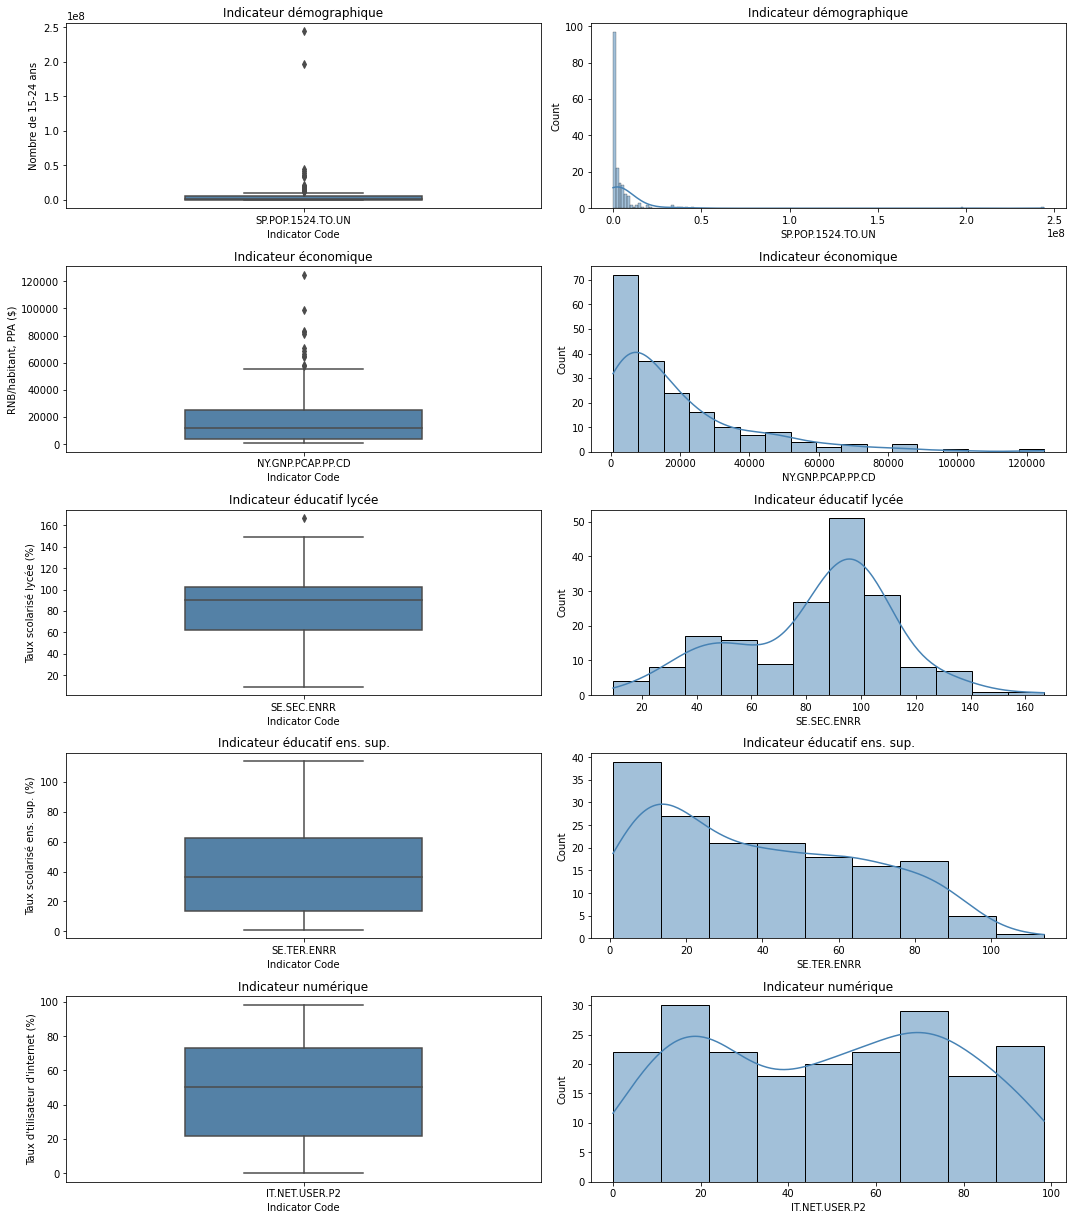

In [91]:
# IV-4 Graphiques statistiques sur les 5 indicateurs du Fichier df_pays_1an. 
plt.figure(figsize = (15, 20))
# ------------------------------------------------------------------------------------
# IV-4-1 Indicateur démographique : SP.POP.1524.TO.UN
# ------------------------------------------------------------------------------------
df_pop=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.1524.TO.UN']
plt.subplot(6,2,1)
sns.boxplot( x=df_pop['Indicator Code'], y=df_pop['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.ylabel('Nombre de 15-24 ans')
plt.subplot(6,2,2)
sns.histplot(df_pop['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xlabel('SP.POP.1524.TO.UN')
# ------------------------------------------------------------------------------------
# IV-4-2 Indicateur économique : NY.GNP.PCAP.PP.CD
# ------------------------------------------------------------------------------------
df_eco=df_pays_1an[df_pays_1an['Indicator Code'] == 'NY.GNP.PCAP.PP.CD']
plt.subplot(6,2,3)
sns.boxplot( x=df_eco['Indicator Code'], y=df_eco['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA ($)')
plt.subplot(6,2,4)
sns.histplot(df_eco['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GNP.PCAP.PP.CD')
# ------------------------------------------------------------------------------------
# IV-4-3 Indicateur éducatif lycée : SE.SEC.ENRR
# ------------------------------------------------------------------------------------
df_edu_sec=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.SEC.ENRR']
plt.subplot(6,2,5)
sns.boxplot( x=df_edu_sec['Indicator Code'], y=df_edu_sec['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.ylabel('Taux scolarisé lycée (%)')
plt.subplot(6,2,6)
sns.histplot(df_edu_sec['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xlabel('SE.SEC.ENRR')
# ------------------------------------------------------------------------------------
# IV-4-4 Indicateur éducatif lycée : SE.TER.ENRR
# ------------------------------------------------------------------------------------
df_edu_ter=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.TER.ENRR']
plt.subplot(6,2,7)
sns.boxplot( x=df_edu_ter['Indicator Code'], y=df_edu_ter['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.ylabel('Taux scolarisé ens. sup. (%)')
plt.subplot(6,2,8)
sns.histplot(df_edu_ter['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif ens. sup.')
plt.xlabel('SE.TER.ENRR')
# ------------------------------------------------------------------------------------
# IV-4-5 Indicateur numérique : IT.NET.USER.P2
# ------------------------------------------------------------------------------------
df_num=df_pays_1an[df_pays_1an['Indicator Code'] == 'IT.NET.USER.P2']
plt.subplot(6,2,9)
sns.boxplot( x=df_num['Indicator Code'], y=df_num['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur numérique')
plt.ylabel('Taux d\'tilisateur d\'internet (%)')
plt.subplot(6,2,10)
sns.histplot(df_num['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur numérique')
plt.xlabel('IT.NET.USER.P2')
plt.savefig('GRAPHS/12- Stats_Ind_Retenus.png')
plt.tight_layout()

In [92]:
# IV-5 Statistiques descriptives des Indicateurs Retenus.
mean_num           = df_num['Last info'].mean()
mean_eco           = df_eco['Last info'].mean()
mean_edu_sec       = df_edu_sec['Last info'].mean()
mean_edu_ter       = df_edu_ter['Last info'].mean()
mean_pop           = df_pop['Last info'].mean()
#---------------------------------------------------------------------------------------------------#
median_num         = df_num['Last info'].median()
median_eco         = df_eco['Last info'].median()
median_edu_sec     = df_edu_sec['Last info'].median()
median_edu_ter     = df_edu_ter['Last info'].median()
median_pop         = df_pop['Last info'].median()
#---------------------------------------------------------------------------------------------------#
var_num            = df_num['Last info'].var(ddof=0)
var_eco            = df_eco['Last info'].var(ddof=0)
var_edu_sec        = df_edu_sec['Last info'].var(ddof=0)
var_edu_ter        = df_edu_ter['Last info'].var(ddof=0)
var_pop            = df_pop['Last info'].var(ddof=0)
#---------------------------------------------------------------------------------------------------#
std_num            = df_num['Last info'].std(ddof=0)
std_eco            = df_eco['Last info'].std(ddof=0)
std_edu_sec        = df_edu_sec['Last info'].std(ddof=0)
std_edu_ter        = df_edu_ter['Last info'].std(ddof=0)
std_pop            = df_pop['Last info'].std(ddof=0)
#---------------------------------------------------------------------------------------------------#
skew_num           = df_num['Last info'].skew()
skew_eco           = df_eco['Last info'].skew()
skew_edu_sec       = df_edu_sec['Last info'].skew()
skew_edu_ter       = df_edu_ter['Last info'].skew()
skew_pop           = df_pop['Last info'].skew()
#---------------------------------------------------------------------------------------------------#
kurtosis_num       = df_num['Last info'].kurtosis()
kurtosis_eco       = df_eco['Last info'].kurtosis()
kurtosis_edu_sec   = df_edu_sec['Last info'].kurtosis()
kurtosis_edu_ter   = df_edu_ter['Last info'].kurtosis()
kurtosis_pop       = df_pop['Last info'].kurtosis()
#---------------------------------------------------------------------------------------------------#
data_stats = [['mean',mean_num, mean_eco, mean_edu_sec, mean_edu_ter, mean_pop],
        ['median', median_num, median_eco, median_edu_sec,median_edu_ter,median_pop],
        ['var',var_num, var_eco, var_edu_sec,var_edu_ter,var_pop], 
        ['std',std_num, std_eco,std_edu_sec, std_edu_ter, std_pop], 
        ['skew', skew_num, skew_eco, skew_edu_sec, skew_edu_ter, skew_pop], 
        ['kurtosis', kurtosis_num, kurtosis_eco, kurtosis_edu_sec, kurtosis_edu_ter, kurtosis_pop]]
df_stat = pd.DataFrame(data_stats,columns=['Desc','Stat_num','Stat_eco','Stat_edu_sec','Stat_edu_ter','Stat_pop'])
df_stat

,Desc,Stat_num,Stat_eco,Stat_edu_sec,Stat_edu_ter,Stat_pop
0,mean,48.63017,1.90438e+04,83.82360,39.49392,6.65499e+06
1,median,50.21966,1.16450e+04,89.88169,36.22854,1.33104e+06
2,var,811.61123,4.28604e+08,815.06711,775.82922,5.74750e+14
3,std,28.48879,2.07028e+04,28.54938,27.85371,2.39739e+07
4,skew,-0.00535,1.96926e+00,-0.35019,0.41960,8.28032e+00
5,kurtosis,-1.26904,4.77319e+00,-0.10257,-1.00113,7.43375e+01


In [93]:
# V- SCORE.
# V-1 Imputation des Valeurs Manquantes.# Interpolation des valeurs par régression linéaire
# V-1-1 Définition du Fichier df_interpolna Constitué des Valeurs Manquantes.
df_interpolna=df_pays.copy()
# Définition des Colonnes Comprenant des valeurs Manquantes du Fichier df_interpolna.
cols_to_interpolate=df_interpolna.columns[4:-2].tolist()
#  Variables Quantitatives.
df_numeric = df_interpolna[cols_to_interpolate]
# Remplissons les Valeurs Manquantes de la Variable Quantitative df_numeric par Interpolation Linéaire.
df_numeric.interpolate(method='linear', axis=1, inplace=True)
# Variables Qualitatives
df_categ = df_interpolna.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
# Concaténation des df_categ et df_numeric.
df_pays_all = pd.concat([df_categ, df_numeric], axis=1)
# V-1-2 Définition du Nombre de Pays.
nb_pays=df_pays_all['Country Name'].nunique()
# Edition du Nombre de Pays.
print(f'nombre de pays : {nb_pays}')

nombre de pays : 210


In [94]:
# V-2 Définition du dataframe pour établir un score.
# Ne Garder que la dernière année 2015 totalement remplie Pour chaque Indicateur et Pays.
df_score= df_pays_all.pivot_table(index=['Country Name'], columns="Indicator Code")['2015']
# Edition de la Dimension df_score.
df_score.shape

(210, 5)

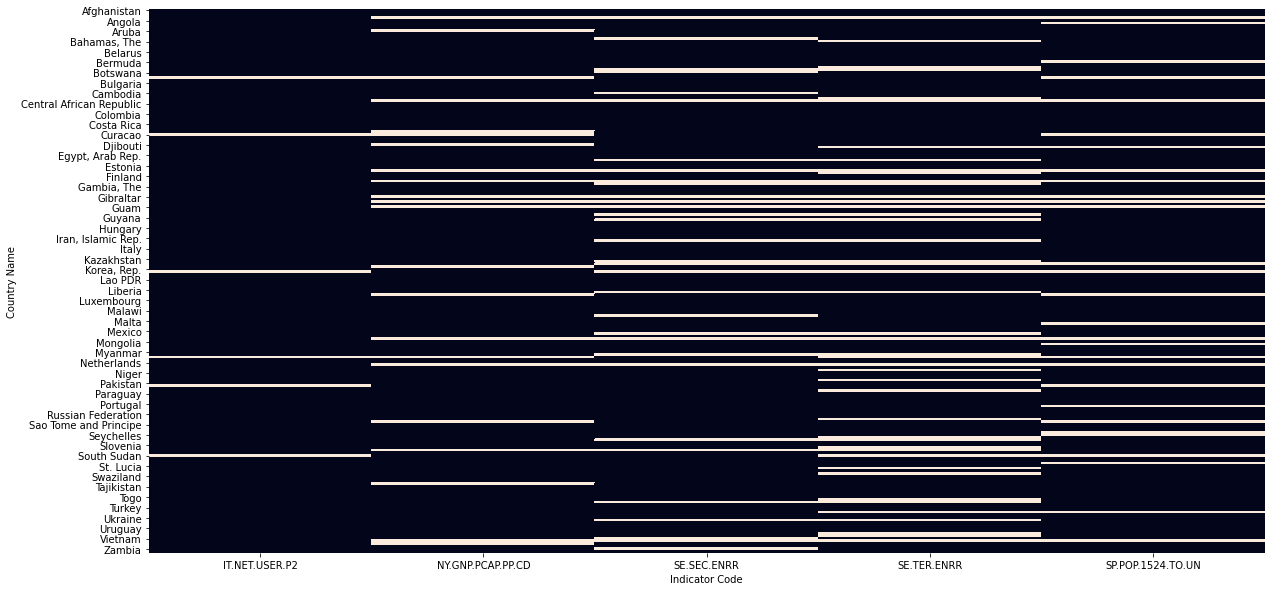

In [95]:
# V-3 Indicateurs Manquants par Pays.
# V-3-1 Représentation Graphique du Heatmap des Valeurs Manquantes du Fichier df_score.
plt.figure(figsize=(20,10))
sns.heatmap(df_score.isna(), cbar=False)
plt.savefig('GRAPHS/13- Heatmap_valeurs_Manquantes.png')
plt.show()  

In [96]:
# V-3-2 Liste des Pays avec au Moins un Indicateur Manquant.
s_pays_indic_manquant=df_score.notnull().sum(axis=1)
# Liste des Pays à Retirer du Fichier s_pays_indic_manquant.
i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<5].index
#i_pays_indic_manquant=s_pays_indic_manquant[s_pays_indic_manquant<6].index
# Edition du Nombre de Pays à Retirer.
print(f'Nombre de pays à retirer : {len(i_pays_indic_manquant)}')
# Extraction du Nombre de Pays à Retirer du Fichier df_score.SP.POP.1524.TO.UN
df_pays_retires=df_score.loc[i_pays_indic_manquant, :].sort_values(by='SP.POP.1524.TO.UN', ascending=False)
# Edition du Fichier df_pays_retires des Pays Retirés.
df_pays_retires

Nombre de pays à retirer : 70


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Vietnam,43.50000,5740.0,NaN,28.83565,16939813.0
Kenya,21.00000,2990.0,NaN,NaN,8902971.0
Iraq,17.22000,15810.0,NaN,NaN,7340940.0
"Venezuela, RB",61.86925,17440.0,89.66401,NaN,5479911.0
Syrian Arab Republic,29.97980,NaN,50.48922,44.04862,4400418.0
Canada,88.47000,43530.0,109.93155,NaN,4373511.0
"Korea, Dem. People’s Rep.",0.00000,NaN,93.39609,28.05944,4023348.0
Cambodia,19.00000,3300.0,NaN,13.08826,3502594.0
Zambia,21.00000,3810.0,NaN,3.98141,3068044.0


In [97]:
# Pour la Suite du Travail, ne Garder que les Pays avec les 5 Indicateurs Retenus.
# V-3-3 Sélection des Pays ayant les 5 Indicateurs Retenus.
df_score.dropna(thresh = 5, inplace=True)
# Edition du Nombre de Pays Restants.
print(f'Nombre de pays restant : {df_score.shape[0]}')
df_score

Nombre de pays restant : 140


Indicator Code,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
Country Name,,,,,
Afghanistan,8.26000,1880.0,55.64441,8.66280,7.25278e+06
Albania,63.25293,11340.0,95.76549,58.10995,5.56269e+05
Algeria,38.20000,14170.0,99.86019,36.92228,6.46782e+06
Angola,12.40000,6270.0,28.89872,9.30802,4.25935e+06
Argentina,68.04306,19990.0,106.77790,82.91739,6.88653e+06
Armenia,59.10238,9110.0,88.50236,44.30950,4.46958e+05
Australia,84.56052,45510.0,137.56479,90.30650,2.91462e+06
Austria,83.94014,49720.0,100.02189,81.54051,9.64629e+05
Bahrain,93.47830,44250.0,102.13090,43.26323,1.32609e+05


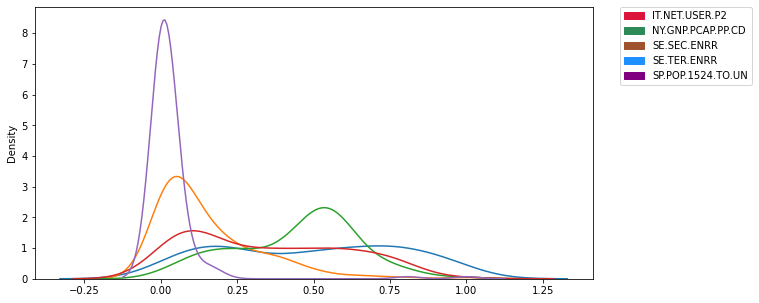

<Figure size 432x288 with 0 Axes>

In [98]:
# V-4 Mise à l'Echelle des Données.
cols         = ['IT.NET.USER.P2','NY.GNP.PCAP.PP.CD','SE.SEC.ENRR','SE.TER.ENRR','SP.POP.1524.TO.UN']
# V-4-1 Normalisation des Données Centrées et Réduites.
mmscaler     =  MinMaxScaler()
mmscaler_df  =  mmscaler.fit_transform(df_score[cols])
df_mmscaler  = pd.DataFrame(mmscaler_df, columns=cols)
# V-4-2 Représentation Graphique du Fichier Normalisé.
P2_02_outils.plot_graph(df_mmscaler)
plt.savefig('GRAPHS/14- Fichier_Normalisé.png')

In [99]:
# V-4-3 Edition du Fichier Normalisé.
df_mmscaler

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN
0,0.07389,0.00973,0.25608,0.06956,0.02962
1,0.64015,0.08582,0.52457,0.50686,0.00218
2,0.38218,0.10858,0.55198,0.31948,0.02640
3,0.11652,0.04504,0.07710,0.07526,0.01735
4,0.68948,0.15539,0.59827,0.72625,0.02812
5,0.59741,0.06788,0.47597,0.38481,0.00173
6,0.85956,0.36065,0.80430,0.79159,0.01184
7,0.85317,0.39451,0.55306,0.71407,0.00386
8,0.95138,0.35052,0.56717,0.37555,0.00045
9,0.13712,0.02324,0.30882,0.11181,0.14083


In [100]:
# V-5 Pondération/Score d'Attractivité.

**V-5-1 Pondération**
                             
| Nature | Nom indicateur | Pondération |
| --- | --- | --- |
| démographique | SP.POP.1524.TO.UN | 4 |
| économique | NY.GNP.PCAP.PP.CD | 1 |
| éducatif | SE.SEC.ENRR | 2 |
| éducatif | SE.TER.ENRR | 3 |
| numérique | IT.NET.USER.P2 | 4 |

In [101]:
# V-5-2 Score d'attractivité.
# Calcul du score en fonction des pondérations données à chaque indicateur:num, eco, ed_sec, ed_ter et pop.
# Définition de L'Index du Fichier df_score.
df_mmscaler['Country Name'] = df_score.index
# Définition du Fichier Pondéré.
df_mmscaler['Score']=[(row[0] *4 + row[1] *1 + row[2] *2 + row[3] *3 + row[4]*4) for row in zip(df_mmscaler['IT.NET.USER.P2'], df_mmscaler['NY.GNP.PCAP.PP.CD'], df_mmscaler['SE.SEC.ENRR'], df_mmscaler['SE.TER.ENRR'], df_mmscaler['SP.POP.1524.TO.UN'])]
# Tri du Fichier Pondéré Par Ordre Croissant.
df_mmscaler.sort_values(by='Score', ascending=False).head(10)

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Country Name,Score
36,0.98075,0.40175,0.75919,0.72509,0.00281,Denmark,8.02967
44,0.87872,0.33741,0.88388,0.76491,0.00252,Finland,7.92489
58,1.00000,0.37497,0.67709,0.71159,0.00009,Iceland,7.86428
6,0.85956,0.36065,0.80430,0.79159,0.01184,Australia,7.82963
12,0.86463,0.36170,1.00000,0.65655,0.00499,Belgium,7.80982
95,0.93332,0.39492,0.79031,0.68719,0.00812,Netherlands,7.80286
99,0.98569,0.51886,0.63984,0.67123,0.00255,Norway,7.76520
69,0.91195,0.27226,0.54543,0.81700,0.02635,"Korea, Rep.",7.56733
135,0.75652,0.46031,0.53662,0.75170,0.18486,United States,7.55417
26,0.50678,0.11059,0.51476,0.37669,0.80707,China,7.52558


In [102]:
# V-5-3 Score d'Attractivité par Région
# Définition du DataFrame région_income Augmenté de la région et du groupe de revenus.
region_income = pd.DataFrame({'Country_Name' : df_pays['Country Name'], 
                                 'Region' : df_pays['Region'], 
                                 'Income Group' : df_pays['Income Group']})
# V-5-3-1 Définition du Fichier df_mmscaler_region par Jointure des Fichiers df_mmscaler et region_income.
df_mmscaler_region = pd.merge(df_mmscaler, region_income, left_on='Country Name', right_on='Country_Name', how='inner')
# Suppression de la Colonne 'Country_Name'.
df_mmscaler_region.drop(columns=['Country_Name'],inplace=True)
# Suppression des doublons du Fichier df_mmscaler_region.
df_mmscaler_region.drop_duplicates(inplace=True)
# Tri du Fichier df_mmscaler_region par Région et par Ordre Croissant.
df_mmscaler_region.sort_values(by='Score',ascending=False).head(10);
# Définition du dataframe de visualisation du regroupement par pays.
df_mmscaler_score_region = df_mmscaler_region.groupby('Region').mean()
# Renommer les Colonnes du Fichier Pdf_score_region.
df_scored_region=df_mmscaler_score_region.rename(columns={'IT.NET.USER.P2':'num',
                                                'NY.GNP.PCAP.PP.CD':'eco',
                                                'SE.SEC.ENRR':'edu_sec',
                                                'SE.TER.ENRR':'edu_ter',
                                                 'SP.POP.1524.TO.UN':'pop'})
# Tri du Fichier Final df_score_region par Région et par Ordre Croissant.
df_score_region=df_scored_region.sort_values(by='Score',ascending=False)
# Edition du Fichier Final df_score_region par Région et par Ordre Croissant.
df_score_region

,num,eco,edu_sec,edu_ter,pop,Score
Region,,,,,,
North America,0.75652,0.46031,0.53662,0.75170,0.18486,7.55417
Europe & Central Asia,0.71844,0.23885,0.61009,0.55475,0.00977,6.03611
East Asia & Pacific,0.57316,0.24604,0.51297,0.43579,0.07847,5.18586
Middle East & North Africa,0.63033,0.26098,0.46616,0.34742,0.01707,4.82521
Latin America & Caribbean,0.50151,0.10049,0.49202,0.38510,0.01817,4.31854
South Asia,0.20953,0.03870,0.35096,0.12506,0.19585,2.73731
Sub-Saharan Africa,0.16049,0.02190,0.20280,0.07653,0.01987,1.37854


In [103]:
# V-5-3-2 Region index File.
index_score_region = df_score_region.index
index_score_region

Index(['North America', 'Europe & Central Asia', 'East Asia & Pacific',
       'Middle East & North Africa', 'Latin America & Caribbean', 'South Asia',
       'Sub-Saharan Africa'],
      dtype='object', name='Region')

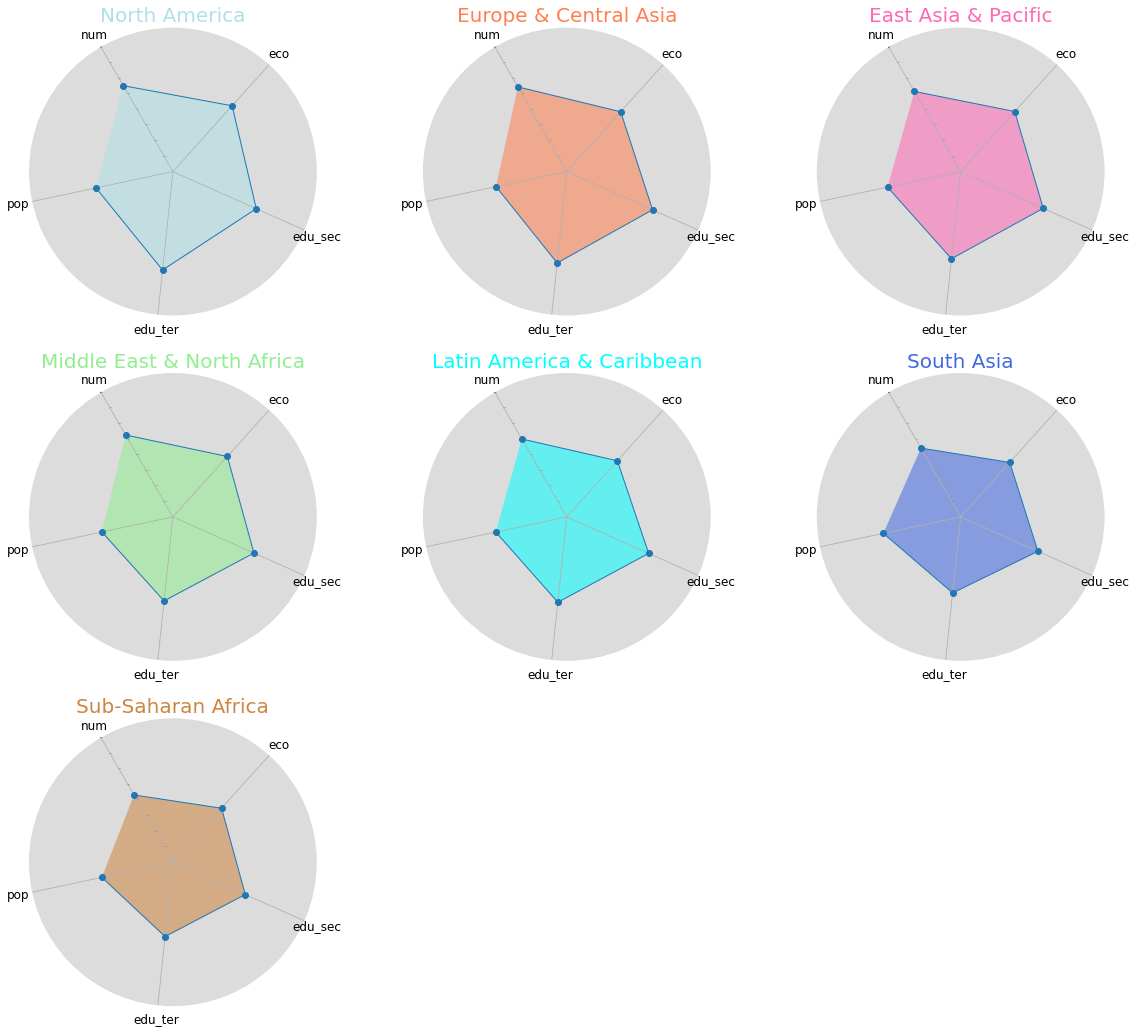

In [104]:
# V-5-3-3 Graphique1:Représentation du Score par Région.
df_plot = df_score_region[['num','eco','edu_sec','edu_ter','pop']]
plt.rc('axes', facecolor = 'Gainsboro')
# number of variable
categories=list(df_plot.columns)
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
fig = plt.figure(1, figsize=(20,18))
colors = ['PowderBlue', 'Coral', 'HotPink', 'LightGreen', 'Cyan', 'RoyalBlue','Peru']
for i, region in enumerate(df_plot.index) : 
    ax = fig.add_subplot(3,3,i+1, polar=True)
    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    # Draw one axe per variable + add labelslabels yet
    plt.xticks(angles, categories, size=8)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)
plt.savefig('GRAPHS/15- Score_par_région.png')
plt.show()

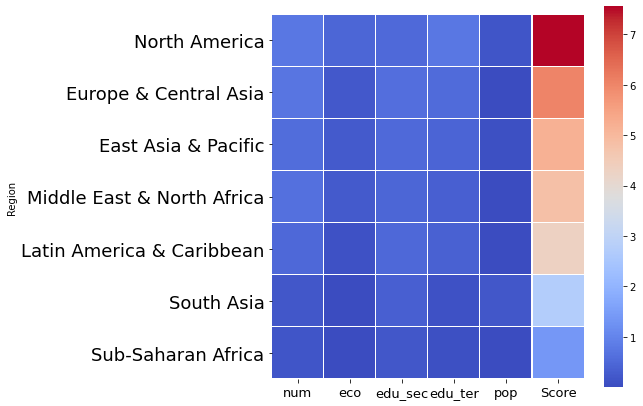

In [105]:
# V-5-3-4 Graphique2:Représentation du Heatmap par Région. 

fig = plt.figure(1, figsize=(7, 7))
res = sns.heatmap(df_score_region, square=True, linewidths=0.1, cmap='coolwarm')
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 13)
plt.savefig('GRAPHS/16- Heatmap_Score_par_région.png')
plt.show()

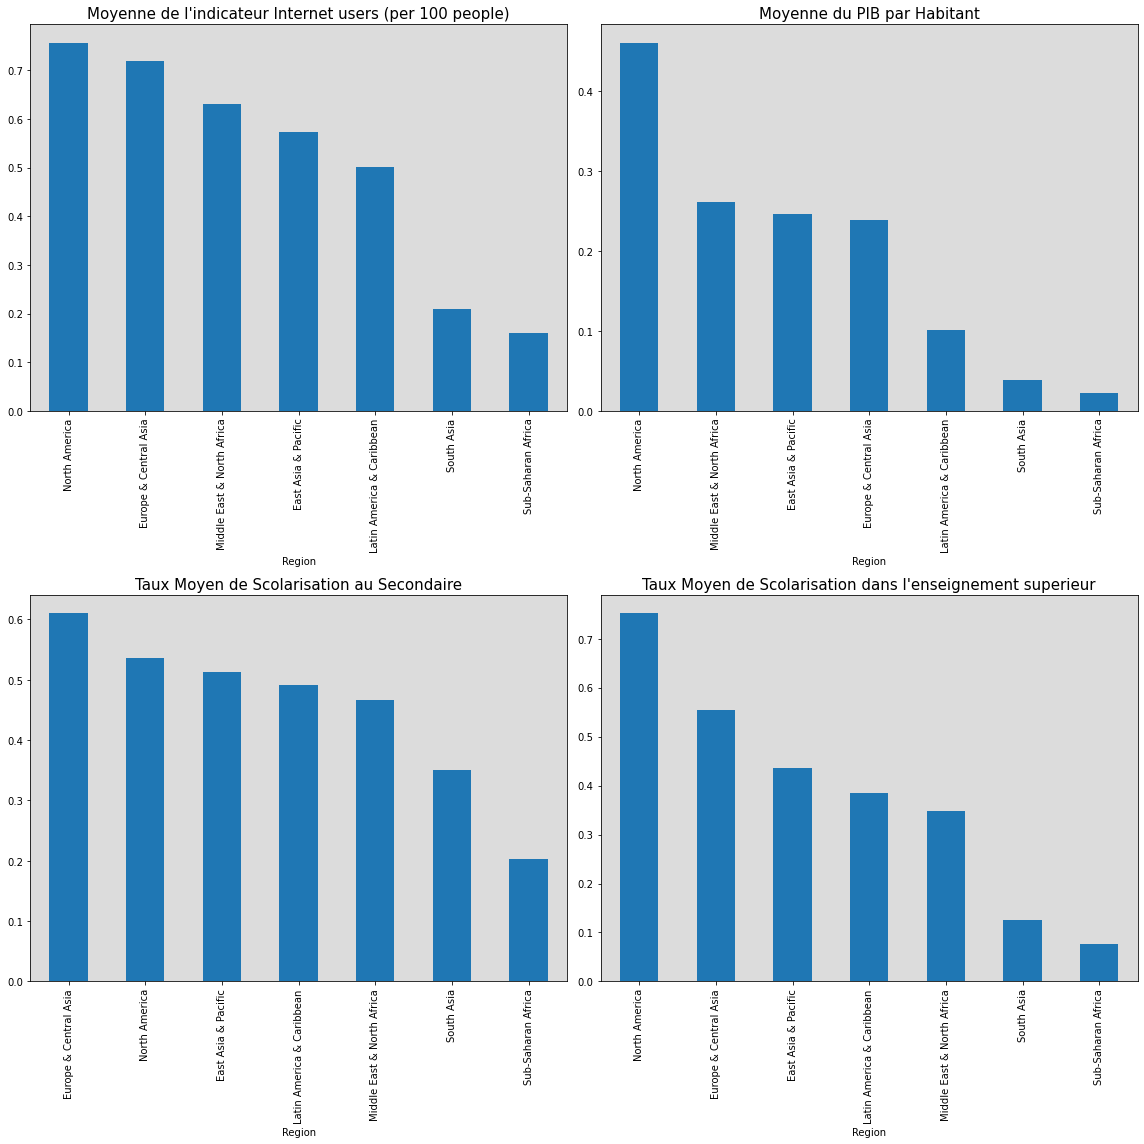

In [106]:
# # V-5-3-5 Représentation Graphique des Indicateurs Choisis par Région. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.85)]
plt.subplot(221)
plt.title('Moyenne de l\'indicateur Internet users (per 100 people)').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'num', ascending=False)
df_score_region['num'].plot(kind="bar")
plt.subplot(222)
plt.title('Moyenne du PIB par Habitant').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'eco', ascending=False)
df_score_region['eco'].plot(kind="bar")
plt.subplot(223)
plt.title('Taux Moyen de Scolarisation au Secondaire').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'edu_sec', ascending=False)
df_score_region['edu_sec'].plot(kind="bar")
plt.subplot(224)
plt.title('Taux Moyen de Scolarisation dans l\'enseignement superieur').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'edu_ter', ascending=False)
df_score_region['edu_ter'].plot(kind="bar")
plt.savefig('GRAPHS/17- Score_par_Ind_par_région.png')
plt.tight_layout()

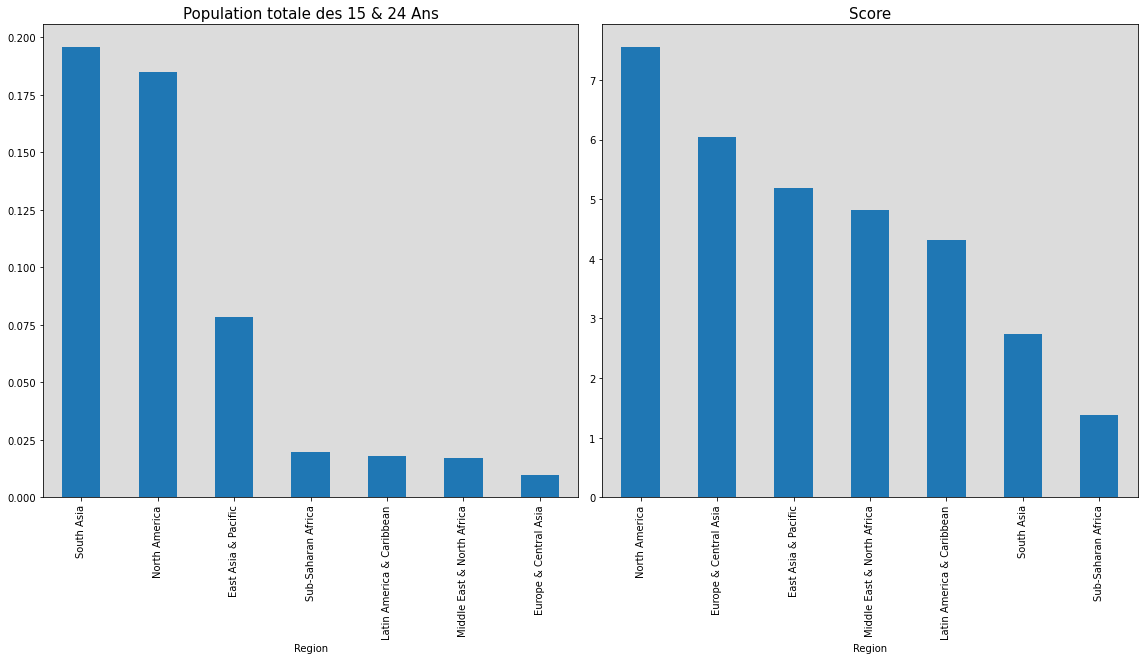

In [107]:
# # V-5-3-6 Représentation Graphique des Indicateurs Choisis par Région. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
plt.subplot(221)
plt.title('Population totale des 15 & 24 Ans').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'pop', ascending=False)
df_score_region['pop'].plot(kind="bar")
plt.subplot(222)
plt.title('Score').set_fontsize(15)
df_score_region = df_score_region.sort_values(by = 'Score', ascending=False)
df_score_region['Score'].plot(kind="bar")
plt.savefig('GRAPHS/18- Score_par_Ind_par_région2.png')
plt.tight_layout()

In [108]:
# V-5-4 Score d'Attractivité par Groupe de Revenus.
# Définition du Fichier df_score_income Score Régional par Groupe de Revenus.
#df_score_income = scaled_df_std_region.groupby('Income Group').mean()
df_mmscaler_score_income = df_mmscaler_region.groupby('Income Group').mean()
# Renommons les Différentes Colonnes du Fichier df_score_income.
df_scored_income = df_mmscaler_score_income.rename(columns={'IT.NET.USER.P2':'num',
                                                            'NY.GNP.PCAP.PP.CD':'eco',
                                                            'SE.SEC.ENRR':'edu_sec',
                                                            'SE.TER.ENRR':'edu_ter',
                                                            'SP.POP.1524.TO.UN':'pop'})
# Trions le Fichier df_scored_income par Ordre Croissant.
df_score_income=df_scored_income.sort_values(by='Score', ascending=False)
# Edition du Fichier df_score_income.
df_score_income

,num,eco,edu_sec,edu_ter,pop,Score
Income Group,,,,,,
High income: OECD,0.84112,0.33458,0.65831,0.64494,0.01670,7.01728
High income: nonOECD,0.77803,0.39558,0.56153,0.48603,0.00634,6.11422
Upper middle income,0.53302,0.11911,0.50079,0.40200,0.04404,4.63493
Lower middle income,0.31797,0.04570,0.37156,0.20477,0.05432,2.89226
Low income,0.09914,0.00926,0.17424,0.06371,0.02395,1.04121


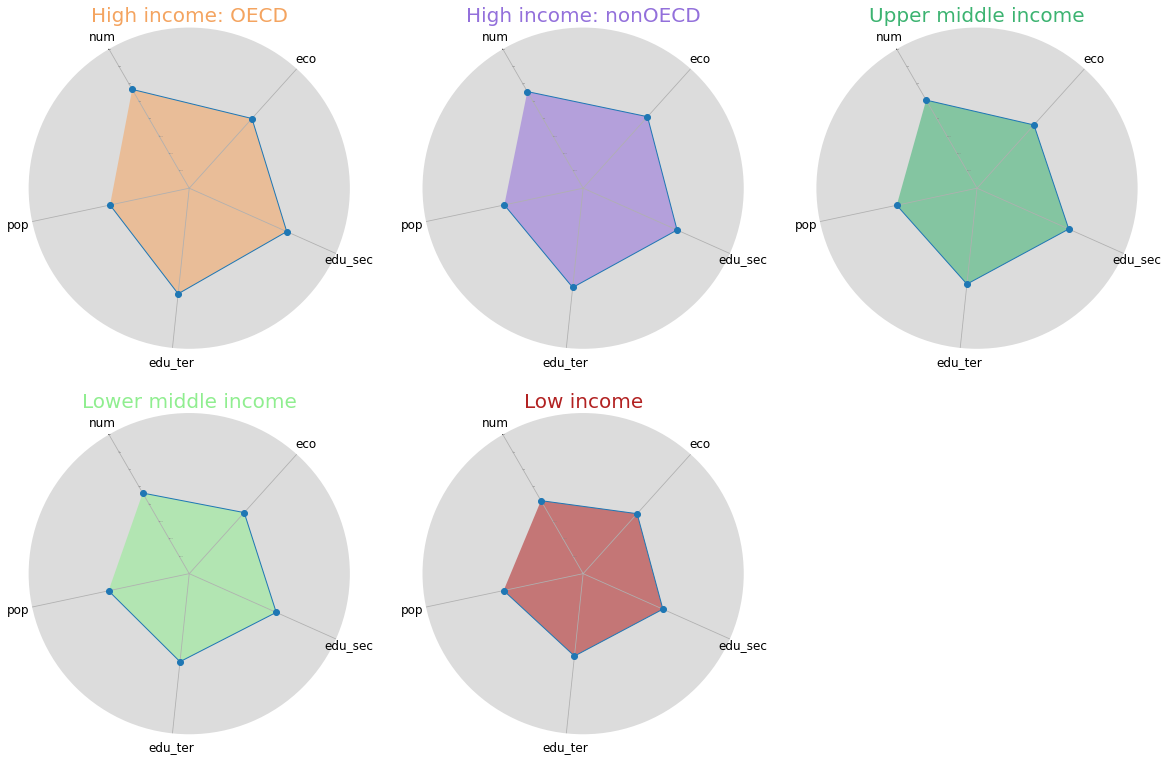

In [109]:
# V-5-4-1 Graphique1: Représentation du Score par Groupe de Revenus.
df_plot = df_score_income[['num','eco','edu_sec','edu_ter','pop']]
plt.rc('axes', facecolor = 'Gainsboro')
# number of variable
categories=list(df_plot.columns)
N = len(categories)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable).
angles = [n / float(N) * 2 * pi for n in range(N)]
fig = plt.figure(1, figsize=(20,13))
colors = ['SandyBrown', 'MediumPurple', 'MediumSeaGreen', 'LightGreen', 'FireBrick']
for i, region in enumerate(df_plot.index) : 
    ax = fig.add_subplot(2,3,i+1, polar=True)
    ax.set_theta_offset(2*pi/3)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(0)
    # Draw one axe per variable + add labels labels yet.
    plt.xticks(angles, categories, size=16)
    plt.yticks(color="grey", size=2)
    values=df_plot.iloc[i].values
    ax.plot(angles, values, 'o-', linewidth=1, linestyle='solid')
    ax.fill(angles, values, colors[i], alpha=0.55)
    ax.set_xticks(angles)
    ax.set_xticklabels(categories, fontsize=12)
    ax.set_title(region, size=20, color=colors[i])
    ax.grid(True)
    plt.grid(True)
    plt.ylim(-2,2)
plt.savefig('GRAPHS/19- Score_par_Ind_par_Grpe_Revenus.png')
plt.show()

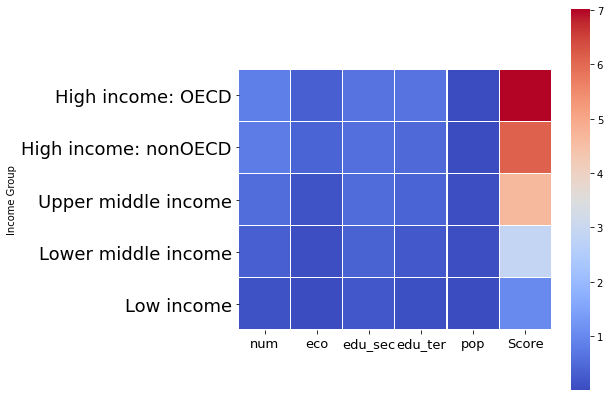

In [110]:
# V-5-4-2 Graphique2: Représentation du Heatmap du Score par Groupe de Revenus.
fig = plt.figure(1, figsize=(7, 7))
ax = sns.heatmap(df_score_income, square=True, linewidths=0.1, cmap='coolwarm')
ax.tick_params(axis='x',labelsize=13)
ax.tick_params(axis='y',labelsize=18)
plt.savefig('GRAPHS/20- Heatmap_Score_par_Grpe_Revenus.png')
plt.show()

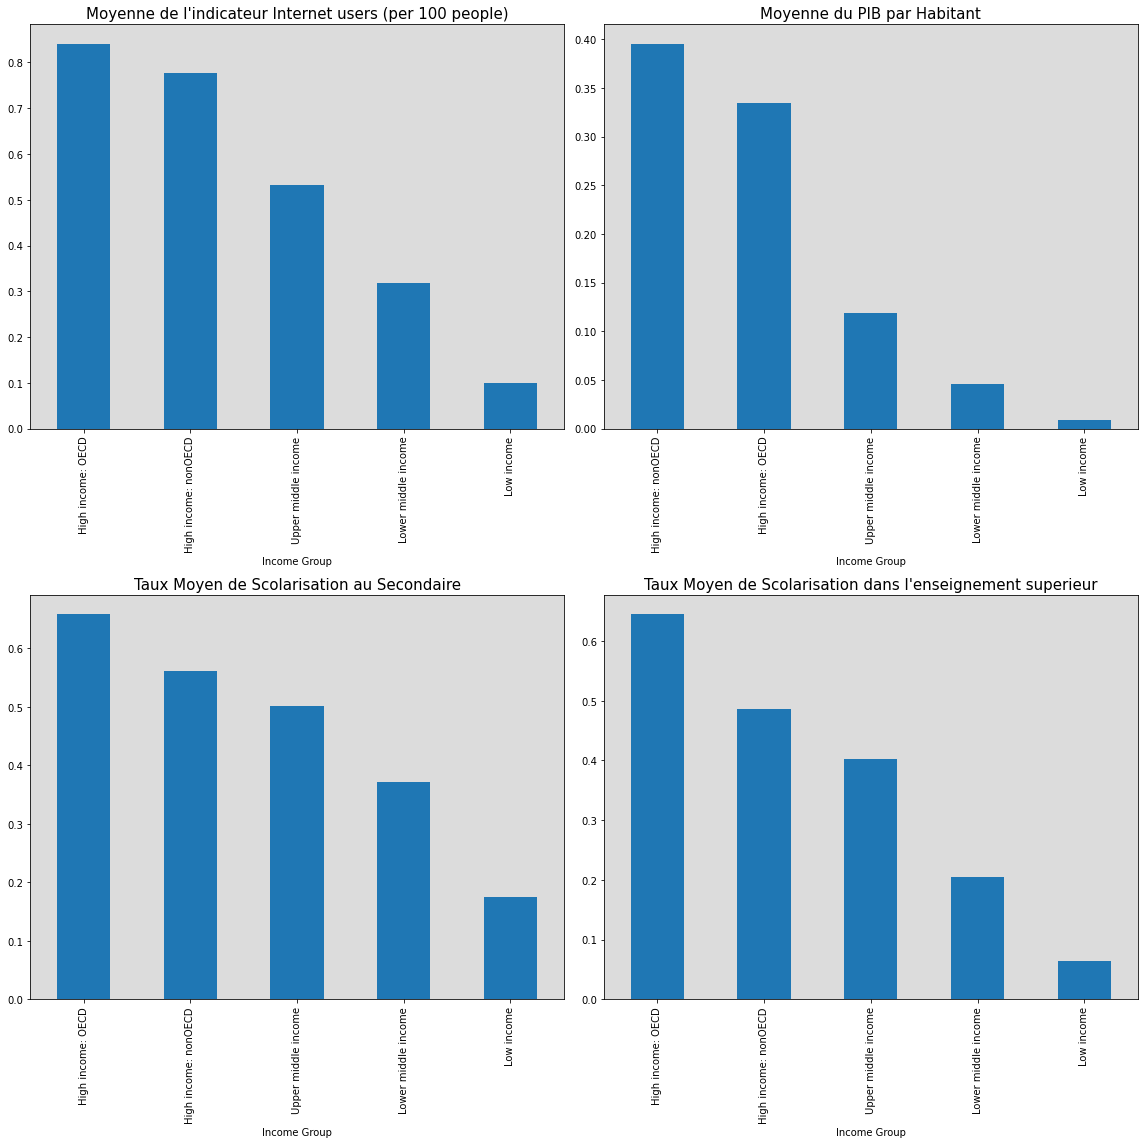

In [111]:
# V-5-4-3 Représentation Graphique des Indicateurs Choisis par Groupe de Revenus. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.85)]
plt.subplot(221)
plt.title('Moyenne de l\'indicateur Internet users (per 100 people)').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'num', ascending=False)
df_score_income['num'].plot(kind="bar")
plt.subplot(222)
plt.title('Moyenne du PIB par Habitant').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'eco', ascending=False)
df_score_income['eco'].plot(kind="bar")
plt.subplot(223)
plt.title('Taux Moyen de Scolarisation au Secondaire').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'edu_sec', ascending=False)
df_score_income['edu_sec'].plot(kind="bar")
plt.subplot(224)
plt.title('Taux Moyen de Scolarisation dans l\'enseignement superieur').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'edu_ter', ascending=False)
df_score_income['edu_ter'].plot(kind="bar")
plt.savefig('GRAPHS/21- Score_par_Ind_Grpe_Revenus.png')
plt.tight_layout()
#plt.savefig('EdStatsData_indicateur_global.png')

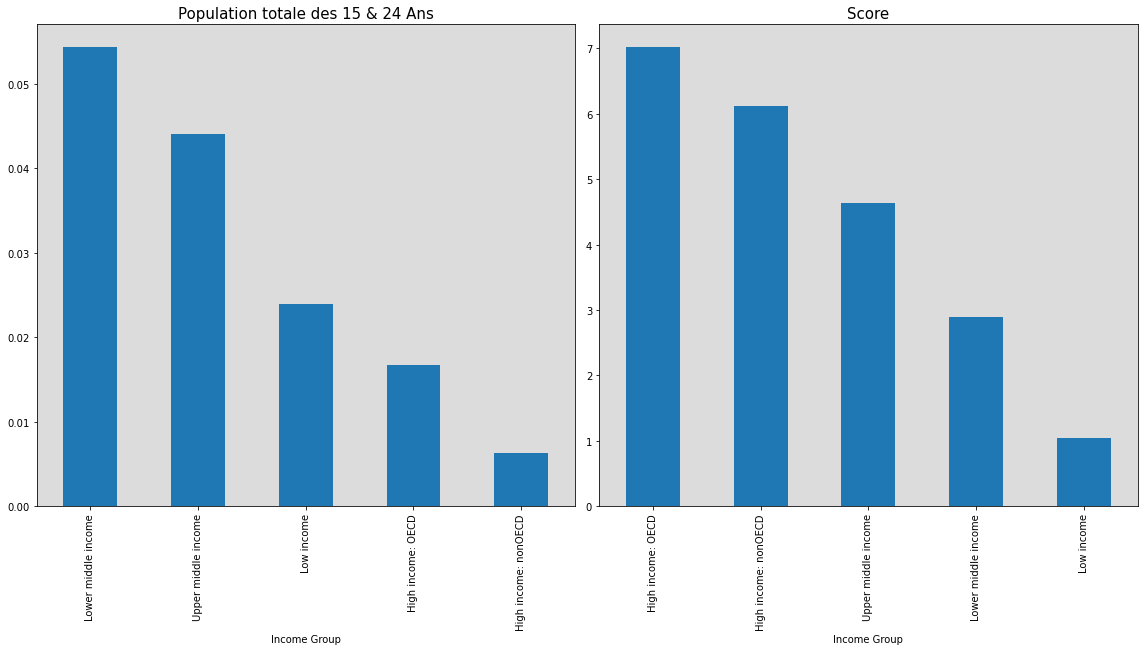

In [112]:
# V-5-4-4 Représentation Graphique des Indicateurs Choisis par Groupe de Revenus. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
plt.subplot(221)
plt.title('Population totale des 15 & 24 Ans').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'pop', ascending=False)
df_score_income['pop'].plot(kind="bar")
plt.subplot(222)
plt.title('Score').set_fontsize(15)
df_score_income = df_score_income.sort_values(by = 'Score', ascending=False)
df_score_income['Score'].plot(kind="bar")
plt.savefig('GRAPHS/22- Score_par_Ind_Grpe_Revenus2.png')
plt.tight_layout()

In [113]:
# V-5-5 Score d'Attractivité Représenté sur une Carte du Monde.
# V-5-5-1 Importation du dataset des pays du monde de geopandas.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
# Dataset geopandas : code ISO-3166 alpha 3 et Nom court.
df1=world.sort_values(by = ['iso_a3'])
df1=df1.loc[:,['iso_a3','name']]
df1=df1.rename(columns={'iso_a3':'ISO'})
df1=df1.set_index('ISO')
#  Dataset EdStatsCountry.csv : code ISO-3166 alpha 3 et Nom court.
df2=country.sort_values(by = ['Country Code'])
df2=df2.loc[:,['Country Code','Short Name']]
df2=df2.rename(columns={'Country Code':'ISO'})
df2=df2.set_index('ISO')
# Jointure des 2 dataframes df1 & df2.
df_comp_nom_pays= pd.merge(df1, df2, on='ISO', how='left')
# Reinitialisation du Fichier Joint df_comp_nom_pays.
df_comp_nom_pays.reset_index(inplace=True)
# Recherche des noms de pays différents entre geopandas et notre Fichier de données.
rows = df_comp_nom_pays[df_comp_nom_pays['name'] != df_comp_nom_pays['Short Name']]
rows.drop([0,1,2,3,4], inplace=True)
df_comp=rows[rows['Short Name'].notnull()].sort_values(by='ISO')
noms_a_changer=df_comp['Short Name'].tolist()
codes_iso=df_comp['ISO'].tolist()
# Récupération des index geopandas des noms de pays à changer.
index_geo=world[world['iso_a3'].isin(codes_iso)].index
# Récupération des codes ISO 3 de geopandas.
codes_isoa3=world.loc[index_geo,'iso_a3'].tolist()
# Parcours les codes ISO 3 pour avoir une liste de noms de pays dans l'ordre des index geopandas.
noms_a_changer=[]
[noms_a_changer.append(df_comp[df_comp['ISO'] == iso]['Short Name'].tolist()[0]) for iso in codes_isoa3]
# Changement du libellé des noms courts des pays de geopandas par ceux de notre Fichier de données.
world.loc[world.index[index_geo.tolist()],'name']=noms_a_changer
# Pays écartés représentés en blanc sur la carte.
df_pays_ecartes=pd.DataFrame({'Country Name': df_pays_retires.index, 'Score': np.zeros((70,), dtype=int)})
df_pays_ecartes.drop(index = [20,33,36,37,38,39,40,41,42,43,44,45,46,48,49,50,52,53,55,56,57,59,61,63,65,67,68,69], inplace = True) 
df_pays_ecartes.loc[3, 'Country Name'] = 'Venezuela'
df_pays_ecartes.loc[34, 'Country Name'] = 'The Bahamas'
df_pays_ecartes.loc[6, 'Country Name'] = 'Dem. People\'s Rep. Korea'
df_pays_ecartes.loc[47, 'Country Name'] = 'Dominican Republic'
df_pays_ecartes.shape

(42, 2)

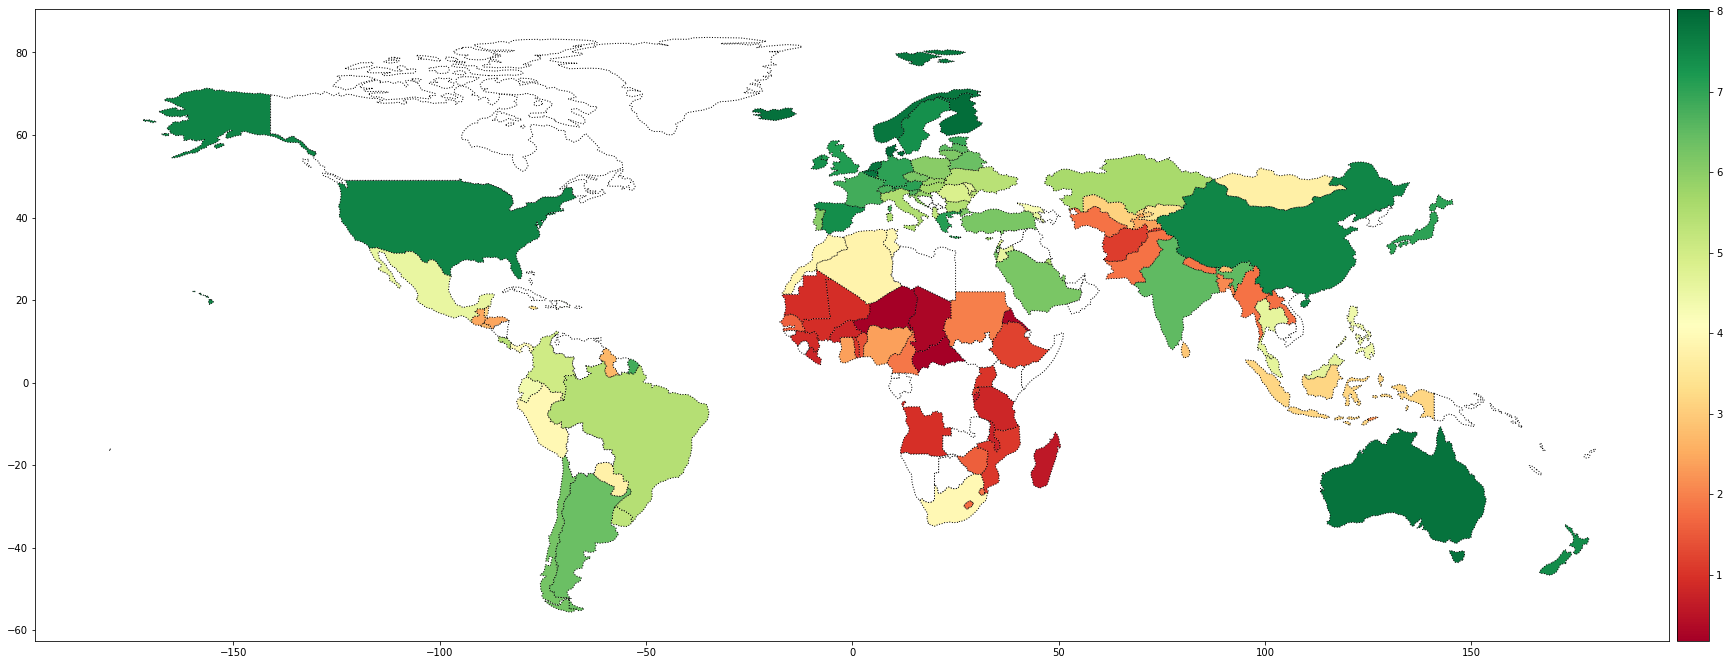

In [114]:
# V-5-5-2 Jointure des Fichiers world et df_score_scaled.
df_score_geo = world.merge(df_mmscaler, left_on = 'name', right_on = 'Country Name')[['geometry','Country Name','Score']]
df_pays_ecartes_geo = world.merge(df_pays_ecartes, left_on = 'name', right_on = 'Country Name')[['geometry','Country Name','Score']]
# V-5-5-3 Représentation Graphique du Fichier Joint.
fig, ax = plt.subplots()
fig.set_size_inches(30,18)
ax.set_facecolor('xkcd:white')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
df_score_geo.plot(column=df_score_geo['Score'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='black' )
df_pays_ecartes_geo.plot(column=df_pays_ecartes['Score'], legend = True, ax=ax, cax=cax, color='white',linestyle=":",edgecolor='black' )
plt.savefig('GRAPHS/23- Score_par_Ind_Monde.png')
plt.show()

In [115]:
# V-5-6 Déterminons Le Top10 Provisoire des Pays les Plus Attractifs.
# Tri du Fichier df_score_scaled par Ordre Croissant.
df_top10_prov  = df_mmscaler[['Country Name','Score']].sort_values(by='Score', ascending=False).head(10)
# Classement Provisoire du Fichier df_top10_prov.
df_top10_prov['Place Provisoire']=np.arange(1, 11, 1)
# Classement Provisoire des Pays les Plus Attractifs.
df_top10_prov.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Indexation du Classement Provisoire des Pays les Plus Attractifs.
df_top10_prov.set_index('Place Provisoire')

,Pays,Score
Place Provisoire,,
1,Denmark,8.02967
2,Finland,7.92489
3,Iceland,7.86428
4,Australia,7.82963
5,Belgium,7.80982
6,Netherlands,7.80286
7,Norway,7.76520
8,"Korea, Rep.",7.56733
9,United States,7.55417


In [116]:
# V-5-6-1 Déterminons l'index du Fichier df_top10_prov.
index_df_top10_prov =df_top10_prov['Pays']
# Visualisation de index_df_top10_prov.
index_df_top10_prov

36           Denmark
44           Finland
58           Iceland
6          Australia
12           Belgium
95       Netherlands
99            Norway
69       Korea, Rep.
135    United States
26             China
Name: Pays, dtype: object

In [117]:
# V-5-6-2 Etudions les Caractéristiques des Indicateurs Retenus sur le top10 Provisoire des Pays Privilégiés.
Top10_prov_Graphs  = df_mmscaler.sort_values(by='Score', ascending=False).head(10)
# Renommer Country Name par Pays.
Top10_prov_Graphs.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Initialiser l'index du Fichier Top10_prov_Graphs.
Top10_provs_Graphs  =  Top10_prov_Graphs.set_index('Pays')
Top10_provs_Graphs

,IT.NET.USER.P2,NY.GNP.PCAP.PP.CD,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,Score
Pays,,,,,,
Denmark,0.98075,0.40175,0.75919,0.72509,0.00281,8.02967
Finland,0.87872,0.33741,0.88388,0.76491,0.00252,7.92489
Iceland,1.00000,0.37497,0.67709,0.71159,0.00009,7.86428
Australia,0.85956,0.36065,0.80430,0.79159,0.01184,7.82963
Belgium,0.86463,0.36170,1.00000,0.65655,0.00499,7.80982
Netherlands,0.93332,0.39492,0.79031,0.68719,0.00812,7.80286
Norway,0.98569,0.51886,0.63984,0.67123,0.00255,7.76520
"Korea, Rep.",0.91195,0.27226,0.54543,0.81700,0.02635,7.56733
United States,0.75652,0.46031,0.53662,0.75170,0.18486,7.55417


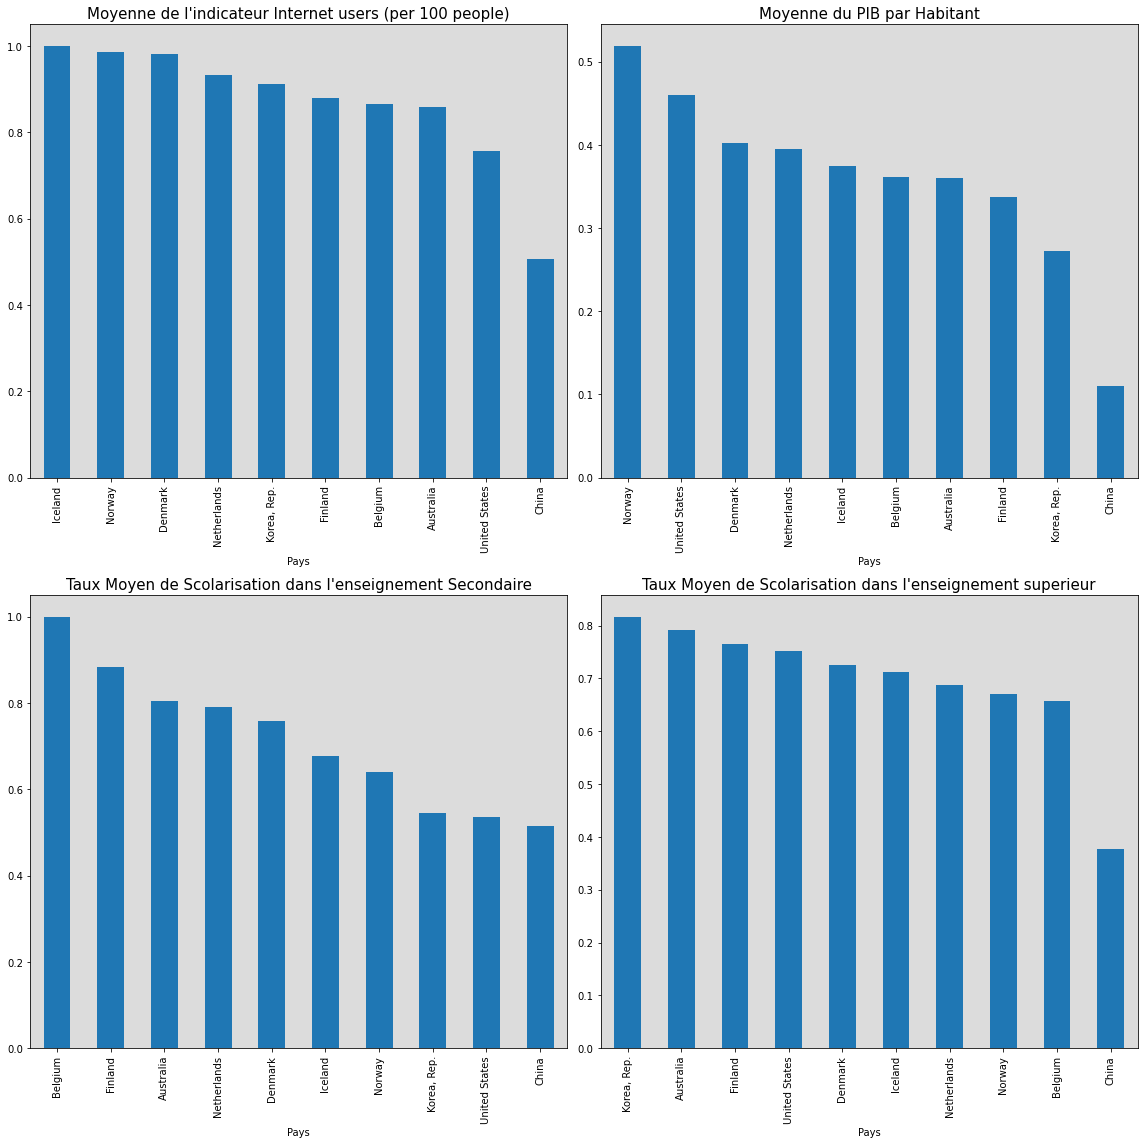

In [118]:
# V-5-6-3 Représentation Graphique des Indicateurs Retenus par Pays.
# Graphiques statistiques sur les 5 indicateurs du Fichier df_pays_1an. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.85)]
plt.subplot(221)
plt.title('Moyenne de l\'indicateur Internet users (per 100 people)').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'IT.NET.USER.P2', ascending=False)
Top10_provs_Graphs['IT.NET.USER.P2'].plot(kind="bar")
plt.subplot(222)
plt.title('Moyenne du PIB par Habitant').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'NY.GNP.PCAP.PP.CD', ascending=False)
Top10_provs_Graphs['NY.GNP.PCAP.PP.CD'].plot(kind="bar")
plt.subplot(223)
plt.title('Taux Moyen de Scolarisation dans l\'enseignement Secondaire').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'SE.SEC.ENRR', ascending=False)
Top10_provs_Graphs['SE.SEC.ENRR'].plot(kind="bar")
plt.subplot(224)
plt.title('Taux Moyen de Scolarisation dans l\'enseignement superieur').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'SE.TER.ENRR', ascending=False)
Top10_provs_Graphs['SE.TER.ENRR'].plot(kind="bar")
plt.savefig('GRAPHS/24- Score_par_Ind_Top10.png')
plt.tight_layout()

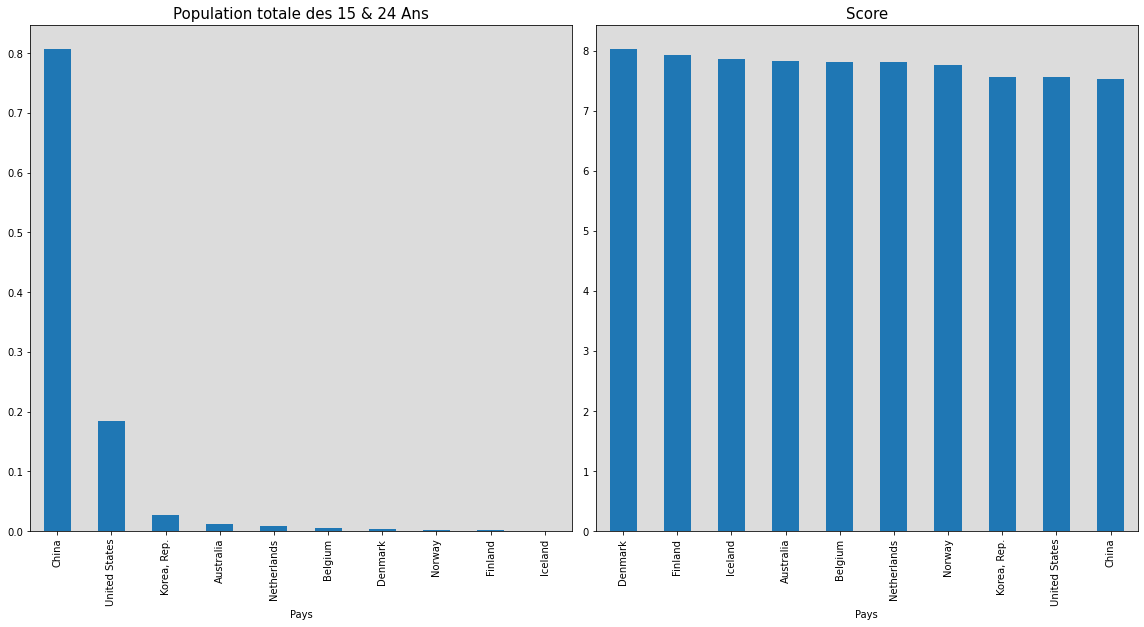

In [119]:
# V-5-6-4 Représentation Graphique des Indicateurs Retenus par Pays.
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
plt.subplot(221)
plt.title('Population totale des 15 & 24 Ans').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'SP.POP.1524.TO.UN', ascending=False)
Top10_provs_Graphs['SP.POP.1524.TO.UN'].plot(kind="bar", x='Pays', xlabel= 'Pays')
plt.subplot(222)
plt.title('Score').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'Score', ascending=False)
Top10_provs_Graphs['Score'].plot(kind="bar", x='Pays', xlabel= 'Pays')
plt.savefig('GRAPHS/25- Score_par_Ind_Top102.png')
plt.tight_layout()

In [120]:
# V-5-7 Déterminons Le Top10 des Pays & Régions les Plus Attractifs Par Groupes de Revenus.
# V-5-7-1 Définition du Fichier df_top10_region des Pays & Régions les Plus Attractives Par Groupes de Revenus.
df_top10_region=df_pays[df_pays['Country Code'].isin(['DNK', 'FIN', 'ISL','AUS','BEL','NLD','NOR','KOR','USA','CHN'])][['Country Name','Region','Income Group']]
# Suppression des Doublons.
df_top10_region.drop_duplicates(inplace=True)
# Renommer Country Name par Pays.
df_top10_region.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Indexation du Fichier df_top10_region.
df_top10_region.set_index('Pays', inplace=True)
# V-5-7-2 Tri du Fichier df_top10_region par Ordre Croissant.
df_top10_region.sort_values(by='Region', inplace=True)
# Edition du Top10 des Pays & Régions les Plus Attractives Par Groupes de Revenus.
df_top10_region

,Region,Income Group
Pays,,
Australia,East Asia & Pacific,High income: OECD
China,East Asia & Pacific,Upper middle income
"Korea, Rep.",East Asia & Pacific,High income: OECD
Belgium,Europe & Central Asia,High income: OECD
Denmark,Europe & Central Asia,High income: OECD
Finland,Europe & Central Asia,High income: OECD
Iceland,Europe & Central Asia,High income: OECD
Netherlands,Europe & Central Asia,High income: OECD
Norway,Europe & Central Asia,High income: OECD


In [121]:
# VI- Pour Chacun de ces Pays, Quelle sera l’Evolution de ce Potentiel de Clients?
# VI-1 Données de Prévisions.
df_prev = data[list(data.loc[:, 'Country Name' : 'Indicator Code']) + list(data.loc[:, '2020':])]
#Visualisation du fichier df_prev.
df_prev

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Nous gardons dans cette étude, le top10 des pays les mieux classés et nous observons l'évolution de leurs indicateurs 'PRJ.POP.ALL.4.MF' et 'PRJ.POP.ALL.3.MF'
# VI-2 COMMENT DEFINIR UNE FONCTION QUI DETECTE LES INDICATEURS DE PREVISIONS 'PRJ'.
def Findword2(word, df):
    liste_mot_cle = [row for row in df['Indicator Code'] if (word) in row]
    df_new = df[df['Indicator Code'].isin(liste_mot_cle)][['Indicator Code','Indicator Name']]
    return df_new

In [123]:
#VI-2-1 Récupération des Indicateurs de Prévision 'PRJ'.
df_new = Findword2(word='PRJ', df= df_prev)
df_new

,Indicator Code,Indicator Name
3349,PRJ.MYS.0T19.FE,Wittgenstein Projection: Mean years of schooli...
3350,PRJ.MYS.0T19.MA,Wittgenstein Projection: Mean years of schooli...
3351,PRJ.MYS.0T19.MF,Wittgenstein Projection: Mean years of schooli...
3352,PRJ.MYS.15UP.FE,Wittgenstein Projection: Mean years of schooli...
3353,PRJ.MYS.15UP.GPI,Wittgenstein Projection: Mean Years of Schooli...
...,...,...
886917,PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...
886918,PRJ.POP.ALL.1.MF,Wittgenstein Projection: Population in thousan...
886919,PRJ.POP.ALL.3.FE,Wittgenstein Projection: Population in thousan...
886920,PRJ.POP.ALL.3.MA,Wittgenstein Projection: Population in thousan...


In [124]:
# Choisir les indicateurs de Prévision.
ind_prev = ['PRJ.POP.ALL.4.MF', 'PRJ.POP.ALL.3.MF']
# VI-2-2 Intégrer les indicateurs de Prévision dans le Fichiers de Prévision df_prev.
data_country_filtre = df_prev[df_prev['Indicator Code'].isin(ind_prev)]
# Visualisation du Fichier de Prévision df_prev Ajusté des Indicateurs de Prévision.
data_country_filtre

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
3650,Arab World,ARB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3656,Arab World,ARB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7315,East Asia & Pacific,EAS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7321,East Asia & Pacific,EAS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10980,East Asia & Pacific (excluding high income),EAP,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879591,"Yemen, Rep.",YEM,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883250,Zambia,ZMB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,439.87,547.80,685.87,860.53,1074.30,1327.88,1621.34,1958.34,2338.53,2762.79,3231.02,3744.11,4301.39,4897.56,5529.31,6193.06,6887.56
883256,Zambia,ZMB,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,1266.76,1667.53,2186.53,2828.01,3580.03,4451.57,5434.98,6515.88,7668.04,8882.75,10151.00,11444.86,12725.76,13960.26,15141.61,16229.78,17219.43
886915,Zimbabwe,ZWE,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,448.51,528.76,614.27,706.31,801.60,895.21,986.17,1076.25,1166.47,1266.30,1374.29,1489.14,1611.78,1743.55,1886.91,2040.83,2202.47


In [125]:
# VI-3 Filtrage sur le top10 des Pays les Mieux Classés.
code_pays_retenus = data_country_filtre[data_country_filtre['Country Name'].isin(index_df_top10_prov)]
# Visualisation du Fichier code_pays_retenus.
code_pays_retenus

,Country Name,Country Code,Indicator Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
131925,Australia,AUS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,7227.45,8198.55,9233.69,10343.40,11520.10,12749.35,13999.36,15253.58,16517.89,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70
131931,Australia,AUS,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,13659.93,14002.69,14237.44,14362.58,14376.60,14281.21,14092.68,13832.61,13521.55,13165.93
161245,Belgium,BEL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,3492.94,3891.85,4311.80,4737.25,5162.56,5584.52,5999.91,6405.44,6802.46,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35
161251,Belgium,BEL,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,3160.96,3343.41,3497.65,3617.62,3709.19,3765.70,3789.05,3786.64,3764.53,3718.60,3656.66,3583.92,3501.91,3411.08,3312.69,3209.16,3101.95
245540,China,CHN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32
245546,China,CHN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,217865.99,239266.46,256338.03,271915.62,284060.40,293176.90,299620.23,303542.83,305273.31,304820.89,302120.66,297095.16,289790.29,280611.64,270226.54,259166.38,247711.46
289520,Denmark,DNK,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,1199.39,1319.37,1437.82,1555.75,1666.99,1786.98,1926.61,2084.96,2253.95,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69
289526,Denmark,DNK,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,2257.33,2359.06,2449.15,2504.52,2571.93,2649.20,2724.20,2782.15,2818.75,2836.44,2849.35,2863.87,2873.29,2866.42,2838.31,2794.65,2745.45
337165,Finland,FIN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.4.MF,1942.76,2033.56,2116.08,2199.34,2283.89,2375.44,2475.36,2581.11,2689.14,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14
337171,Finland,FIN,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MF,1680.93,1707.32,1739.32,1763.84,1789.18,1814.03,1837.57,1862.30,1892.73,1927.49,1964.47,1999.54,2028.03,2048.59,2062.65,2072.56,2079.06


In [126]:
# VI-4 Moyenne du Top10 Provisoire des Pays Privilègiés.
df_codes_pays = code_pays_retenus.groupby(['Country Name','Indicator Code']).mean()
# Visualisation du Fichier df_codes_pays.
df_codes_pays

2020       2025       2030       2035  \
Country Name  Indicator Code                                                 
Australia     PRJ.POP.ALL.3.MF    9267.09   10059.92   10837.89   11580.95   
              PRJ.POP.ALL.4.MF    7227.45    8198.55    9233.69   10343.40   
Belgium       PRJ.POP.ALL.3.MF    3160.96    3343.41    3497.65    3617.62   
              PRJ.POP.ALL.4.MF    3492.94    3891.85    4311.80    4737.25   
China         PRJ.POP.ALL.3.MF  217865.99  239266.46  256338.03  271915.62   
              PRJ.POP.ALL.4.MF  126496.96  145660.86  165561.25  184640.78   
Denmark       PRJ.POP.ALL.3.MF    2257.33    2359.06    2449.15    2504.52   
              PRJ.POP.ALL.4.MF    1199.39    1319.37    1437.82    1555.75   
Finland       PRJ.POP.ALL.3.MF    1680.93    1707.32    1739.32    1763.84   
              PRJ.POP.ALL.4.MF    1942.76    2033.56    2116.08    2199.34   
Iceland       PRJ.POP.ALL.3.MF      96.14     101.45     106.80     111.67   
              PRJ.POP.ALL.4.MF     106.74     120.97     136.68     153.09   
Korea, Rep.   PRJ.POP.ALL.3.MF   16471.65   16021.89   15773.81   15322.01   
              PRJ.POP.ALL.4.MF   17444.80   19603.59   21318.94   22867.28   
Netherlands   PRJ.POP.ALL.3.MF    5984.99    6281.36    6491.43    6649.38   
              PRJ.POP.ALL.4.MF    3979.74    4334.84    4682.39    4998.15   
Norway        PRJ.POP.ALL.3.MF    1810.27    1852.32    1891.36    1914.29   
              PRJ.POP.ALL.4.MF    1475.17    1677.42    1881.07    2089.07   
United States PRJ.POP.ALL.3.MF  136327.64  141029.95  144645.12  146923.68   
              PRJ.POP.ALL.4.MF   94645.46  102980.85  111600.20  119972.68   

                                     2040       2045       2050       2055  \
Country Name  Indicator Code                                                 
Australia     PRJ.POP.ALL.3.MF   12258.61   12817.41   13269.20   13659.93   
              PRJ.POP.ALL.4.MF   11520.10   12749.35   13999.36   15253.58   
Belgium       PRJ.POP.ALL.3.MF    3709.19    3765.70    3789.05    3786.64   
              PRJ.POP.ALL.4.MF    5162.56    5584.52    5999.91    6405.44   
China         PRJ.POP.ALL.3.MF  284060.40  293176.90  299620.23  303542.83   
              PRJ.POP.ALL.4.MF  203381.68  221135.73  237643.28  252641.19   
Denmark       PRJ.POP.ALL.3.MF    2571.93    2649.20    2724.20    2782.15   
              PRJ.POP.ALL.4.MF    1666.99    1786.98    1926.61    2084.96   
Finland       PRJ.POP.ALL.3.MF    1789.18    1814.03    1837.57    1862.30   
              PRJ.POP.ALL.4.MF    2283.89    2375.44    2475.36    2581.11   
Iceland       PRJ.POP.ALL.3.MF     116.22     120.11     123.35     126.30   
              PRJ.POP.ALL.4.MF     170.29     187.87     205.37     222.72   
Korea, Rep.   PRJ.POP.ALL.3.MF   14677.54   13822.43   12737.66   11455.36   
              PRJ.POP.ALL.4.MF   24215.10   25345.42   26224.18   26805.47   
Netherlands   PRJ.POP.ALL.3.MF    6782.95    6884.41    6947.51    6957.32   
              PRJ.POP.ALL.4.MF    5297.76    5604.93    5932.18    6274.50   
Norway        PRJ.POP.ALL.3.MF    1939.39    1962.94    1980.67    1990.63   
              PRJ.POP.ALL.4.MF    2302.02    2527.06    2765.30    3010.45   
United States PRJ.POP.ALL.3.MF  149456.86  151618.87  153299.51  154645.12   
              PRJ.POP.ALL.4.MF  128128.11  136515.04  145446.92  154917.76   

                                     2060       2065       2070       2075  \
Country Name  Indicator Code                                                 
Australia     PRJ.POP.ALL.3.MF   14002.69   14237.44   14362.58   14376.60   
              PRJ.POP.ALL.4.MF   16517.89   17740.31   18910.48   20012.57   
Belgium       PRJ.POP.ALL.3.MF    3764.53    3718.60    3656.66    3583.92   
              PRJ.POP.ALL.4.MF    6802.46    7173.97    7517.98    7832.89   
China         PRJ.POP.ALL.3.MF  305273.31  304820.89  302120.66  297095.16   
              PRJ.POP.ALL.4.MF  265880.80  277271.02  286

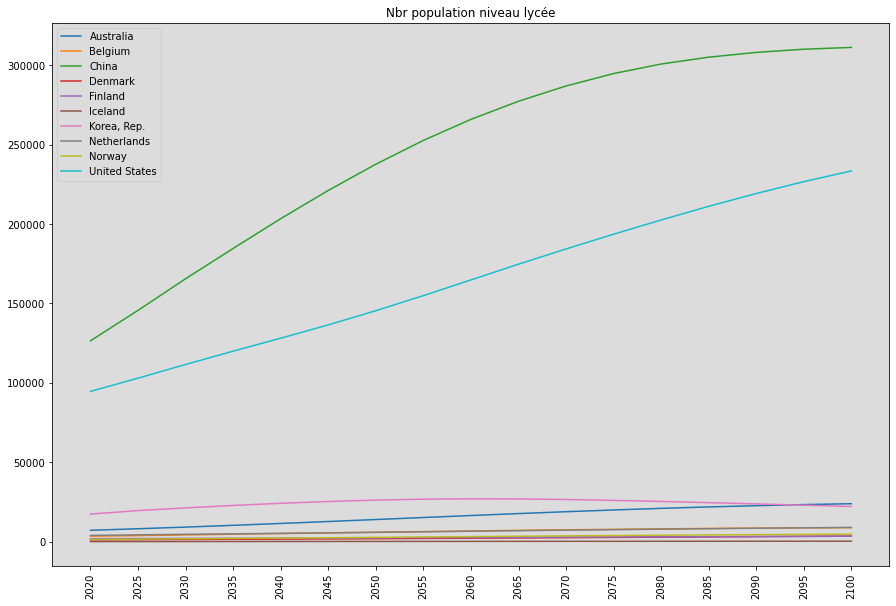

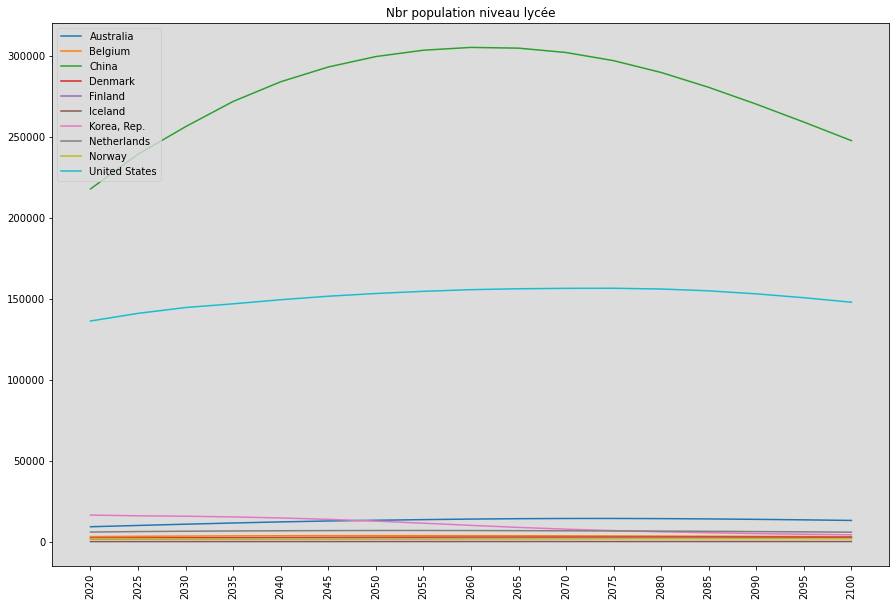

In [127]:
# VI-5 Représentation Graphique de l'Evolution des Indicateurs de Prévision du Top10.
indicateurs = ['PRJ.POP.ALL.4.MF','PRJ.POP.ALL.3.MF']
for i in indicateurs:
    figure = plt.figure(figsize=(15,10))
    plt.title('Nbr population niveau lycée')
    plt.xticks(rotation=90)
    for j in code_pays_retenus['Country Name'].dropna().unique():
        if len(df_codes_pays.loc[j,i].dropna())>0:
            plt.plot(df_codes_pays.loc[j,i].loc['2020':'2100'],label=j)
            plt.savefig('GRAPHS/27- Prévision_Nbr_Elèves_Lycée.png')
            # On peut calculer la tendance future pour chaque indicateur
            plt.legend()

In [128]:
# VI-6 Analyse Approfondie pour Déterminer les Meilleures Evolutions de Prévisions par Pays.

In [129]:
# VI-6-1 Réindexation du Fichier df_codes_pays.
df_test = df_codes_pays.reset_index()
# Visualisation du Fichier Indexé df_test.
df_test

,Country Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Australia,PRJ.POP.ALL.3.MF,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,13659.93,14002.69,14237.44,14362.58,14376.60,14281.21,14092.68,13832.61,13521.55,13165.93
1,Australia,PRJ.POP.ALL.4.MF,7227.45,8198.55,9233.69,10343.40,11520.10,12749.35,13999.36,15253.58,16517.89,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70
2,Belgium,PRJ.POP.ALL.3.MF,3160.96,3343.41,3497.65,3617.62,3709.19,3765.70,3789.05,3786.64,3764.53,3718.60,3656.66,3583.92,3501.91,3411.08,3312.69,3209.16,3101.95
3,Belgium,PRJ.POP.ALL.4.MF,3492.94,3891.85,4311.80,4737.25,5162.56,5584.52,5999.91,6405.44,6802.46,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35
4,China,PRJ.POP.ALL.3.MF,217865.99,239266.46,256338.03,271915.62,284060.40,293176.90,299620.23,303542.83,305273.31,304820.89,302120.66,297095.16,289790.29,280611.64,270226.54,259166.38,247711.46
5,China,PRJ.POP.ALL.4.MF,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32
6,Denmark,PRJ.POP.ALL.3.MF,2257.33,2359.06,2449.15,2504.52,2571.93,2649.20,2724.20,2782.15,2818.75,2836.44,2849.35,2863.87,2873.29,2866.42,2838.31,2794.65,2745.45
7,Denmark,PRJ.POP.ALL.4.MF,1199.39,1319.37,1437.82,1555.75,1666.99,1786.98,1926.61,2084.96,2253.95,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69
8,Finland,PRJ.POP.ALL.3.MF,1680.93,1707.32,1739.32,1763.84,1789.18,1814.03,1837.57,1862.30,1892.73,1927.49,1964.47,1999.54,2028.03,2048.59,2062.65,2072.56,2079.06
9,Finland,PRJ.POP.ALL.4.MF,1942.76,2033.56,2116.08,2199.34,2283.89,2375.44,2475.36,2581.11,2689.14,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14


In [130]:
# VI-6-2 Fonction qui détermine la Moyenne de la DataFrame df_test. 
df_test['mean'] = df_test.apply(lambda x: x[2:-1].mean(),axis = 1)
# Visualisation du Fichier df_test.
df_test

,Country Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
0,Australia,PRJ.POP.ALL.3.MF,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,13659.93,14002.69,14237.44,14362.58,14376.60,14281.21,14092.68,13832.61,13521.55,13165.93,12903.64750
1,Australia,PRJ.POP.ALL.4.MF,7227.45,8198.55,9233.69,10343.40,11520.10,12749.35,13999.36,15253.58,16517.89,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70,15672.79938
2,Belgium,PRJ.POP.ALL.3.MF,3160.96,3343.41,3497.65,3617.62,3709.19,3765.70,3789.05,3786.64,3764.53,3718.60,3656.66,3583.92,3501.91,3411.08,3312.69,3209.16,3101.95,3551.79813
3,Belgium,PRJ.POP.ALL.4.MF,3492.94,3891.85,4311.80,4737.25,5162.56,5584.52,5999.91,6405.44,6802.46,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35,6421.45500
4,China,PRJ.POP.ALL.3.MF,217865.99,239266.46,256338.03,271915.62,284060.40,293176.90,299620.23,303542.83,305273.31,304820.89,302120.66,297095.16,289790.29,280611.64,270226.54,259166.38,247711.46,279680.70813
5,China,PRJ.POP.ALL.4.MF,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32,242856.08750
6,Denmark,PRJ.POP.ALL.3.MF,2257.33,2359.06,2449.15,2504.52,2571.93,2649.20,2724.20,2782.15,2818.75,2836.44,2849.35,2863.87,2873.29,2866.42,2838.31,2794.65,2745.45,2689.91375
7,Denmark,PRJ.POP.ALL.4.MF,1199.39,1319.37,1437.82,1555.75,1666.99,1786.98,1926.61,2084.96,2253.95,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69,2223.13375
8,Finland,PRJ.POP.ALL.3.MF,1680.93,1707.32,1739.32,1763.84,1789.18,1814.03,1837.57,1862.30,1892.73,1927.49,1964.47,1999.54,2028.03,2048.59,2062.65,2072.56,2079.06,1886.90938
9,Finland,PRJ.POP.ALL.4.MF,1942.76,2033.56,2116.08,2199.34,2283.89,2375.44,2475.36,2581.11,2689.14,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14,2654.94500


In [131]:
# VI-6-3 Lorsque L'indicateur de prévision est 'PRJ.POP.ALL.3.MF' et non 'PRJ.POP.ALL.4.MF'.
df_PRJ_POP_ALL_3MF = df_test.iloc[[0,2,4,6,8,10,12,14,16,18]]
# Visualisation de la prévision de l'indicateur df_PRJ_POP_ALL_3MF.
df_PRJ_POP_ALL_3MF

,Country Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
0,Australia,PRJ.POP.ALL.3.MF,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,13659.93,14002.69,14237.44,14362.58,14376.60,14281.21,14092.68,13832.61,13521.55,13165.93,12903.64750
2,Belgium,PRJ.POP.ALL.3.MF,3160.96,3343.41,3497.65,3617.62,3709.19,3765.70,3789.05,3786.64,3764.53,3718.60,3656.66,3583.92,3501.91,3411.08,3312.69,3209.16,3101.95,3551.79813
4,China,PRJ.POP.ALL.3.MF,217865.99,239266.46,256338.03,271915.62,284060.40,293176.90,299620.23,303542.83,305273.31,304820.89,302120.66,297095.16,289790.29,280611.64,270226.54,259166.38,247711.46,279680.70813
6,Denmark,PRJ.POP.ALL.3.MF,2257.33,2359.06,2449.15,2504.52,2571.93,2649.20,2724.20,2782.15,2818.75,2836.44,2849.35,2863.87,2873.29,2866.42,2838.31,2794.65,2745.45,2689.91375
8,Finland,PRJ.POP.ALL.3.MF,1680.93,1707.32,1739.32,1763.84,1789.18,1814.03,1837.57,1862.30,1892.73,1927.49,1964.47,1999.54,2028.03,2048.59,2062.65,2072.56,2079.06,1886.90938
10,Iceland,PRJ.POP.ALL.3.MF,96.14,101.45,106.80,111.67,116.22,120.11,123.35,126.30,129.18,131.74,133.88,135.48,136.50,137.02,137.20,137.12,136.74,123.76000
12,"Korea, Rep.",PRJ.POP.ALL.3.MF,16471.65,16021.89,15773.81,15322.01,14677.54,13822.43,12737.66,11455.36,10113.83,8856.30,7766.35,6871.36,6147.99,5550.31,5049.19,4630.96,4290.83,10704.29000
14,Netherlands,PRJ.POP.ALL.3.MF,5984.99,6281.36,6491.43,6649.38,6782.95,6884.41,6947.51,6957.32,6920.47,6845.91,6757.38,6666.18,6564.40,6438.77,6282.72,6101.46,5907.89,6597.29000
16,Norway,PRJ.POP.ALL.3.MF,1810.27,1852.32,1891.36,1914.29,1939.39,1962.94,1980.67,1990.63,1997.31,2000.35,2004.39,2011.45,2015.22,2011.42,1997.74,1978.87,1957.35,1959.91375
18,United States,PRJ.POP.ALL.3.MF,136327.64,141029.95,144645.12,146923.68,149456.86,151618.87,153299.51,154645.12,155674.26,156233.87,156489.56,156541.39,156071.56,154943.63,153076.25,150700.73,147929.11,151104.87500


In [132]:
# VI-6-3-1 Renommer Country Name par Pays.
df_PRJ_POP_ALL_3MF.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Indexation du Fichier df_top10_region.
df_PRJ_POP_ALL_3MF.set_index('Pays', inplace=True)

In [133]:
# VI-6-3-2 Visualisation du Fichier df_PRJ_POP_ALL_3MF.
df_PRJ_POP_ALL_3MF

,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
Pays,,,,,,,,,,,,,,,,,,,
Australia,PRJ.POP.ALL.3.MF,9267.09,10059.92,10837.89,11580.95,12258.61,12817.41,13269.20,13659.93,14002.69,14237.44,14362.58,14376.60,14281.21,14092.68,13832.61,13521.55,13165.93,12903.64750
Belgium,PRJ.POP.ALL.3.MF,3160.96,3343.41,3497.65,3617.62,3709.19,3765.70,3789.05,3786.64,3764.53,3718.60,3656.66,3583.92,3501.91,3411.08,3312.69,3209.16,3101.95,3551.79813
China,PRJ.POP.ALL.3.MF,217865.99,239266.46,256338.03,271915.62,284060.40,293176.90,299620.23,303542.83,305273.31,304820.89,302120.66,297095.16,289790.29,280611.64,270226.54,259166.38,247711.46,279680.70813
Denmark,PRJ.POP.ALL.3.MF,2257.33,2359.06,2449.15,2504.52,2571.93,2649.20,2724.20,2782.15,2818.75,2836.44,2849.35,2863.87,2873.29,2866.42,2838.31,2794.65,2745.45,2689.91375
Finland,PRJ.POP.ALL.3.MF,1680.93,1707.32,1739.32,1763.84,1789.18,1814.03,1837.57,1862.30,1892.73,1927.49,1964.47,1999.54,2028.03,2048.59,2062.65,2072.56,2079.06,1886.90938
Iceland,PRJ.POP.ALL.3.MF,96.14,101.45,106.80,111.67,116.22,120.11,123.35,126.30,129.18,131.74,133.88,135.48,136.50,137.02,137.20,137.12,136.74,123.76000
"Korea, Rep.",PRJ.POP.ALL.3.MF,16471.65,16021.89,15773.81,15322.01,14677.54,13822.43,12737.66,11455.36,10113.83,8856.30,7766.35,6871.36,6147.99,5550.31,5049.19,4630.96,4290.83,10704.29000
Netherlands,PRJ.POP.ALL.3.MF,5984.99,6281.36,6491.43,6649.38,6782.95,6884.41,6947.51,6957.32,6920.47,6845.91,6757.38,6666.18,6564.40,6438.77,6282.72,6101.46,5907.89,6597.29000
Norway,PRJ.POP.ALL.3.MF,1810.27,1852.32,1891.36,1914.29,1939.39,1962.94,1980.67,1990.63,1997.31,2000.35,2004.39,2011.45,2015.22,2011.42,1997.74,1978.87,1957.35,1959.91375


In [134]:
# VI-6-3-3 Extraire juste Les Données Nécessaires.
dfs_PRJ_POP_ALL_3MF = df_PRJ_POP_ALL_3MF.loc[:,'2020':'2100']

In [135]:
# VI-6-3-4 Fichier dfs_PRJ_POP_ALL_3MF Transposé.
dfs_PRJ_POP_ALL_3MFT = dfs_PRJ_POP_ALL_3MF.T
# Visualisation du Fichier Transposé.    
dfs_PRJ_POP_ALL_3MFT

Pays,Australia,Belgium,China,Denmark,Finland,Iceland,"Korea, Rep.",Netherlands,Norway,United States
2020,9267.09,3160.96,217865.99,2257.33,1680.93,96.14,16471.65,5984.99,1810.27,136327.64
2025,10059.92,3343.41,239266.46,2359.06,1707.32,101.45,16021.89,6281.36,1852.32,141029.95
2030,10837.89,3497.65,256338.03,2449.15,1739.32,106.80,15773.81,6491.43,1891.36,144645.12
2035,11580.95,3617.62,271915.62,2504.52,1763.84,111.67,15322.01,6649.38,1914.29,146923.68
2040,12258.61,3709.19,284060.40,2571.93,1789.18,116.22,14677.54,6782.95,1939.39,149456.86
2045,12817.41,3765.70,293176.90,2649.20,1814.03,120.11,13822.43,6884.41,1962.94,151618.87
2050,13269.20,3789.05,299620.23,2724.20,1837.57,123.35,12737.66,6947.51,1980.67,153299.51
2055,13659.93,3786.64,303542.83,2782.15,1862.30,126.30,11455.36,6957.32,1990.63,154645.12
2060,14002.69,3764.53,305273.31,2818.75,1892.73,129.18,10113.83,6920.47,1997.31,155674.26
2065,14237.44,3718.60,304820.89,2836.44,1927.49,131.74,8856.30,6845.91,2000.35,156233.87


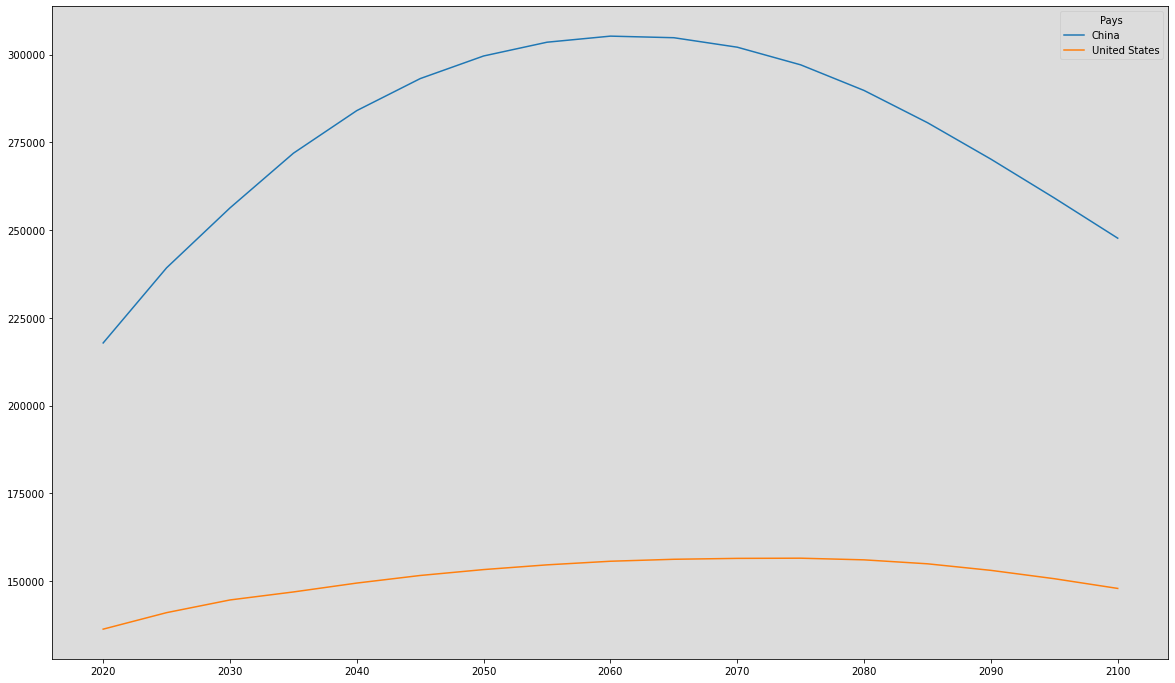

In [136]:
# VI-6-3-5 Prévisions des deux Premiers Pays Dominants du Top10.
dfs_PRJ_POP_ALL_3MFT1  =  dfs_PRJ_POP_ALL_3MFT[['China','United States']]
# VI-6-3-6 Représentation Graphique des deux Pays Dominants du Top10
dfs_PRJ_POP_ALL_3MFT1.plot(figsize=(20,12))
plt.savefig('GRAPHS/28- Prévision_Pays_Dominants.png')

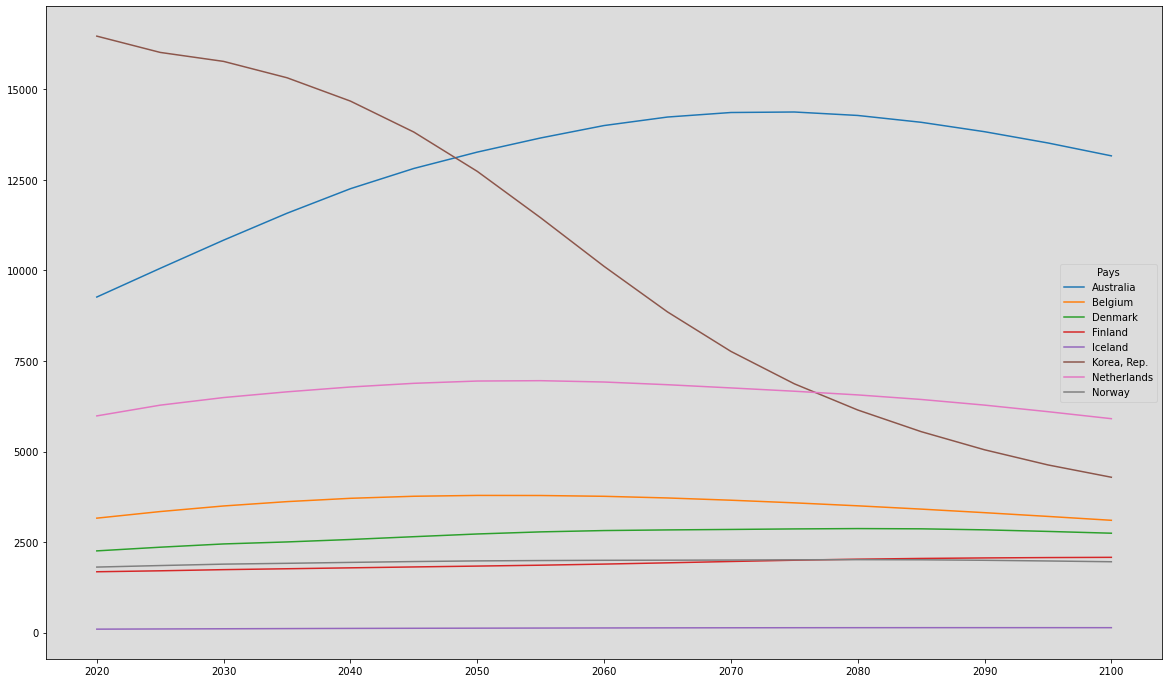

In [137]:
# VI-6-3-7 Prévisions du Reste des Pays du Top10.
dfs_PRJ_POP_ALL_3MFT2  =  dfs_PRJ_POP_ALL_3MFT[['Australia','Belgium','Denmark','Finland','Iceland','Korea, Rep.','Netherlands','Norway']]
# VI-6-3-8 Représentation Graphique du Reste des Pays du Top10
dfs_PRJ_POP_ALL_3MFT2.plot(figsize=(20,12))
plt.savefig('GRAPHS/29- Prévision_Reste_Pays_Top10.png')

In [138]:
# VI-6-4 Lorsque L'indicateur de prévision est 'PRJ.POP.ALL.4.MF' et non 'PRJ.POP.ALL.3.MF'.
df_PRJ_POP_ALL_4MF = df_test.iloc[[1,3,5,7,9,11,13,15,17,19]]
# Visualisation de la prévision de l'indicateur.
df_PRJ_POP_ALL_4MF

,Country Name,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
1,Australia,PRJ.POP.ALL.4.MF,7227.45,8198.55,9233.69,10343.40,11520.10,12749.35,13999.36,15253.58,16517.89,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70,15672.79938
3,Belgium,PRJ.POP.ALL.4.MF,3492.94,3891.85,4311.80,4737.25,5162.56,5584.52,5999.91,6405.44,6802.46,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35,6421.45500
5,China,PRJ.POP.ALL.4.MF,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32,242856.08750
7,Denmark,PRJ.POP.ALL.4.MF,1199.39,1319.37,1437.82,1555.75,1666.99,1786.98,1926.61,2084.96,2253.95,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69,2223.13375
9,Finland,PRJ.POP.ALL.4.MF,1942.76,2033.56,2116.08,2199.34,2283.89,2375.44,2475.36,2581.11,2689.14,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14,2654.94500
11,Iceland,PRJ.POP.ALL.4.MF,106.74,120.97,136.68,153.09,170.29,187.87,205.37,222.72,240.25,257.56,274.55,290.87,306.09,319.97,332.53,343.94,354.24,229.34313
13,"Korea, Rep.",PRJ.POP.ALL.4.MF,17444.80,19603.59,21318.94,22867.28,24215.10,25345.42,26224.18,26805.47,27047.02,26954.62,26595.86,26045.27,25374.14,24624.17,23828.62,23010.00,22210.29,24206.53000
15,Netherlands,PRJ.POP.ALL.4.MF,3979.74,4334.84,4682.39,4998.15,5297.76,5604.93,5932.18,6274.50,6625.32,6965.61,7292.88,7613.66,7930.79,8237.85,8522.54,8774.40,8990.66,6441.72125
17,Norway,PRJ.POP.ALL.4.MF,1475.17,1677.42,1881.07,2089.07,2302.02,2527.06,2765.30,3010.45,3255.48,3487.83,3707.14,3919.01,4122.35,4313.94,4485.56,4636.23,4765.23,3103.44375
19,United States,PRJ.POP.ALL.4.MF,94645.46,102980.85,111600.20,119972.68,128128.11,136515.04,145446.92,154917.76,164817.07,174716.34,184308.71,193600.16,202536.12,211141.04,219208.93,226697.42,233401.27,160702.05063


In [139]:
# VI-6-4-1 Renommer Country Name par Pays.
df_PRJ_POP_ALL_4MF.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Indexation du Fichier df_top10_region.
df_PRJ_POP_ALL_4MF.set_index('Pays', inplace=True)

In [140]:
# VI-6-4-2 Visualisation du Fichier df_PRJ_POP_ALL_4MF.
df_PRJ_POP_ALL_4MF

,Indicator Code,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
Pays,,,,,,,,,,,,,,,,,,,
Australia,PRJ.POP.ALL.4.MF,7227.45,8198.55,9233.69,10343.40,11520.10,12749.35,13999.36,15253.58,16517.89,17740.31,18910.48,20012.57,21024.42,21927.90,22714.34,23391.40,23962.70,15672.79938
Belgium,PRJ.POP.ALL.4.MF,3492.94,3891.85,4311.80,4737.25,5162.56,5584.52,5999.91,6405.44,6802.46,7173.97,7517.98,7832.89,8116.68,8367.39,8582.89,8762.75,8905.35,6421.45500
China,PRJ.POP.ALL.4.MF,126496.96,145660.86,165561.25,184640.78,203381.68,221135.73,237643.28,252641.19,265880.80,277271.02,286891.69,294703.23,300708.37,305028.68,308026.92,310024.96,311167.32,242856.08750
Denmark,PRJ.POP.ALL.4.MF,1199.39,1319.37,1437.82,1555.75,1666.99,1786.98,1926.61,2084.96,2253.95,2420.78,2582.26,2742.20,2905.65,3071.56,3232.99,3382.88,3518.69,2223.13375
Finland,PRJ.POP.ALL.4.MF,1942.76,2033.56,2116.08,2199.34,2283.89,2375.44,2475.36,2581.11,2689.14,2795.80,2902.86,3011.18,3118.64,3222.40,3320.17,3411.39,3497.14,2654.94500
Iceland,PRJ.POP.ALL.4.MF,106.74,120.97,136.68,153.09,170.29,187.87,205.37,222.72,240.25,257.56,274.55,290.87,306.09,319.97,332.53,343.94,354.24,229.34313
"Korea, Rep.",PRJ.POP.ALL.4.MF,17444.80,19603.59,21318.94,22867.28,24215.10,25345.42,26224.18,26805.47,27047.02,26954.62,26595.86,26045.27,25374.14,24624.17,23828.62,23010.00,22210.29,24206.53000
Netherlands,PRJ.POP.ALL.4.MF,3979.74,4334.84,4682.39,4998.15,5297.76,5604.93,5932.18,6274.50,6625.32,6965.61,7292.88,7613.66,7930.79,8237.85,8522.54,8774.40,8990.66,6441.72125
Norway,PRJ.POP.ALL.4.MF,1475.17,1677.42,1881.07,2089.07,2302.02,2527.06,2765.30,3010.45,3255.48,3487.83,3707.14,3919.01,4122.35,4313.94,4485.56,4636.23,4765.23,3103.44375


In [141]:
# VI-6-4-3 Extraire juste Les Données Nécessaires.
dfs_PRJ_POP_ALL_4MF = df_PRJ_POP_ALL_4MF.loc[:,'2020':'2100']

In [142]:
# VI-6-4-4 Fichier dfs_PRJ_POP_ALL_3MF Transposé.
dfs_PRJ_POP_ALL_4MFT = dfs_PRJ_POP_ALL_4MF.T
# Visualisation du Fichier Transposé.    
dfs_PRJ_POP_ALL_4MFT

Pays,Australia,Belgium,China,Denmark,Finland,Iceland,"Korea, Rep.",Netherlands,Norway,United States
2020,7227.45,3492.94,126496.96,1199.39,1942.76,106.74,17444.80,3979.74,1475.17,94645.46
2025,8198.55,3891.85,145660.86,1319.37,2033.56,120.97,19603.59,4334.84,1677.42,102980.85
2030,9233.69,4311.80,165561.25,1437.82,2116.08,136.68,21318.94,4682.39,1881.07,111600.20
2035,10343.40,4737.25,184640.78,1555.75,2199.34,153.09,22867.28,4998.15,2089.07,119972.68
2040,11520.10,5162.56,203381.68,1666.99,2283.89,170.29,24215.10,5297.76,2302.02,128128.11
2045,12749.35,5584.52,221135.73,1786.98,2375.44,187.87,25345.42,5604.93,2527.06,136515.04
2050,13999.36,5999.91,237643.28,1926.61,2475.36,205.37,26224.18,5932.18,2765.30,145446.92
2055,15253.58,6405.44,252641.19,2084.96,2581.11,222.72,26805.47,6274.50,3010.45,154917.76
2060,16517.89,6802.46,265880.80,2253.95,2689.14,240.25,27047.02,6625.32,3255.48,164817.07
2065,17740.31,7173.97,277271.02,2420.78,2795.80,257.56,26954.62,6965.61,3487.83,174716.34


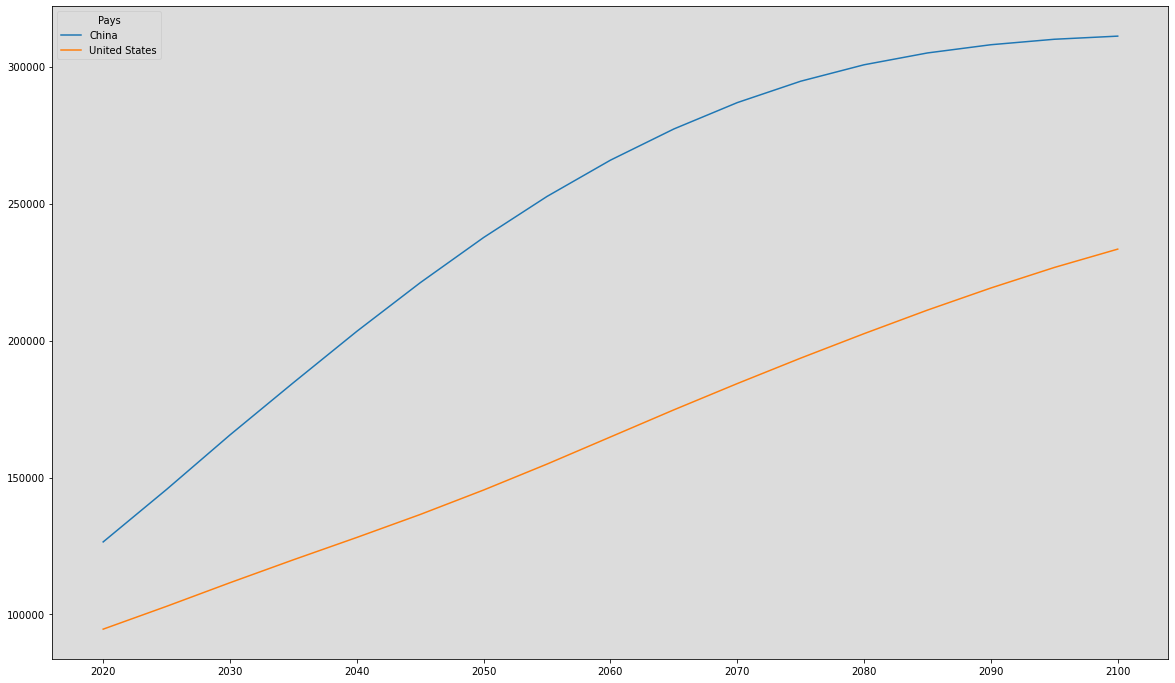

In [143]:
# VI-6-5 Prévisions des deux Premiers Pays Dominants du Top10.
dfs_PRJ_POP_ALL_4MFT1  =  dfs_PRJ_POP_ALL_4MFT[['China','United States']]
# VI-6-4-6 Représentation Graphique des deux Pays Dominants du Top10
dfs_PRJ_POP_ALL_4MFT1.plot(figsize=(20,12))
plt.savefig('GRAPHS/30- Prévision_Pays_Dominants.png')

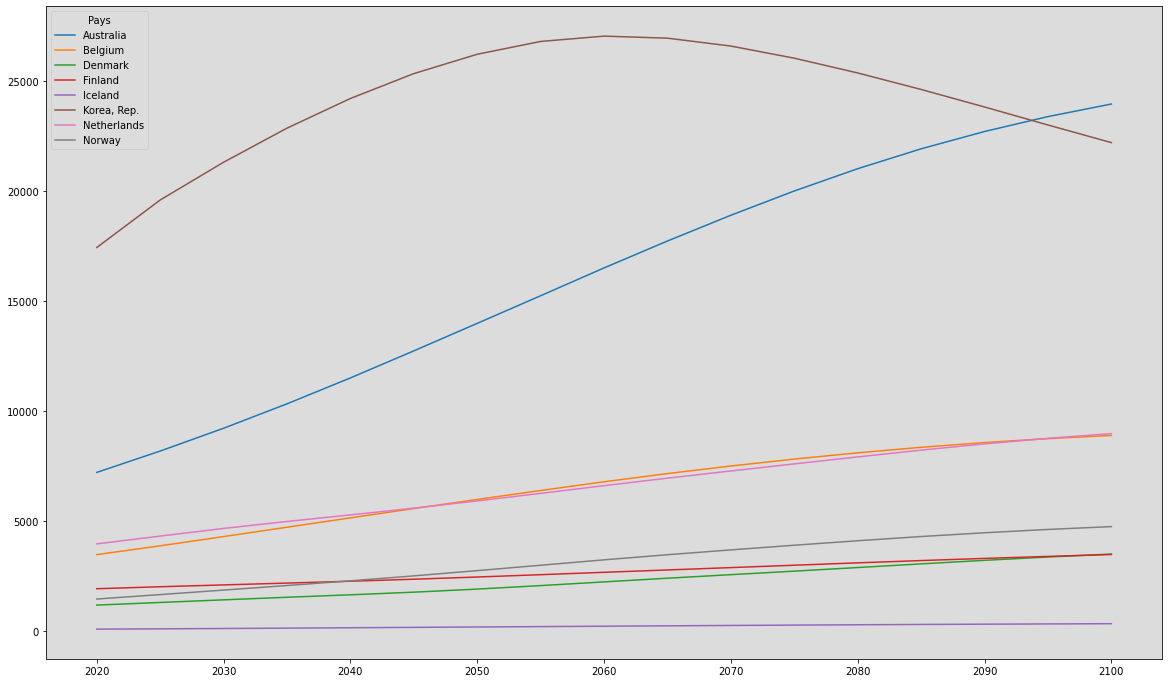

In [144]:
# VI-6-4-7 Prévisions du Reste des Pays du Top10.
dfs_PRJ_POP_ALL_4MFT2  =  dfs_PRJ_POP_ALL_4MFT[['Australia','Belgium','Denmark','Finland','Iceland','Korea, Rep.','Netherlands','Norway']]
# VI-6-4-8 Représentation Graphique du Reste des Pays du Top10
dfs_PRJ_POP_ALL_4MFT2.plot(figsize=(20,12))
plt.savefig('GRAPHS/31- Prévision_Reste_Pays_Top10.png')

In [157]:
# VI-6-5 Considérons Maintenant la Prévision de la Somme des Elèves du Secondaire et des Etudiants du Supérieur.
df_PRJ_POP_ALL_34MF = df_codes_pays.groupby('Country Name').sum()
# VI-6-5-1 Visualisation du Fichier
df_PRJ_POP_ALL_34MF

,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Name,,,,,,,,,,,,,,,,,
Australia,16494.54,18258.47,20071.58,21924.35,23778.71,25566.76,27268.56,28913.51,30520.58,31977.75,33273.06,34389.17,35305.63,36020.58,36546.95,36912.95,37128.63
Belgium,6653.90,7235.26,7809.45,8354.87,8871.75,9350.22,9788.96,10192.08,10566.99,10892.57,11174.64,11416.81,11618.59,11778.47,11895.58,11971.91,12007.30
China,344362.95,384927.32,421899.28,456556.40,487442.08,514312.63,537263.51,556184.02,571154.11,582091.91,589012.35,591798.39,590498.66,585640.32,578253.46,569191.34,558878.78
Denmark,3456.72,3678.43,3886.97,4060.27,4238.92,4436.18,4650.81,4867.11,5072.70,5257.22,5431.61,5606.07,5778.94,5937.98,6071.30,6177.53,6264.14
Finland,3623.69,3740.88,3855.40,3963.18,4073.07,4189.47,4312.93,4443.41,4581.87,4723.29,4867.33,5010.72,5146.67,5270.99,5382.82,5483.95,5576.20
Iceland,202.88,222.42,243.48,264.76,286.51,307.98,328.72,349.02,369.43,389.30,408.43,426.35,442.59,456.99,469.73,481.06,490.98
"Korea, Rep.",33916.45,35625.48,37092.75,38189.29,38892.64,39167.85,38961.84,38260.83,37160.85,35810.92,34362.21,32916.63,31522.13,30174.48,28877.81,27640.96,26501.12
Netherlands,9964.73,10616.20,11173.82,11647.53,12080.71,12489.34,12879.69,13231.82,13545.79,13811.52,14050.26,14279.84,14495.19,14676.62,14805.26,14875.86,14898.55
Norway,3285.44,3529.74,3772.43,4003.36,4241.41,4490.00,4745.97,5001.08,5252.79,5488.18,5711.53,5930.46,6137.57,6325.36,6483.30,6615.10,6722.58


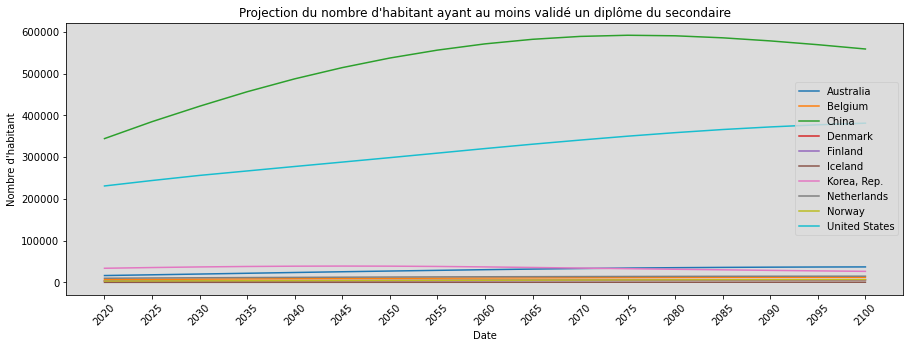

In [158]:
# VI-6-5-1 Représentation Graphique des Pays du Top10
fig, ax = plt.subplots(figsize=(15,5))
for country in dfs_PRJ_POP_ALL_34MF.index:
    ax.plot(dfs_PRJ_POP_ALL_34MF.columns, dfs_PRJ_POP_ALL_34MF.loc[country])
ax.legend(dfs_PRJ_POP_ALL_34MF.index)
ax.set_title("Projection du nombre d'habitant ayant au moins validé un diplôme du secondaire")
ax.set_xlabel('Date')
ax.set_ylabel("Nombre d'habitant")
ax.set_xticklabels(labels=dfs_PRJ_POP_ALL_34MF.columns, rotation=45)
plt.savefig('GRAPHS/32- Prévision_Nbr_Scolarisé_Lycée_Univ.png')

In [159]:
# VI-6-5-2 Analyse Approfondie pour Déterminer les Meilleures Evolutions de Prévisions par Pays.
# Réindexation du Fichier df_PRJ_POP_ALL_34MF.
df_test2 = df_PRJ_POP_ALL_34MF.reset_index()
# Visualisation du Fichier Indexé df_test.
df_test2

,Country Name,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Australia,16494.54,18258.47,20071.58,21924.35,23778.71,25566.76,27268.56,28913.51,30520.58,31977.75,33273.06,34389.17,35305.63,36020.58,36546.95,36912.95,37128.63
1,Belgium,6653.90,7235.26,7809.45,8354.87,8871.75,9350.22,9788.96,10192.08,10566.99,10892.57,11174.64,11416.81,11618.59,11778.47,11895.58,11971.91,12007.30
2,China,344362.95,384927.32,421899.28,456556.40,487442.08,514312.63,537263.51,556184.02,571154.11,582091.91,589012.35,591798.39,590498.66,585640.32,578253.46,569191.34,558878.78
3,Denmark,3456.72,3678.43,3886.97,4060.27,4238.92,4436.18,4650.81,4867.11,5072.70,5257.22,5431.61,5606.07,5778.94,5937.98,6071.30,6177.53,6264.14
4,Finland,3623.69,3740.88,3855.40,3963.18,4073.07,4189.47,4312.93,4443.41,4581.87,4723.29,4867.33,5010.72,5146.67,5270.99,5382.82,5483.95,5576.20
5,Iceland,202.88,222.42,243.48,264.76,286.51,307.98,328.72,349.02,369.43,389.30,408.43,426.35,442.59,456.99,469.73,481.06,490.98
6,"Korea, Rep.",33916.45,35625.48,37092.75,38189.29,38892.64,39167.85,38961.84,38260.83,37160.85,35810.92,34362.21,32916.63,31522.13,30174.48,28877.81,27640.96,26501.12
7,Netherlands,9964.73,10616.20,11173.82,11647.53,12080.71,12489.34,12879.69,13231.82,13545.79,13811.52,14050.26,14279.84,14495.19,14676.62,14805.26,14875.86,14898.55
8,Norway,3285.44,3529.74,3772.43,4003.36,4241.41,4490.00,4745.97,5001.08,5252.79,5488.18,5711.53,5930.46,6137.57,6325.36,6483.30,6615.10,6722.58
9,United States,230973.10,244010.80,256245.32,266896.36,277584.97,288133.91,298746.43,309562.88,320491.33,330950.21,340798.27,350141.55,358607.68,366084.67,372285.18,377398.15,381330.38


In [160]:
# VI-6-5-2-1 Fonction qui détermine la Moyenne de la DataFrame df_test2. 
df_test2['mean'] = df_test2.apply(lambda x: x[2:-1].mean(),axis = 1)
df_test2

,Country Name,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,mean
0,Australia,16494.54,18258.47,20071.58,21924.35,23778.71,25566.76,27268.56,28913.51,30520.58,31977.75,33273.06,34389.17,35305.63,36020.58,36546.95,36912.95,37128.63,29381.90733
1,Belgium,6653.90,7235.26,7809.45,8354.87,8871.75,9350.22,9788.96,10192.08,10566.99,10892.57,11174.64,11416.81,11618.59,11778.47,11895.58,11971.91,12007.30,10194.54333
2,China,344362.95,384927.32,421899.28,456556.40,487442.08,514312.63,537263.51,556184.02,571154.11,582091.91,589012.35,591798.39,590498.66,585640.32,578253.46,569191.34,558878.78,534415.05200
3,Denmark,3456.72,3678.43,3886.97,4060.27,4238.92,4436.18,4650.81,4867.11,5072.70,5257.22,5431.61,5606.07,5778.94,5937.98,6071.30,6177.53,6264.14,5010.13600
4,Finland,3623.69,3740.88,3855.40,3963.18,4073.07,4189.47,4312.93,4443.41,4581.87,4723.29,4867.33,5010.72,5146.67,5270.99,5382.82,5483.95,5576.20,4603.06533
5,Iceland,202.88,222.42,243.48,264.76,286.51,307.98,328.72,349.02,369.43,389.30,408.43,426.35,442.59,456.99,469.73,481.06,490.98,363.11800
6,"Korea, Rep.",33916.45,35625.48,37092.75,38189.29,38892.64,39167.85,38961.84,38260.83,37160.85,35810.92,34362.21,32916.63,31522.13,30174.48,28877.81,27640.96,26501.12,34977.11133
7,Netherlands,9964.73,10616.20,11173.82,11647.53,12080.71,12489.34,12879.69,13231.82,13545.79,13811.52,14050.26,14279.84,14495.19,14676.62,14805.26,14875.86,14898.55,13243.96333
8,Norway,3285.44,3529.74,3772.43,4003.36,4241.41,4490.00,4745.97,5001.08,5252.79,5488.18,5711.53,5930.46,6137.57,6325.36,6483.30,6615.10,6722.58,5181.88533
9,United States,230973.10,244010.80,256245.32,266896.36,277584.97,288133.91,298746.43,309562.88,320491.33,330950.21,340798.27,350141.55,358607.68,366084.67,372285.18,377398.15,381330.38,317195.84733


In [161]:
# VI-6-5-2-2 Renommer Country Name par Pays.
df_test2.rename(columns={'Country Name': 'Pays'}, inplace=True)
# Indexation du Fichier df_top10_region.
df_test2.set_index('Pays', inplace=True)

In [162]:
# VI-6-5-2-3 Extraire juste Les Données Nécessaires.
dfs_PRJ_POP_ALL_34MF = df_test2.loc[:,'2020':'2100']

In [163]:
# VI-6-5-2- Fichier dfs_PRJ_POP_ALL_34MF Transposé.
dfs_PRJ_POP_ALL_34MFT = dfs_PRJ_POP_ALL_34MF.T
# Visualisation du Fichier Transposé.    
dfs_PRJ_POP_ALL_34MFT

Pays,Australia,Belgium,China,Denmark,Finland,Iceland,"Korea, Rep.",Netherlands,Norway,United States
2020,16494.54,6653.90,344362.95,3456.72,3623.69,202.88,33916.45,9964.73,3285.44,230973.10
2025,18258.47,7235.26,384927.32,3678.43,3740.88,222.42,35625.48,10616.20,3529.74,244010.80
2030,20071.58,7809.45,421899.28,3886.97,3855.40,243.48,37092.75,11173.82,3772.43,256245.32
2035,21924.35,8354.87,456556.40,4060.27,3963.18,264.76,38189.29,11647.53,4003.36,266896.36
2040,23778.71,8871.75,487442.08,4238.92,4073.07,286.51,38892.64,12080.71,4241.41,277584.97
2045,25566.76,9350.22,514312.63,4436.18,4189.47,307.98,39167.85,12489.34,4490.00,288133.91
2050,27268.56,9788.96,537263.51,4650.81,4312.93,328.72,38961.84,12879.69,4745.97,298746.43
2055,28913.51,10192.08,556184.02,4867.11,4443.41,349.02,38260.83,13231.82,5001.08,309562.88
2060,30520.58,10566.99,571154.11,5072.70,4581.87,369.43,37160.85,13545.79,5252.79,320491.33
2065,31977.75,10892.57,582091.91,5257.22,4723.29,389.30,35810.92,13811.52,5488.18,330950.21


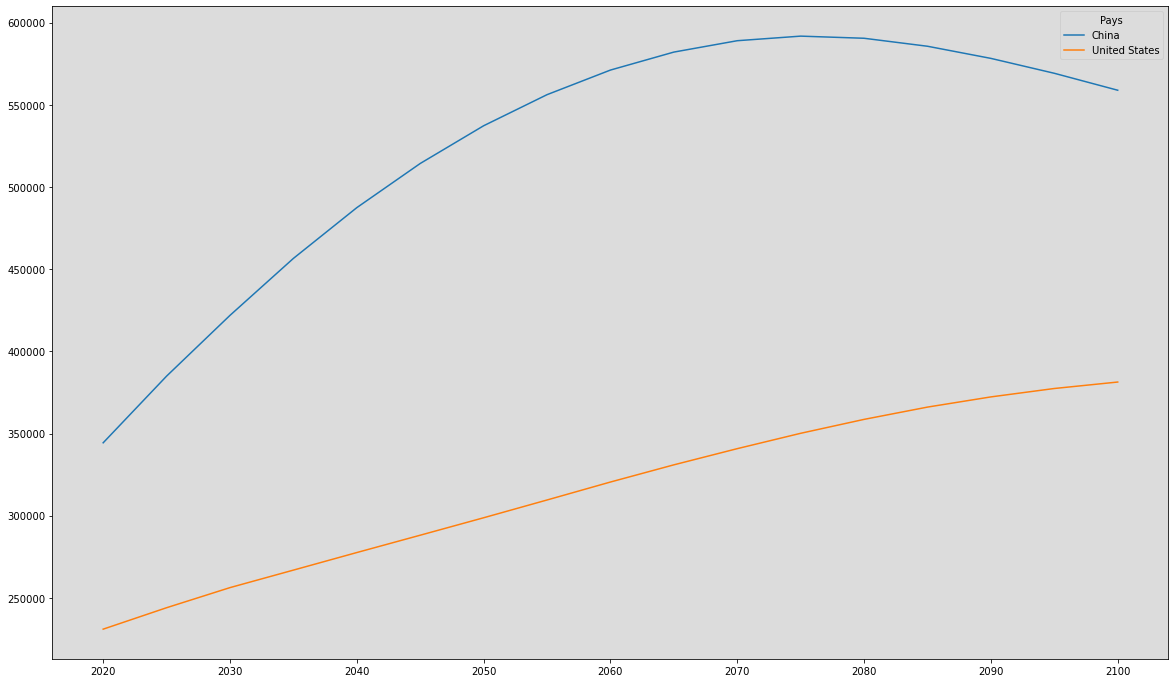

In [164]:
# VI-6-5-4 Prévisions des deux Premiers Pays Dominants du Top10.
dfs_PRJ_POP_ALL_34MFT1  =  dfs_PRJ_POP_ALL_34MFT[['China','United States']]
# VI-6-5-5 Représentation Graphique des deux Pays Dominants du Top10
dfs_PRJ_POP_ALL_34MFT1.plot(figsize=(20,12))
plt.savefig('GRAPHS/33- Prévision_Pays_Dominants.png')

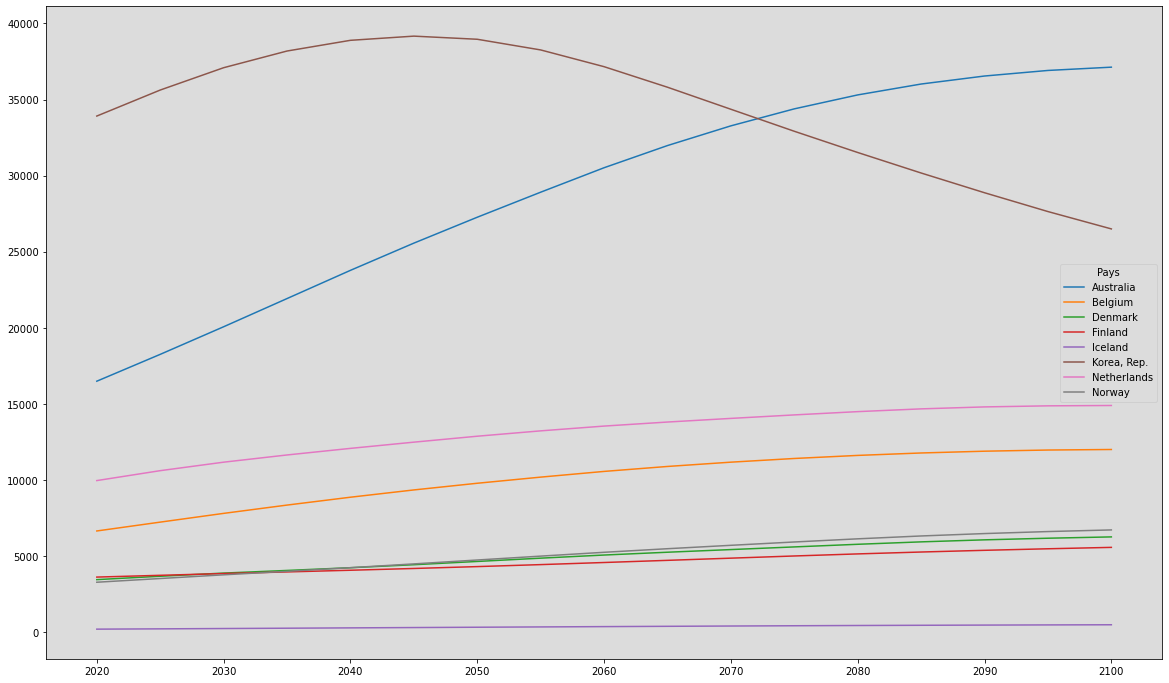

In [165]:
# VI-6-5-6 Prévisions du Reste des Pays du Top10.
dfs_PRJ_POP_ALL_34MFT2  =  dfs_PRJ_POP_ALL_34MFT[['Australia','Belgium','Denmark','Finland','Iceland','Korea, Rep.','Netherlands','Norway']]
# VI-6-5-7 Représentation Graphique des deux Pays Dominants du Top10
dfs_PRJ_POP_ALL_34MFT2.plot(figsize=(20,12))
plt.savefig('GRAPHS/34- Prévision_Reste_Pays_Top10.png')

In [166]:
# VII- Dans Quels Pays l'Entreprise doit-elle Opérer en Priorité?  
# VII-1 Lorsque L'indicateur de prévision est 'PRJ.POP.ALL.3.MF' et non 'PRJ.POP.ALL.4.MF'.
df_Top10_prev1 = df_PRJ_POP_ALL_3MF[['mean']].sort_values(by='mean', ascending=False)
# Reinitialisation de l'indexation du Fichier df_Top10_prev1.
df_Top10_prev1.reset_index('Pays', inplace=True)
# Classement Provisoire du Fichier Top10_prev1.
df_Top10_prev1['Place Prévision1']=np.arange(1, 11, 1)
# Indexation du Classement Prévisionnel des Pays les Plus Attractifs.
df_Top10_prev1.set_index('Place Prévision1')

,Pays,mean
Place Prévision1,,
1,China,279680.70813
2,United States,151104.87500
3,Australia,12903.64750
4,"Korea, Rep.",10704.29000
5,Netherlands,6597.29000
6,Belgium,3551.79813
7,Denmark,2689.91375
8,Norway,1959.91375
9,Finland,1886.90938


In [167]:
# VII-2 Lorsque L'indicateur de prévision est 'PRJ.POP.ALL.4.MF' et non 'PRJ.POP.ALL.3.MF'..
df_Top10_prev2 = df_PRJ_POP_ALL_4MF[['mean']].sort_values(by='mean', ascending=False)
# Reinitialisation de l'indexation du Fichier df_Top10_prev2.
df_Top10_prev2.reset_index('Pays', inplace=True)
# Classement Provisoire du Fichier Top10_prev2.
df_Top10_prev2['Place Prévision2']=np.arange(1, 11, 1)
# Indexation du Classement Provisoire des Pays les Plus Attractifs.
df_Top10_prev2.set_index('Place Prévision2')

,Pays,mean
Place Prévision2,,
1,China,242856.08750
2,United States,160702.05063
3,"Korea, Rep.",24206.53000
4,Australia,15672.79938
5,Netherlands,6441.72125
6,Belgium,6421.45500
7,Norway,3103.44375
8,Finland,2654.94500
9,Denmark,2223.13375


In [171]:
# VII-3 Lorsque L'indicateur de prévision est 'PRJ.POP.ALL.4.MF' et 'PRJ.POP.ALL.3.MF'.
df_Top10_prev3 = df_test2[['mean']].sort_values(by='mean', ascending=False)
# Reinitialisation de l'indexation du Fichier df_Top10_prev3.
df_Top10_prev3.reset_index('Pays', inplace=True)
# Classement Provisoire du Fichier Top10_prev2.
df_Top10_prev3['Place Prévision3']=np.arange(1, 11, 1)
# Indexation du Classement Provisoire des Pays les Plus Attractifs.
df_Top10_prev3.set_index('Place Prévision3')

,Pays,mean
Place Prévision3,,
1,China,534415.05200
2,United States,317195.84733
3,"Korea, Rep.",34977.11133
4,Australia,29381.90733
5,Netherlands,13243.96333
6,Belgium,10194.54333
7,Norway,5181.88533
8,Denmark,5010.13600
9,Finland,4603.06533


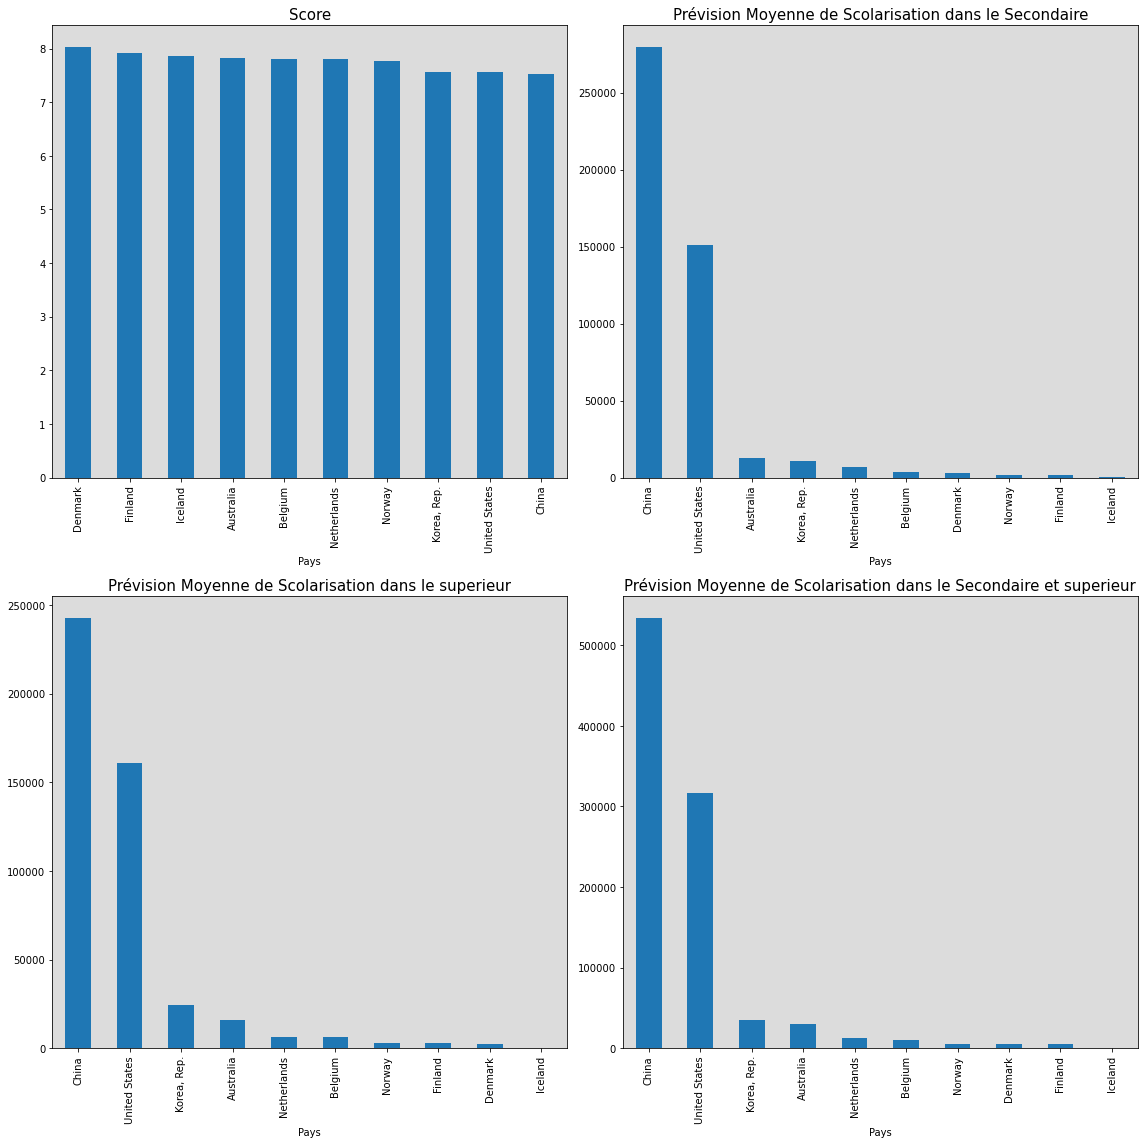

In [174]:
# V-5-6-3 Représentation Graphique des Indicateurs Retenus par Pays.
Top10_prev1_Graphs = df_PRJ_POP_ALL_3MF[['mean']].sort_values(by='mean', ascending=False)
Top10_prev2_Graphs = df_PRJ_POP_ALL_4MF[['mean']].sort_values(by='mean', ascending=False)
Top10_prev3_Graphs = df_test2[['mean']].sort_values(by='mean', ascending=False)
# Graphiques statistiques sur les 5 indicateurs du Fichier df_pays_1an. 
plt.rcParams["figure.figsize"] = [16,16]
plt.tick_params(axis = 'both', labelsize = 15)
my_colors = [(0.5,0.4,0.5), (0.75, 0.75, 0.85)]
plt.subplot(221)
plt.title('Score').set_fontsize(15)
Top10_provs_Graphs = Top10_provs_Graphs.sort_values(by = 'Score', ascending=False)
Top10_provs_Graphs['Score'].plot(kind="bar", x='Pays', xlabel= 'Pays')
plt.savefig('GRAPHS/25- Score_par_Ind_Top102.png')
plt.subplot(222)
plt.title('Prévision Moyenne de Scolarisation dans le Secondaire').set_fontsize(15)
Top10_prev1_Graphs = Top10_prev1_Graphs.sort_values(by = 'mean', ascending=False)
Top10_prev1_Graphs['mean'].plot(kind="bar", x='Pays', xlabel= 'Pays')
plt.subplot(223)
plt.title('Prévision Moyenne de Scolarisation dans le superieur').set_fontsize(15)
Top10_prev2_Graphs = Top10_prev2_Graphs.sort_values(by = 'mean', ascending=False)
Top10_prev2_Graphs['mean'].plot(kind="bar")
plt.subplot(224)
plt.title('Prévision Moyenne de Scolarisation dans le Secondaire et superieur').set_fontsize(15)
Top10_prev3_Graphs = Top10_prev3_Graphs.sort_values(by = 'mean', ascending=False)
Top10_prev3_Graphs['mean'].plot(kind="bar")
plt.savefig('GRAPHS/35- Score_par_Ind_Top10.png')
plt.tight_layout()

In [181]:
# En Définitivite, l'Entreprise doit Opérer en Priorité dans les Pays Suivants:
Top04_Pays_Prioritaires  = df_top10_prov.iloc[[9,8,7,3]]
# VIsualisation du Top04
Top04_Pays_Prioritaires  = Top04_Pays_Prioritaires[['Pays','Score']] 
Top04_Pays_Prioritaires

,Pays,Score
26,China,7.52558
135,United States,7.55417
69,"Korea, Rep.",7.56733
6,Australia,7.82963


In [182]:
# Classement Final du Fichier Top04_Pays_Prioritaires.
Top04_Pays_Prioritaires['Place Finale']=np.arange(1, 5, 1)
# Indexation du Classement Finale des Pays les Plus Attractifs.
Top04_Pays_Prioritaires.set_index('Place Finale')

,Pays,Score
Place Finale,,
1,China,7.52558
2,United States,7.55417
3,"Korea, Rep.",7.56733
4,Australia,7.82963
